# Wprowadzenie do sieci neuronowych - lab 02

#### Autor: Jakub Szpunar

##### Początkowe treści pochodzą z instrukcji do laboratorium.
##### Zduplikowane importy są spowodowane tym, że analiza poszczególnych datasetów prowadzona była w kilku różnych notebookach. 

## Przygotowywanie danych

In [1]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [2]:
# lists to store models results 
models_acc = []
models_val_acc = []
models_loss = []
models_val_loss = [] 

In [5]:
# The path to store trained models
models_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\models' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\dataset\train\train'

# The directory where we will store our smaller dataset
base_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Budowanie naszej pierwszej prostej sieci CNN


In [7]:
img_rows = 150
img_cols = 150

In [6]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [4]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [1]:
#from keras import optimizers
import tensorflow
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## <a href="https://keras.io/api/preprocessing/image/">Wstępne przetwarzanie danych</a>


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    # This is the target directory
    validation_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 29s 182ms/step - loss: 0.6912 - acc: 0.5140 - val_loss: 0.6832 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6764 - acc: 0.5720 - val_loss: 0.6762 - val_acc: 0.5700
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6652 - acc: 0.6005 - val_loss: 0.6594 - val_acc: 0.6110
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6496 - acc: 0.6245 - val_loss: 0.6663 - val_acc: 0.5860
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6342 - acc: 0.6395 - val_loss: 0.6317 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6133 - acc: 0.6590 - val_loss: 0.6182 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 7s 75ms/step - loss: 0.5890 - acc: 0.6810 - val_loss: 0.6299 - val_acc: 0.6520
Epoch 8/30
100/100 [==============================] - 7s 73ms/step 

In [9]:
model1.save(models_dir + 'cats_and_dogs_small_1.h5')

In [9]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

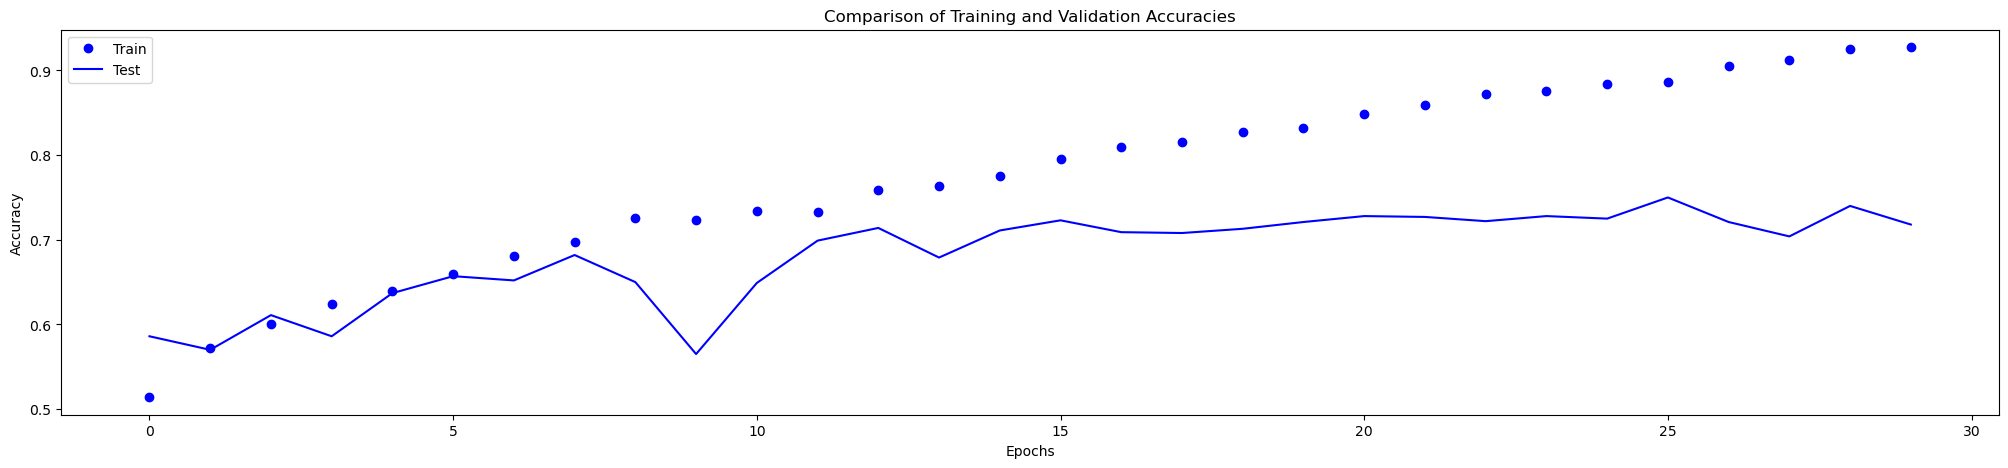

<Figure size 640x480 with 0 Axes>

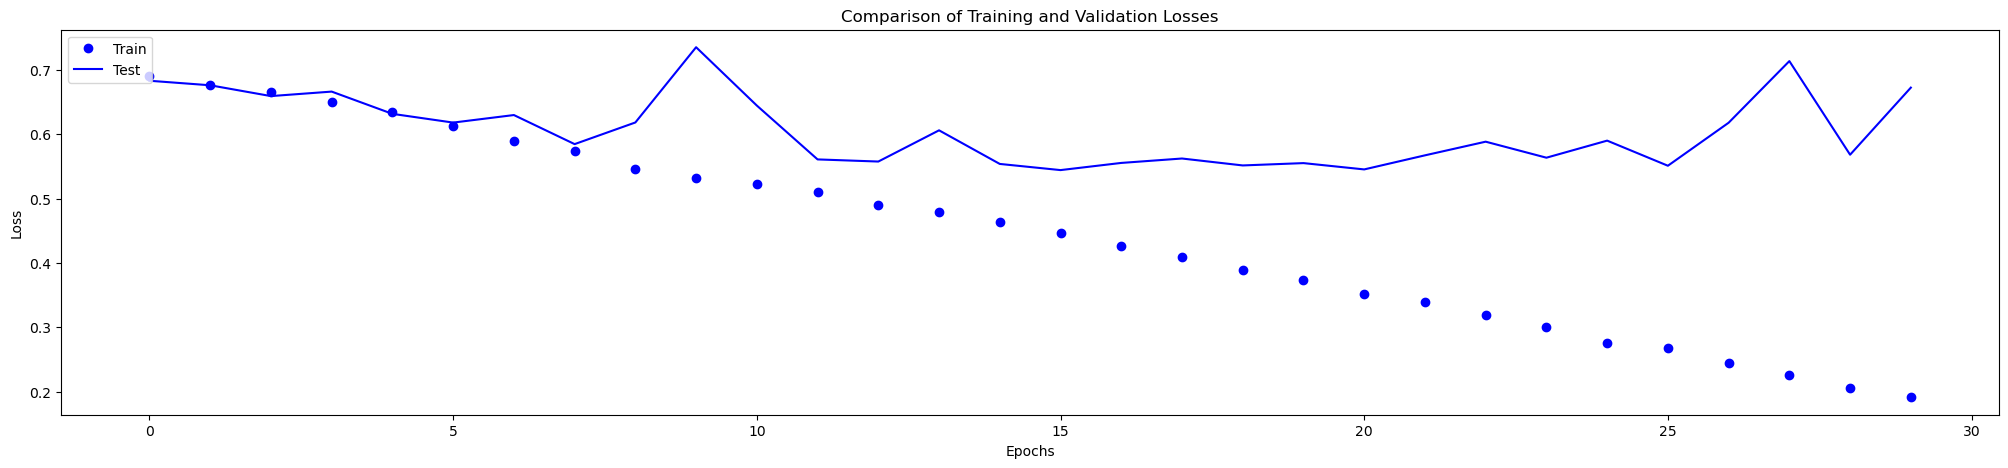

In [84]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

models_acc.append(acc1)
models_val_acc.append(val_acc1)
models_loss.append(loss1)
models_val_loss.append(val_loss1)

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

## Korzystanie z rozszerzenia danych (augmentacja danych)


In [10]:
from keras.preprocessing.image import ImageDataGenerator

from keras import layers
from keras import models
from keras import optimizers

img_rows = 150
img_cols = 150

In [9]:
datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [13]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#history2 = model2.fit_generator(
history2 = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Zapiszmy nasz model 2, ponieważ będziemy go później używać.

In [16]:
model2.save(models_dir + 'cats_and_dogs_small_2.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

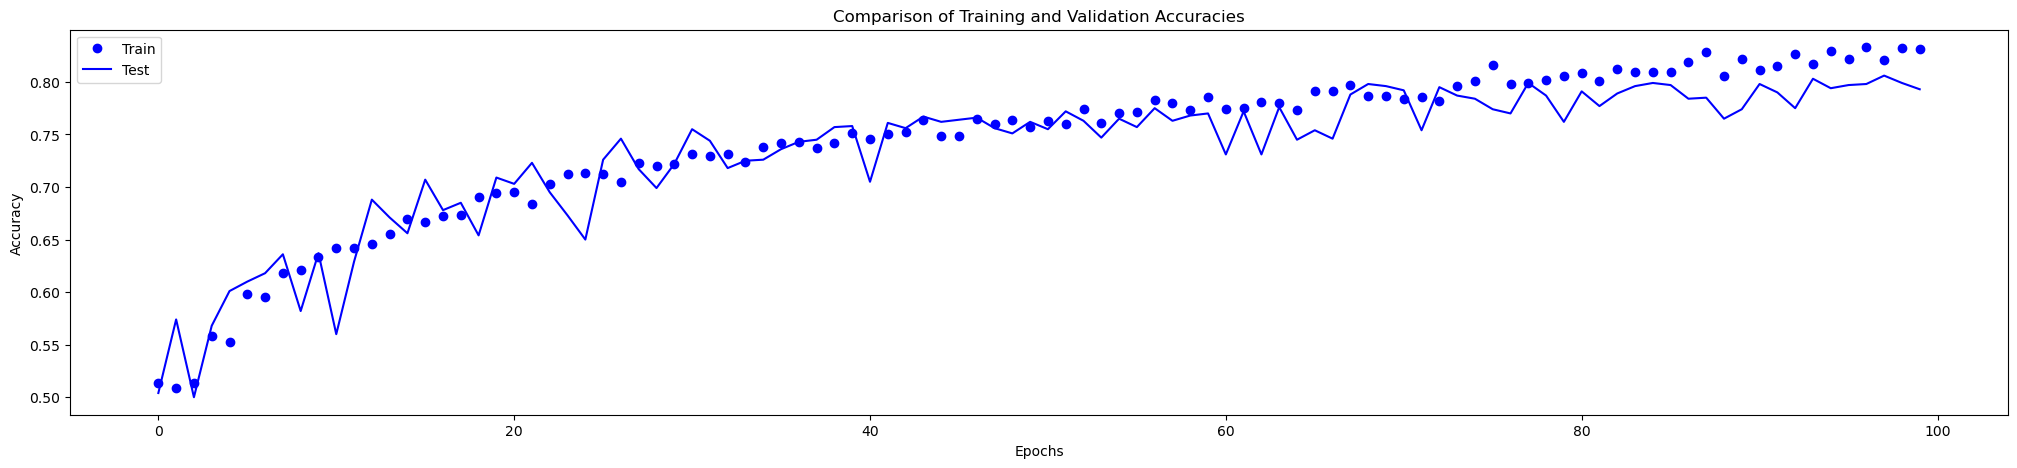

<Figure size 640x480 with 0 Axes>

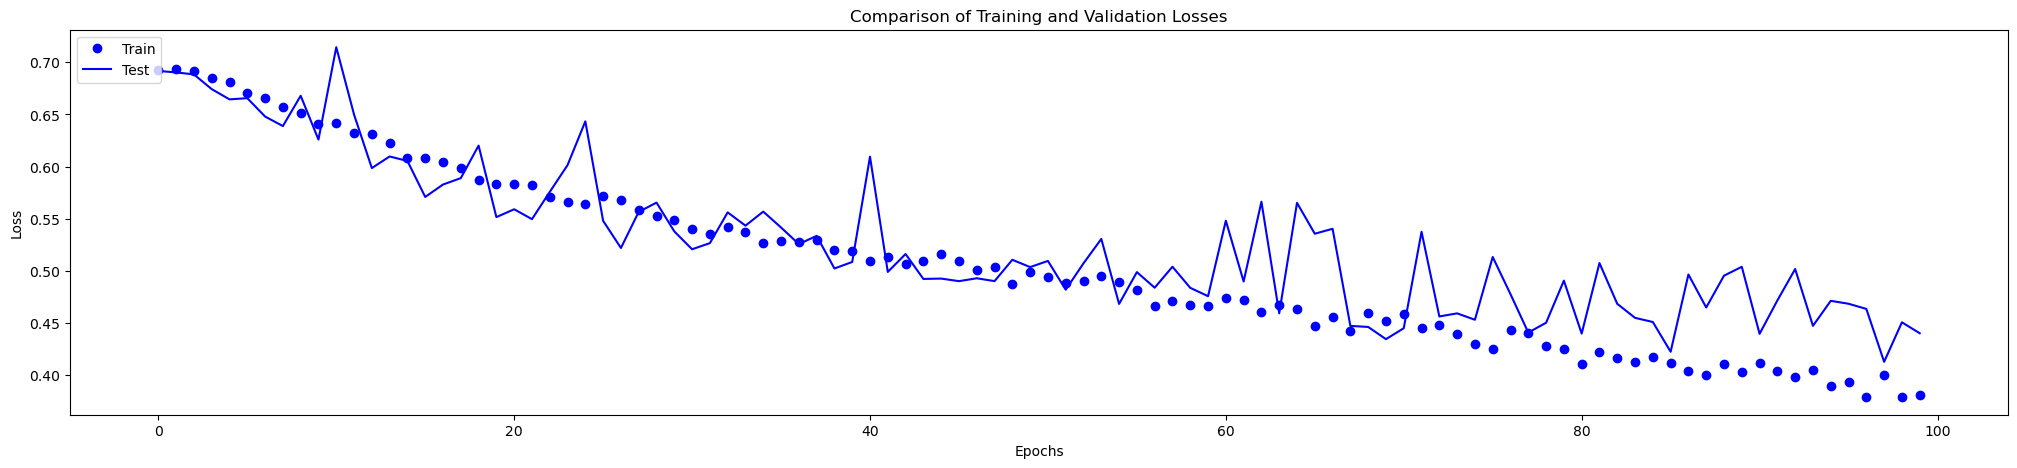

In [85]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

models_acc.append(acc2)
models_val_acc.append(val_acc2)
models_loss.append(loss2)
models_val_loss.append(val_loss2)

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

In [22]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotTwoAccuracyComparison(acc1, val_acc1, acc2, val_acc2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.plot(epochs, acc2, 'ro', label='Training accuracy for ' + lab2)
    plt.plot(epochs, val_acc2, 'r', label='Validation accuracy for ' + lab2)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotTwoLossComparison(loss1, val_loss1, loss2, val_loss2, lab1 = 'Model 1', lab2 = 'Model 2'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, loss2, 'ro', label='Training loss for ' + lab2)
    plt.plot(epochs, val_loss2, 'r', label='Validation loss for ' + lab2)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

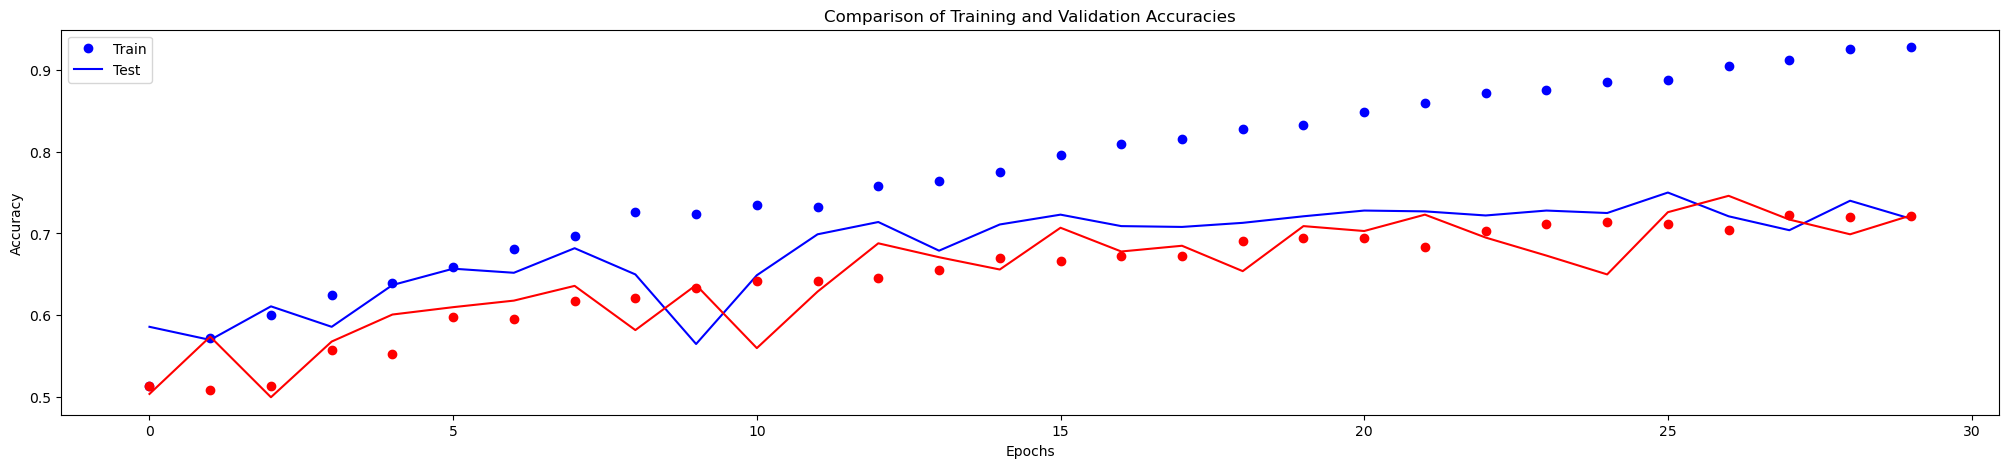

<Figure size 640x480 with 0 Axes>

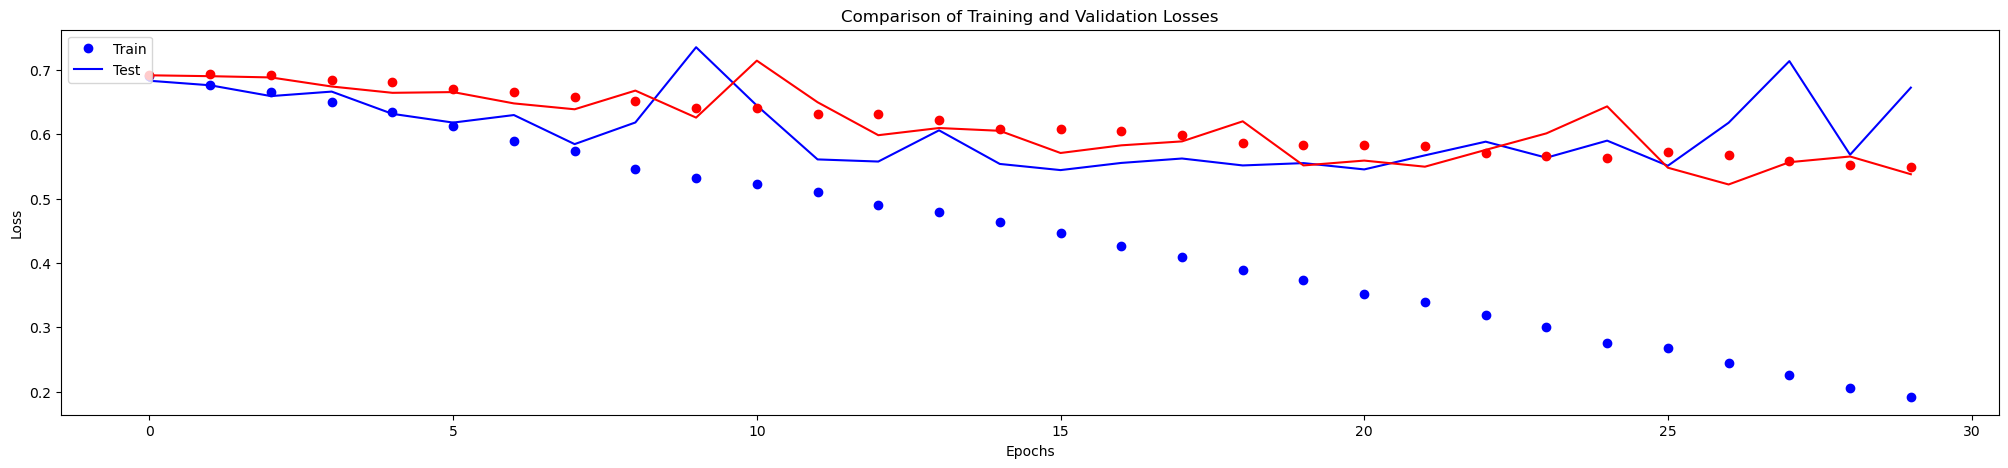

In [19]:
PlotTwoAccuracyComparison(acc1, val_acc1, acc2[:30], val_acc2[:30], lab1 = 'Model 1', lab2 = 'Model 2')
PlotTwoLossComparison(loss1, val_loss1, loss2[:30], val_loss2[:30], lab1 = 'Model 1', lab2 = 'Model 2')

In [11]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
def PlotMultipleAccuracyComparison(accs ,val_accs):
    plt.clf()   # clear figure
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(len(accs[0]))
    for i,  (acc, val_acc, color) in enumerate(zip(accs, val_accs, colors)):
            plt.plot(epochs, acc, f'{color}o', label=f'Training accuracy of model {i+1}')
            plt.plot(epochs, val_acc, f'{color}', label=f'Validation accuracy of model {i+1}')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def PlotMultipleLossComparison(losses, val_losses):
    plt.clf()   # clear figure
    epochs = range(len(losses[0]))
    for i,  (loss, val_loss, color) in enumerate(zip(losses, val_losses, colors)):
        plt.plot(epochs, loss, f'{color}o', label=f'Training loss of model {i+1}')
        plt.plot(epochs, val_loss, f'{color}', label=f'Validation loss of model {i+1}')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## ZADANIA (2 punkty)

* Zmodyfikuj hiperparametry modelu (strukturę, liczbę warstw w sieci i liczbę filtrów na warstwę splotu, augmentację, regularyzację, dropout i inne hiperparametry, dodaj normalizację wsadową, użyj różnych funkcji aktywacji itp.) oraz spróbuj osiągnąć wyższą dokładność.
* Wybierz więcej niż 2000 przykładów treningowych ze zbioru danych i sprawdź, jak bardzo pomaga to lepiej nauczyć model przy rosnącej liczbie przykładów wykorzystywanych do uczenia. Zwiększ liczbę tylko przykładów uczących, używając np. 4000, 8000, aż do 23000 przykładów. Jeśli moc obliczeniowa twojego komputera jest niewystarczająca, nie używaj wszystkich. Dla porównań użyj tego samego zestawu walidacyjnego i testowego, aby uzyskać wiarygodne porównania do modeli stosujących inną liczbę przykładów uczących oraz z zaprezentowanym tutaj modelem.
* Porównaj wyniki uzyskane dla różnych hiperparametrów. Zmieniaj hiperparametry pojedynczo. Wyciągnij wnioski dotyczące wykorzystania różnych hiperparametrów w swoich eksperymentach. 
* Porównaj dokładność (accuracy) i straty (loss) swoich modeli za pomocą wykresów (np. PlotTwoAccuracyComparison i PlotTwoLossComparison).
* Przechowuj opracowany model `model2.save(models_dir + 'cats_and_dogs_small_my.h5')` ponieważ użyjemy go ponownie na następnych zajęciach do wizualizacji i inspekcji filtrów!
* Na koniec użyj innego zestawu danych obrazu, np. z <a href="www.kaggle.com">Kaggle.com</a> do klasyfikacji, wytrenuj go i zapisz, aby użyć go ponownie w następnych zajęciach do wizualizacji i kontroli filtry!

## Model 3

In [26]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(512, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [27]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 17, 17, 256)     

In [29]:
history3 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6925 - acc: 0.5285 - val_loss: 0.6870 - val_acc: 0.5710
Epoch 2/100
100/100 [==============================] - 15s 147ms/step - loss: 0.6877 - acc: 0.5490 - val_loss: 0.6818 - val_acc: 0.5490
Epoch 3/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6818 - acc: 0.5630 - val_loss: 0.6662 - val_acc: 0.5830
Epoch 4/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6777 - acc: 0.5750 - val_loss: 0.6515 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6600 - acc: 0.5885 - val_loss: 0.6323 - val_acc: 0.6540
Epoch 6/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6468 - acc: 0.6070 - val_loss: 0.6198 - val_acc: 0.6780
Epoch 7/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6260 - acc: 0.6475 -

Zapisujemy model 3

In [30]:
model3.save(models_dir + 'cats_and_dogs_small_3.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

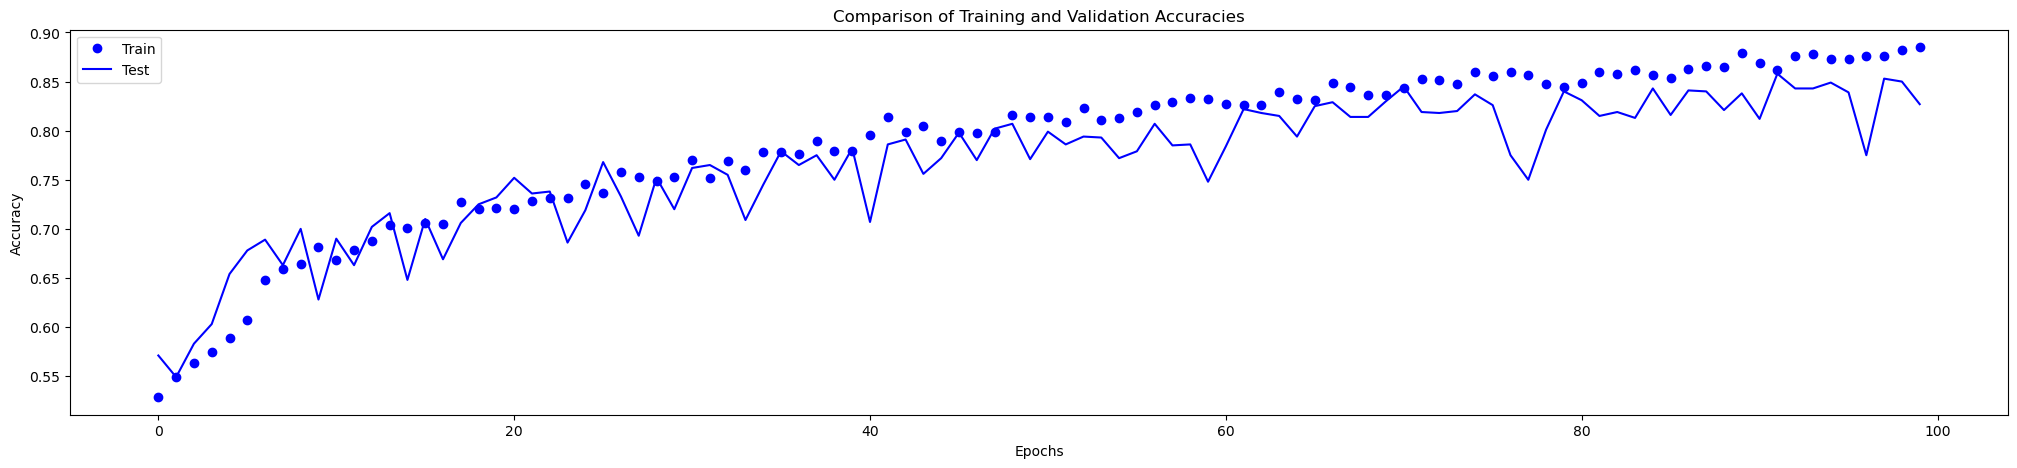

<Figure size 640x480 with 0 Axes>

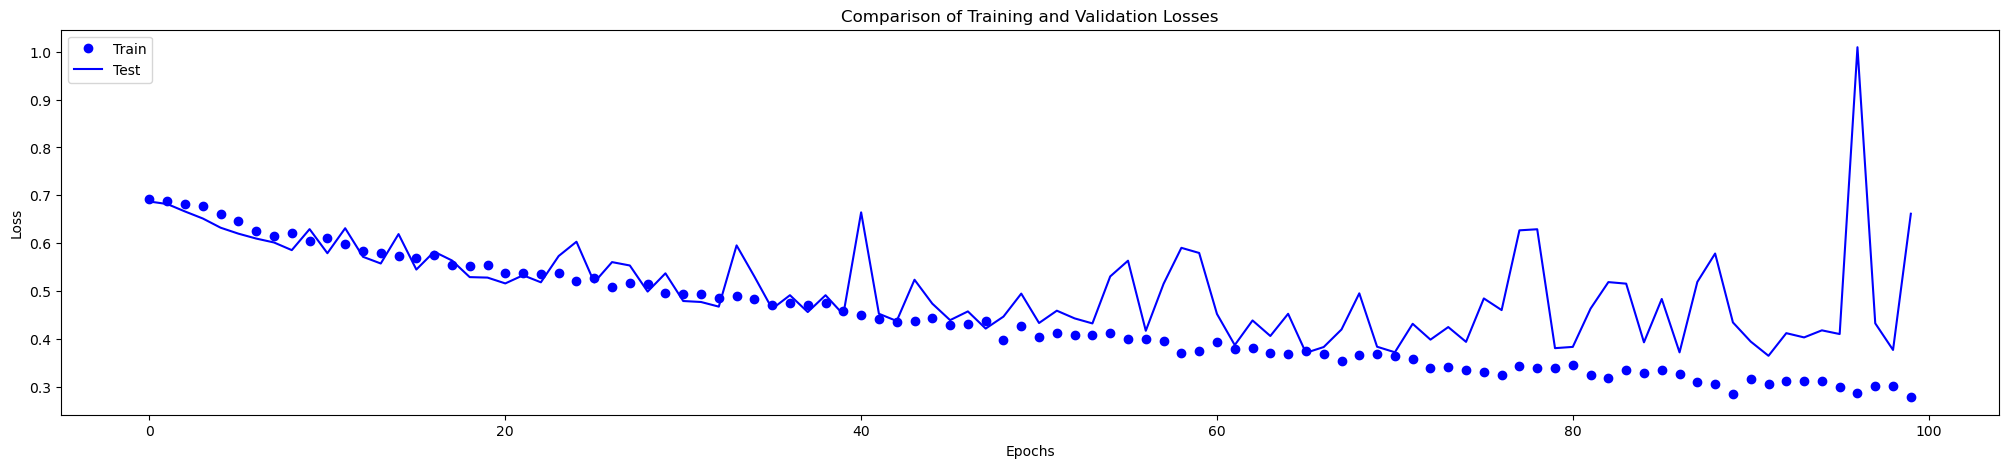

In [86]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

models_acc.append(acc3)
models_val_acc.append(val_acc3)
models_loss.append(loss3)
models_val_loss.append(val_loss3)

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

In [56]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
def PlotMultipleAccuracyComparison(accs ,val_accs, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(epoch_limit)
    print('accs len:', len(accs[0]))
    print('epochs:', epochs)
    for i,  (acc, val_acc, color) in enumerate(zip(accs, val_accs, colors)):
            limit = min(len(epochs), len(acc))
            plt.plot(epochs[:limit], acc[:limit], f'{color}o', label=f'Training accuracy of model {i+1}')
            plt.plot(epochs[:limit], val_acc[:limit], f'{color}', label=f'Validation accuracy of model {i+1}')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def PlotMultipleLossComparison(losses, val_losses, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    epochs = range(epoch_limit)
    for i,  (loss, val_loss, color) in enumerate(zip(losses, val_losses, colors)):
        limit = min(len(epochs), len(loss))
        plt.plot(epochs[:limit], loss[:limit], f'{color}o', label=f'Training loss of model {i+1}')
        plt.plot(epochs[:limit], val_loss[:limit], f'{color}', label=f'Validation loss of model {i+1}')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

accs len: 30
epochs: range(0, 30)


<Figure size 640x480 with 0 Axes>

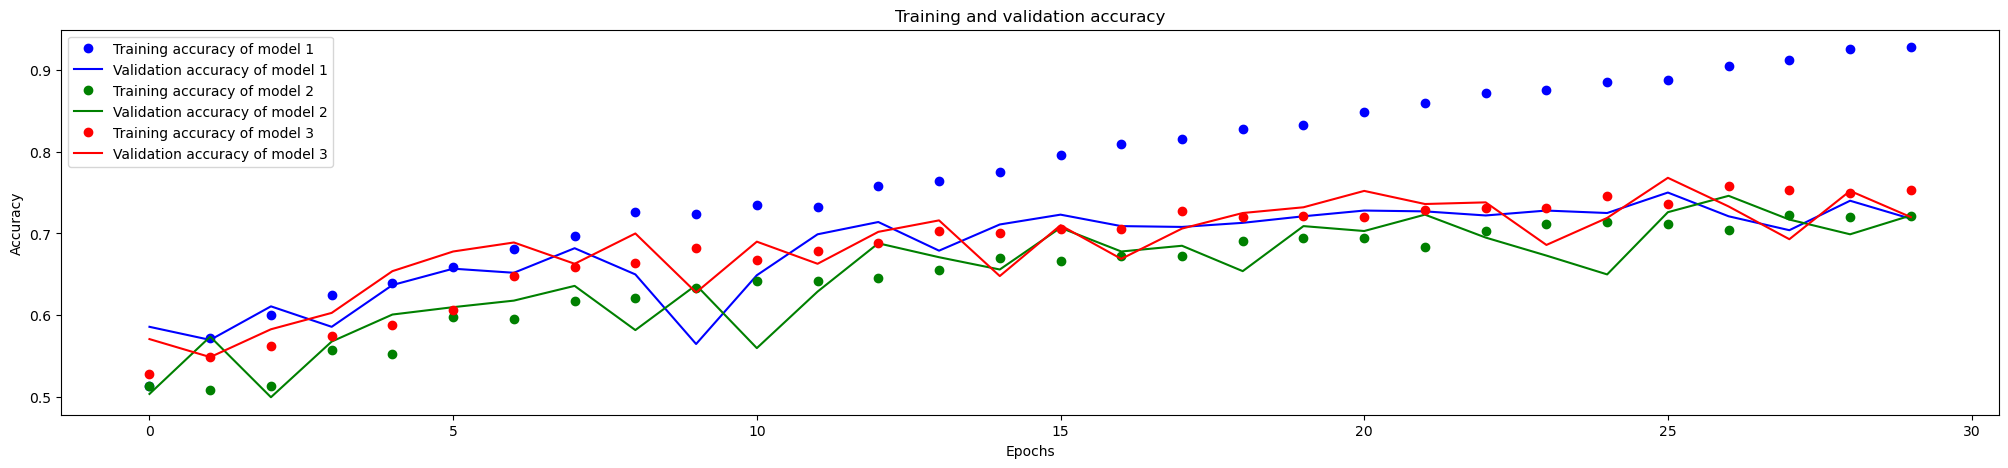

In [105]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, 30)

<Figure size 640x480 with 0 Axes>

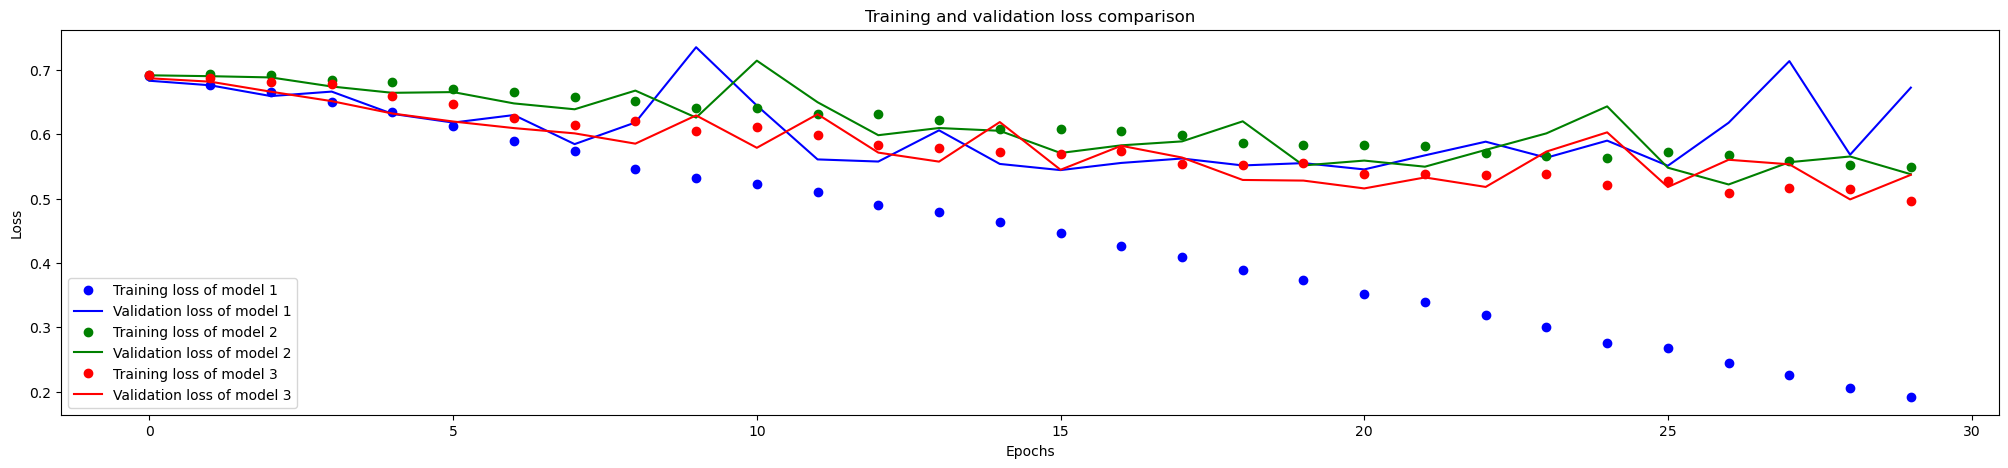

In [106]:
PlotMultipleLossComparison(models_loss, models_val_loss, 30)

#### Model 3. działa nieco lepiej niż poprzednie dwa modele. Względem modelu 2. nieco zwiększyła się dokładność na zbiorze walidacyjnym oraz delikatnie spadła strata.

### Sprawdźmy jak wygląda to na 100 epokach zamiast 30.

accs len: 30
epochs: range(0, 100)


<Figure size 640x480 with 0 Axes>

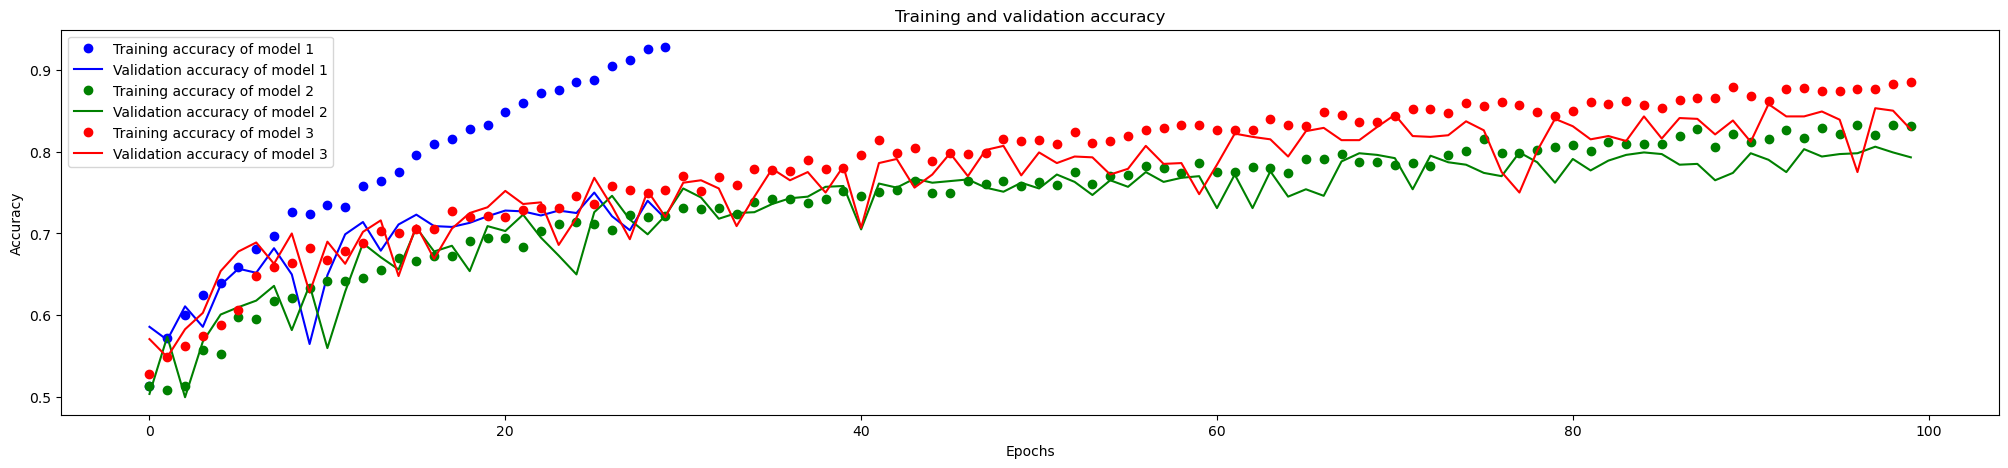

In [107]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=100)

<Figure size 640x480 with 0 Axes>

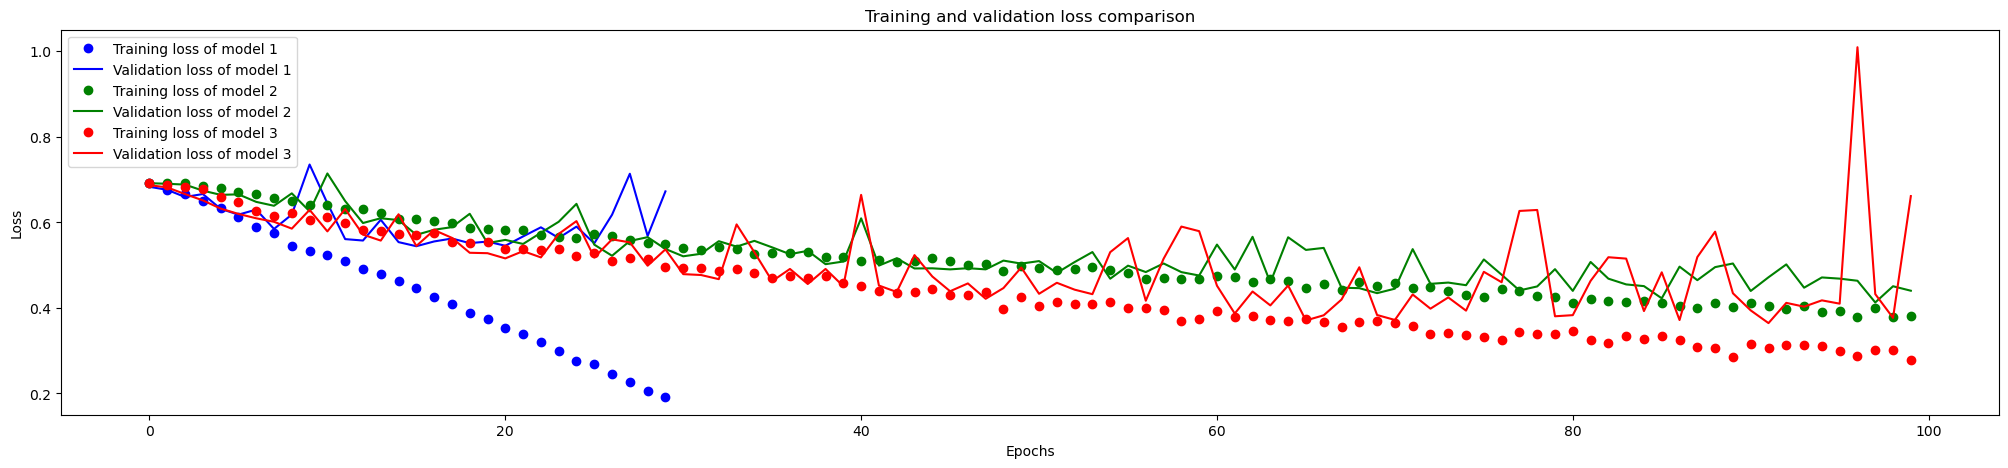

In [108]:
PlotMultipleLossComparison(models_loss, models_val_loss, 100)

#### Model trzeci zdaje się dawać najlepszez rezultaty podczas uczenia przez 100 epok patrząc na `accuracy`, `loss` jest na podobnym poziomie jak w modelu drugim.

## Model 4 (zwiększenie Dropout na podstawie modelu 3)
W modelu trzecim przy 100 epoce widać jakby uczenie dążyło do overfittingu (powoli `val_acc` zaczyna odbiegać od `acc`, podobnie loss), pora zwiększyć ilość epok oraz dropout i sprawdzić jaki wpływ będzie miała ta zmiana na wyniki.

In [109]:
model4 = models.Sequential()
model4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.8))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [110]:
history4 = model4.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/150
100/100 [==============================] - 16s 148ms/step - loss: 0.6966 - acc: 0.4925 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 2/150
100/100 [==============================] - 15s 149ms/step - loss: 0.6935 - acc: 0.5110 - val_loss: 0.6901 - val_acc: 0.5740
Epoch 3/150
100/100 [==============================] - 14s 143ms/step - loss: 0.6897 - acc: 0.5230 - val_loss: 0.6821 - val_acc: 0.5220
Epoch 4/150
100/100 [==============================] - 14s 143ms/step - loss: 0.6847 - acc: 0.5515 - val_loss: 0.6681 - val_acc: 0.6060
Epoch 5/150
100/100 [==============================] - 15s 147ms/step - loss: 0.6726 - acc: 0.5870 - val_loss: 0.7380 - val_acc: 0.5060
Epoch 6/150
100/100 [==============================] - 15s 146ms/step - loss: 0.6562 - acc: 0.6070 - val_loss: 0.6395 - val_acc: 0.6310
Epoch 7/150
100/100 [==============================] - 14s 144ms/step - loss: 0.6461 - acc: 0.6175 - val_loss: 0.6481 - val_acc: 0.6170
Epoch 8/150
100/100 [===========================

Zapiszmy model.

In [111]:
model4.save(models_dir + 'cats_and_dogs_small_4.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

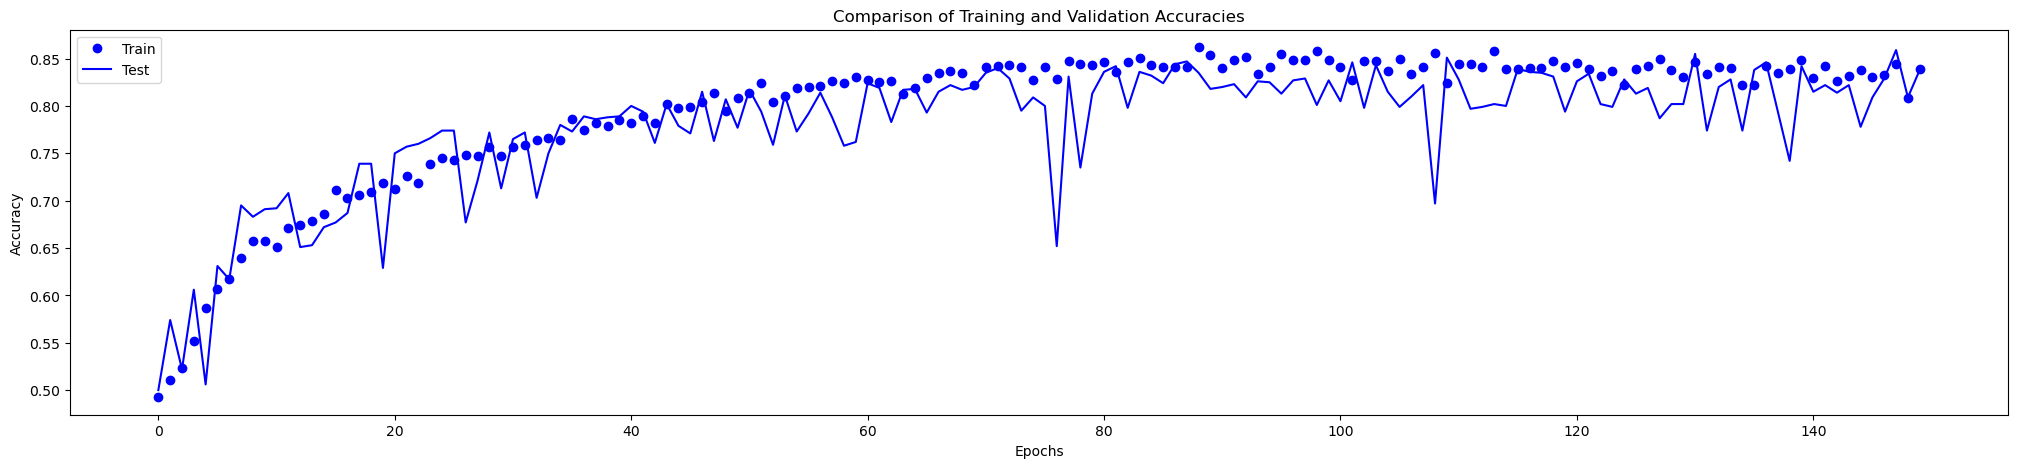

<Figure size 640x480 with 0 Axes>

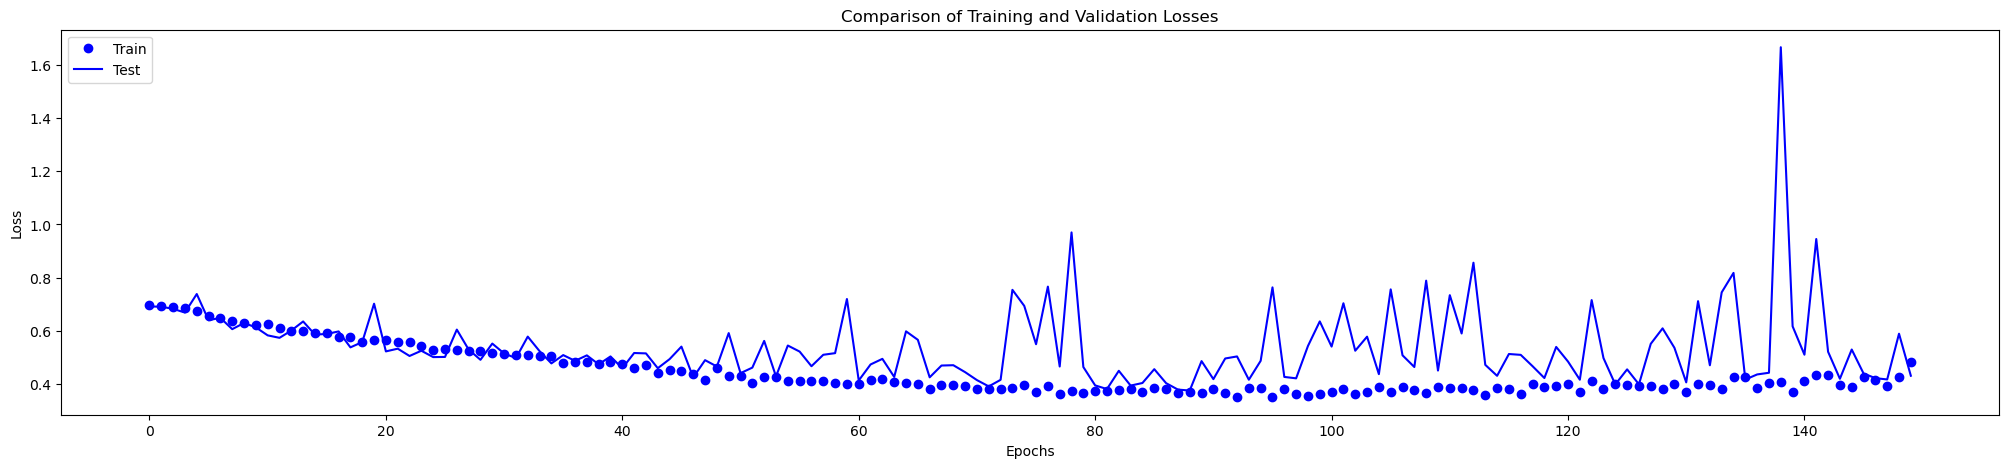

In [112]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

models_acc.append(acc4)
models_val_acc.append(val_acc4)
models_loss.append(loss4)
models_val_loss.append(val_loss4)

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')
PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

#### Model 4 posiada stosunkowo dużo wahań (`spikes`) zarówno jeśli  bierzemy pod uwagę dokładność lub stratę dla zbioru walidacyjnego. Tak wysokie fluktuacje mogą być spowodowane dość wysoką wartością `rate` w warstwie Dropout. <br>Uczenie przez 150 epok wydaje się być nadmiarowe, od 100 epoki model w zasadzie nie poprawia swojej skuteczności.

accs len: 30
epochs: range(0, 150)


<Figure size 640x480 with 0 Axes>

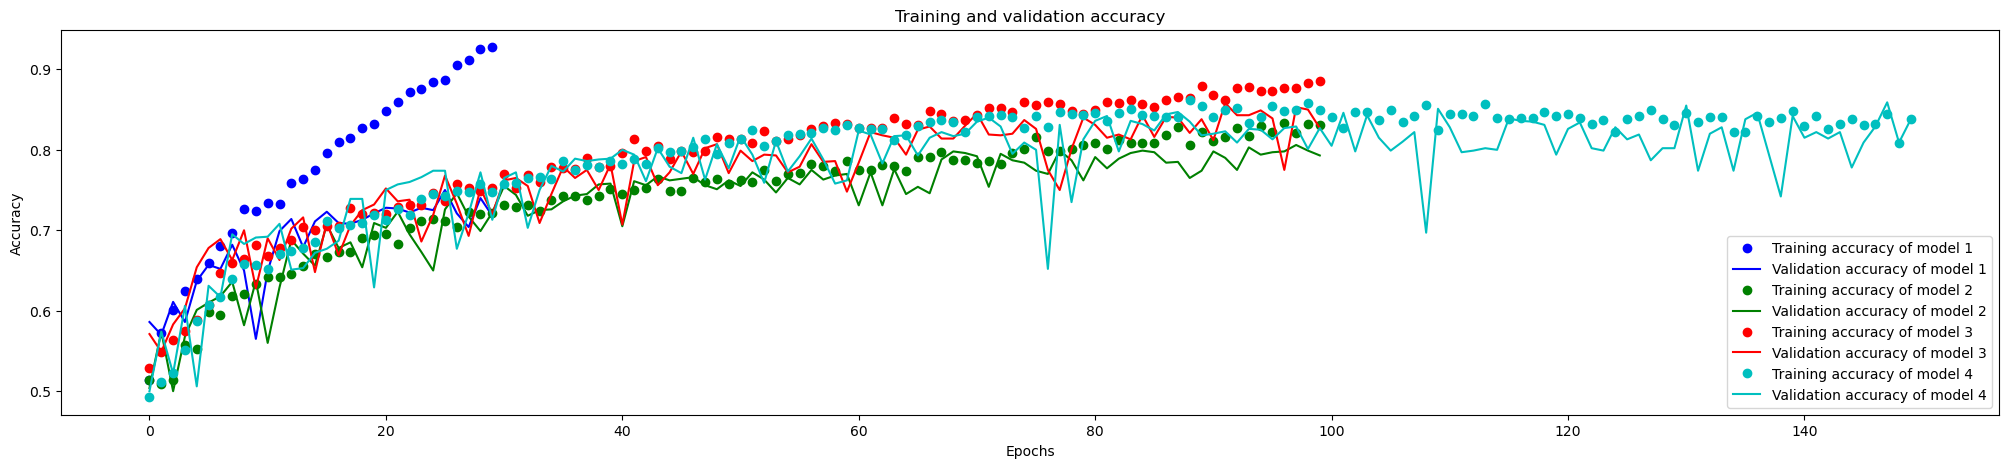

In [113]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, 150)

<Figure size 640x480 with 0 Axes>

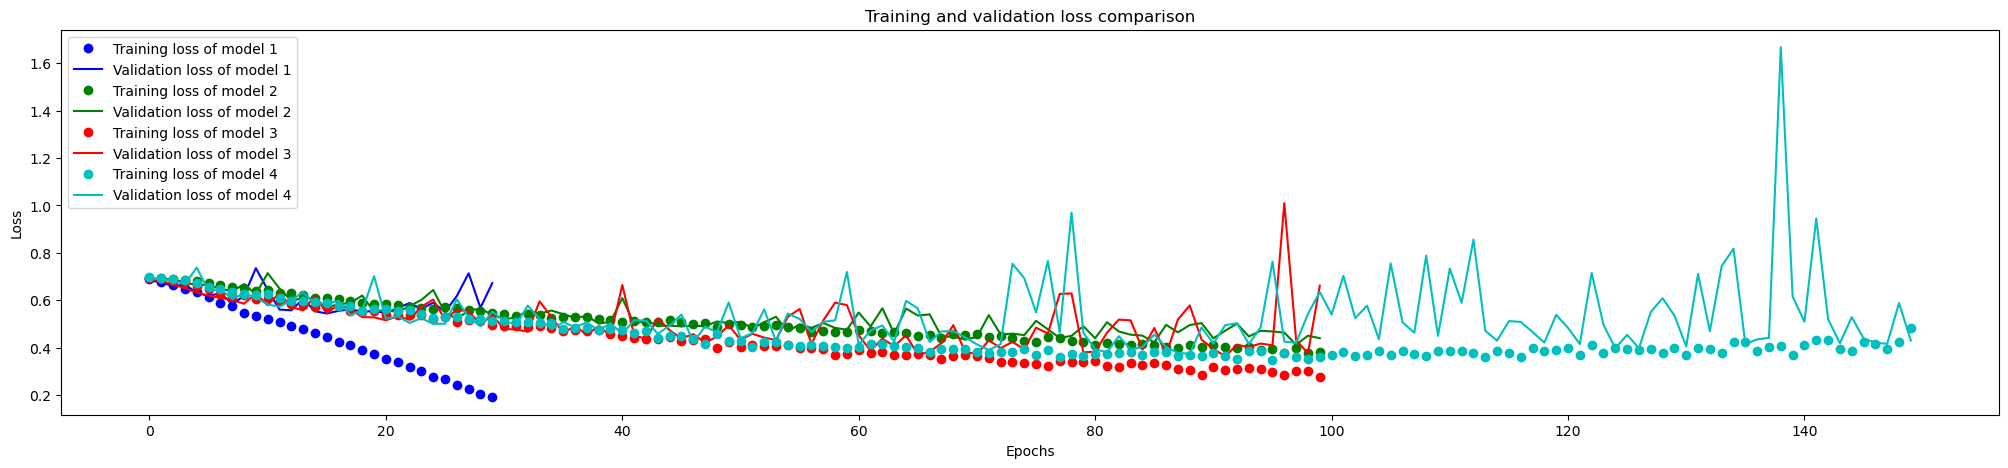

In [114]:
PlotMultipleLossComparison(models_loss, models_val_loss, 150)

Na podstawie wykresów widać, że Model 4 nie przebił skuteczności Modelu 3.

## Model 5 
Zmniejszenie ilości warstw ukrytych.

In [115]:
model5 = models.Sequential()
model5.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(256, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [116]:
history5 = model5.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 16s 150ms/step - loss: 0.7101 - acc: 0.5125 - val_loss: 0.6823 - val_acc: 0.5900
Epoch 2/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6813 - acc: 0.5570 - val_loss: 0.6494 - val_acc: 0.5910
Epoch 3/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6569 - acc: 0.6010 - val_loss: 0.6471 - val_acc: 0.5650
Epoch 4/100
100/100 [==============================] - 14s 143ms/step - loss: 0.6395 - acc: 0.6265 - val_loss: 0.6132 - val_acc: 0.6590
Epoch 5/100
100/100 [==============================] - 14s 143ms/step - loss: 0.6309 - acc: 0.6335 - val_loss: 0.5976 - val_acc: 0.6740
Epoch 6/100
100/100 [==============================] - 14s 141ms/step - loss: 0.6184 - acc: 0.6535 - val_loss: 0.5987 - val_acc: 0.6660
Epoch 7/100
100/100 [==============================] - 14s 143ms/step - loss: 0.6114 - acc: 0.6530 - val_loss: 0.5797 - val_acc: 0.6880
Epoch 8/100
100/100 [===========================

Zapiszmy nasz model 2, ponieważ będziemy go później używać.

In [117]:
model5.save(models_dir + 'cats_and_dogs_small_5.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

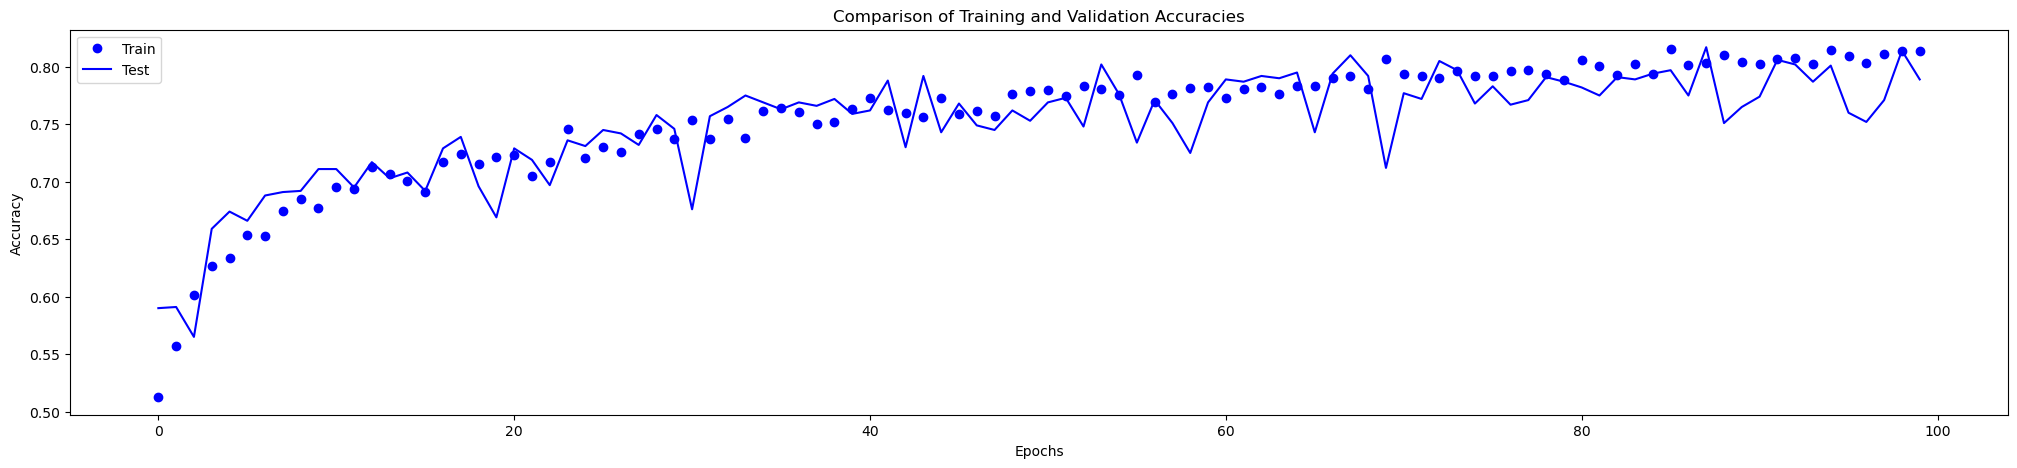

<Figure size 640x480 with 0 Axes>

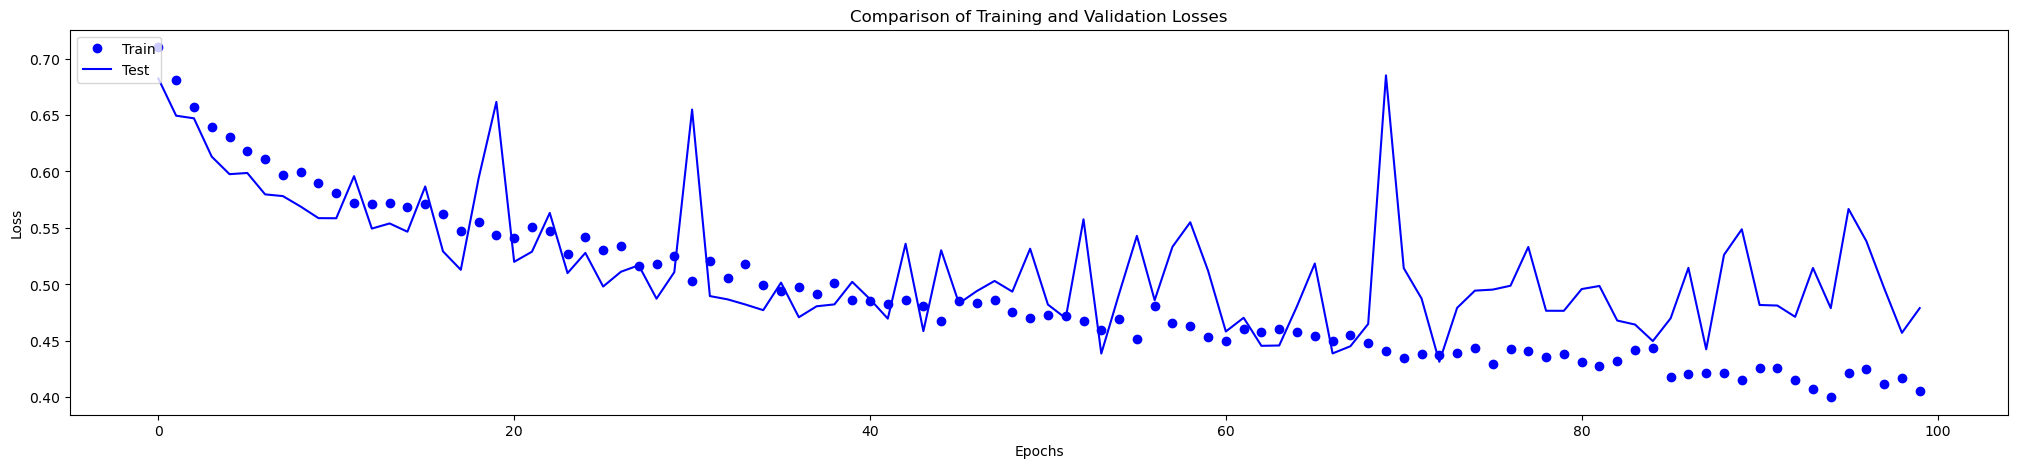

In [118]:
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

models_acc.append(acc5)
models_val_acc.append(val_acc5)
models_loss.append(loss5)
models_val_loss.append(val_loss5)

PlotAccuracyComparison(acc5, val_acc5, lab = 'Model 5')
PlotLossComparison(loss5, val_loss5, lab = 'Model 5')

accs len: 30
epochs: range(0, 150)


<Figure size 640x480 with 0 Axes>

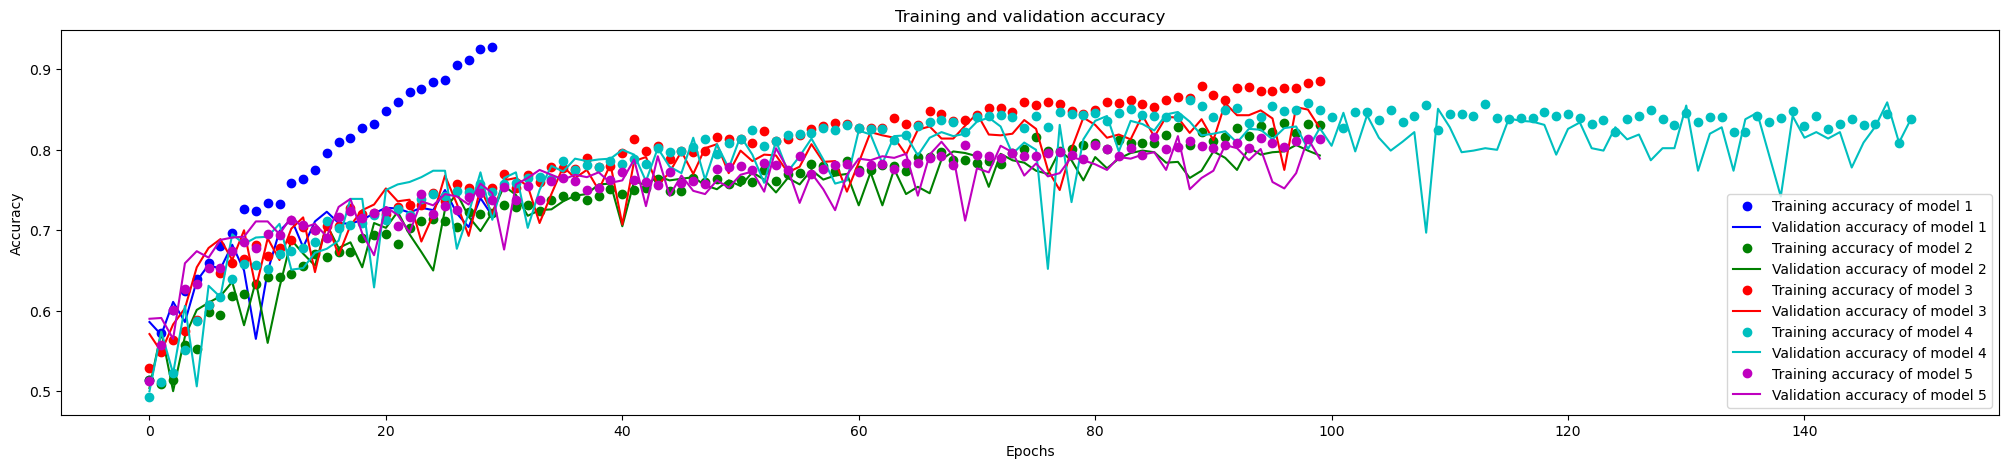

In [119]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, 150)

<Figure size 640x480 with 0 Axes>

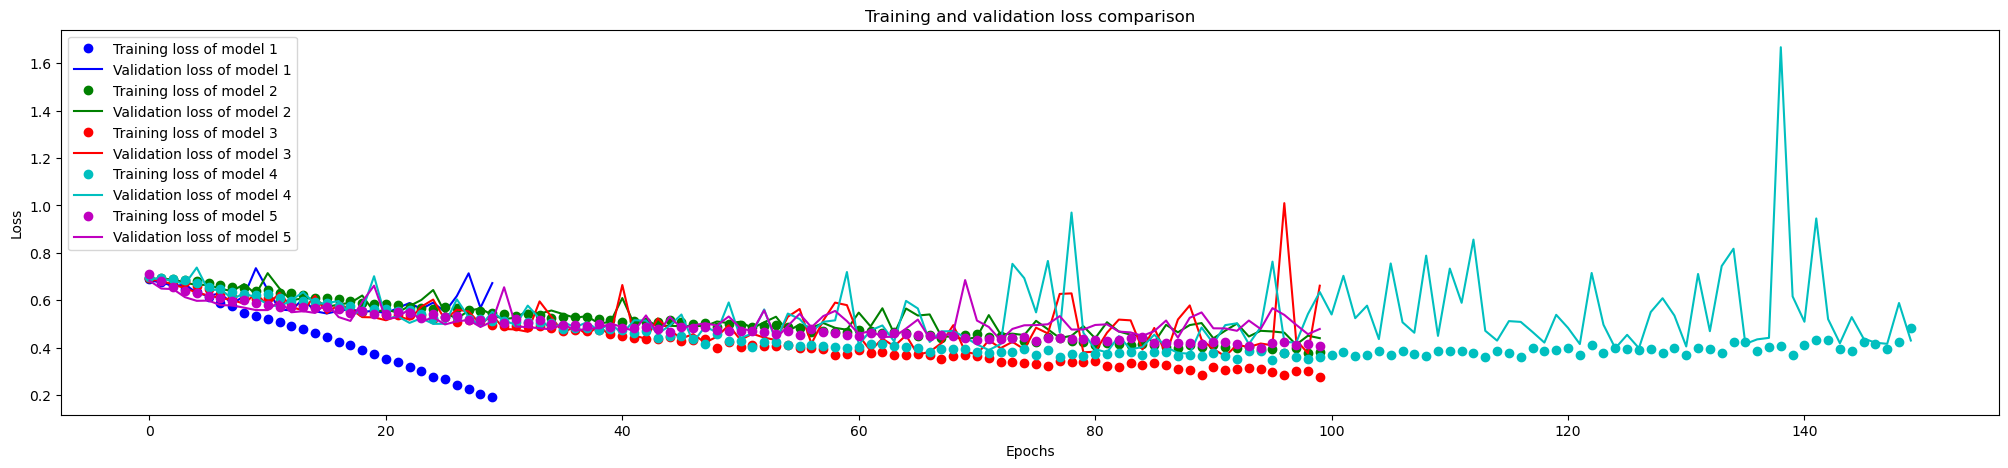

In [120]:
PlotMultipleLossComparison(models_loss, models_val_loss, 150)

### Save results for the first 5 models in the pickles

In [19]:
import pickle


# method used for saving object as pickle
def save_object_as_pickle(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, pickle.HIGHEST_PROTOCOL)

In [127]:
save_object_as_pickle(models_acc, "model_acc__1_to_5.pkl")
save_object_as_pickle(models_val_acc, "models_val_acc__1_to_5.pkl")
save_object_as_pickle(models_loss, "models_loss__1_to_5.pkl")
save_object_as_pickle(models_val_loss, "models_val_loss__1_to_5.pkl")

### Check if data saved properly

In [128]:
import pandas as pd

print("model_acc__1_to_5.pkl\n", pd.read_pickle("model_acc__1_to_5.pkl"), "\n")
print("models_val_acc__1_to_5.pkl\n", pd.read_pickle("models_val_acc__1_to_5.pkl"), "\n")
print("models_loss__1_to_5.pkl\n", pd.read_pickle("models_loss__1_to_5.pkl"), "\n")
print("models_val_loss__1_to_5.pkl\n", pd.read_pickle("models_val_loss__1_to_5.pkl"), "\n")

model_acc__1_to_5.pkl
 [[0.5139999985694885, 0.5720000267028809, 0.6004999876022339, 0.6244999766349792, 0.6395000219345093, 0.6589999794960022, 0.6809999942779541, 0.6970000267028809, 0.7260000109672546, 0.7235000133514404, 0.734499990940094, 0.7325000166893005, 0.7584999799728394, 0.7639999985694885, 0.7749999761581421, 0.7954999804496765, 0.809499979019165, 0.8149999976158142, 0.8274999856948853, 0.8320000171661377, 0.8485000133514404, 0.859000027179718, 0.871999979019165, 0.8755000233650208, 0.8845000267028809, 0.8870000243186951, 0.9049999713897705, 0.9120000004768372, 0.925000011920929, 0.9275000095367432], [0.5134999752044678, 0.5084999799728394, 0.5134999752044678, 0.5580000281333923, 0.5529999732971191, 0.5979999899864197, 0.5950000286102295, 0.6179999709129333, 0.6209999918937683, 0.6334999799728394, 0.6414999961853027, 0.6420000195503235, 0.6460000276565552, 0.6549999713897705, 0.6700000166893005, 0.6664999723434448, 0.6725000143051147, 0.6729999780654907, 0.690500020980835,

In [20]:
import pandas as pd

# retrieve saved lists of accuracies and loss for the first 5 models
models_acc = pd.read_pickle("model_acc__1_to_5.pkl")
models_val_acc =  pd.read_pickle("models_val_acc__1_to_5.pkl")
models_loss = pd.read_pickle("models_loss__1_to_5.pkl")
models_val_loss = pd.read_pickle("models_val_loss__1_to_5.pkl")

## Model 6
Zmniejszenie ilości warstw ukrytych przy zwiększonej ilości neuronów w każdej z warstw.

In [14]:
model6 = models.Sequential()
model6.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(512, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(512, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(1, activation='sigmoid'))

model6.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
history6 = model6.fit(
      train_generator,
      steps_per_epoch=40,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/100
40/40 [==============================] - 22s 387ms/step - loss: 0.7183 - acc: 0.5025 - val_loss: 0.6917 - val_acc: 0.5125
Epoch 2/100
40/40 [==============================] - 15s 377ms/step - loss: 0.6947 - acc: 0.5013 - val_loss: 0.6857 - val_acc: 0.4950
Epoch 3/100
40/40 [==============================] - 15s 382ms/step - loss: 0.6930 - acc: 0.5213 - val_loss: 0.6793 - val_acc: 0.5575
Epoch 4/100
40/40 [==============================] - 15s 374ms/step - loss: 0.6788 - acc: 0.5512 - val_loss: 0.6718 - val_acc: 0.5250
Epoch 5/100
40/40 [==============================] - 15s 377ms/step - loss: 0.6799 - acc: 0.5437 - val_loss: 0.6713 - val_acc: 0.5925
Epoch 6/100
40/40 [==============================] - 15s 384ms/step - loss: 0.7030 - acc: 0.5625 - val_loss: 0.6498 - val_acc: 0.6400
Epoch 7/100
40/40 [==============================] - 15s 370ms/step - loss: 0.6613 - acc: 0.5950 - val_loss: 0.6566 - val_acc: 0.5675
Epoch 8/100
40/40 [==============================] - 15s 379ms

In [16]:
model6.save(models_dir + 'cats_and_dogs_small_6.h5')

<Figure size 640x480 with 0 Axes>

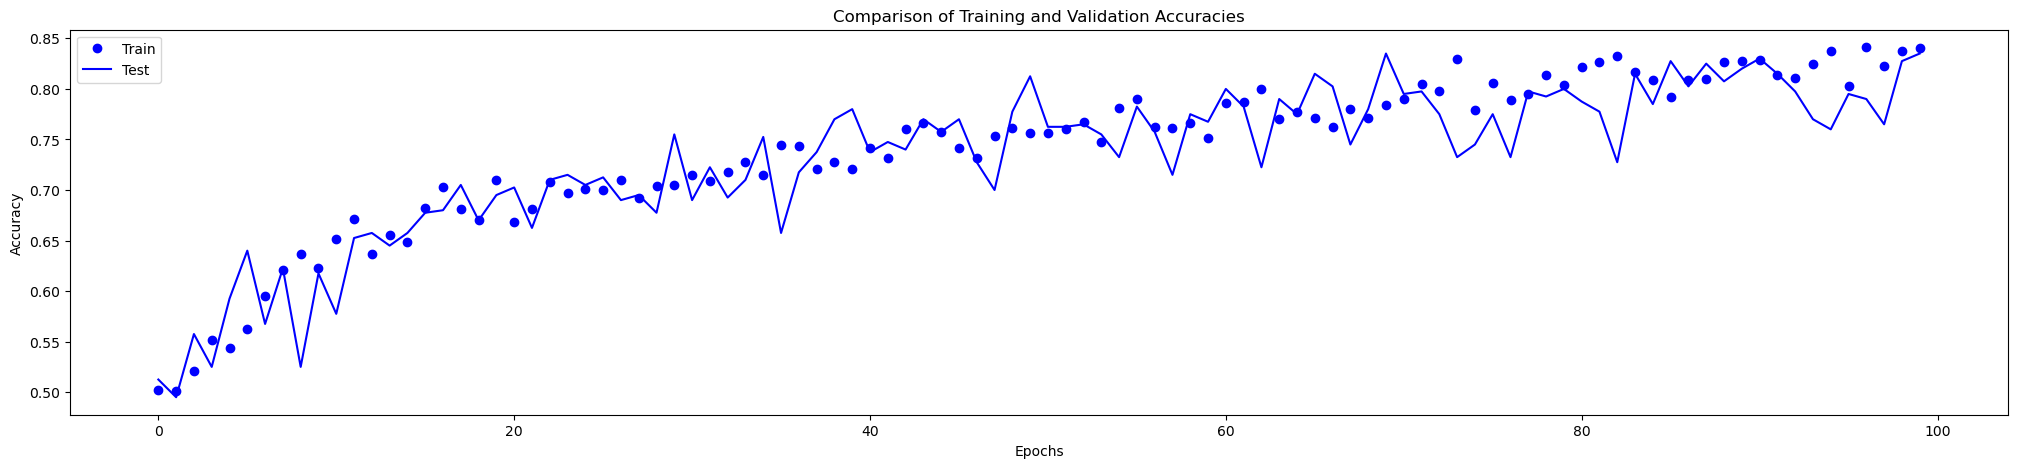

<Figure size 640x480 with 0 Axes>

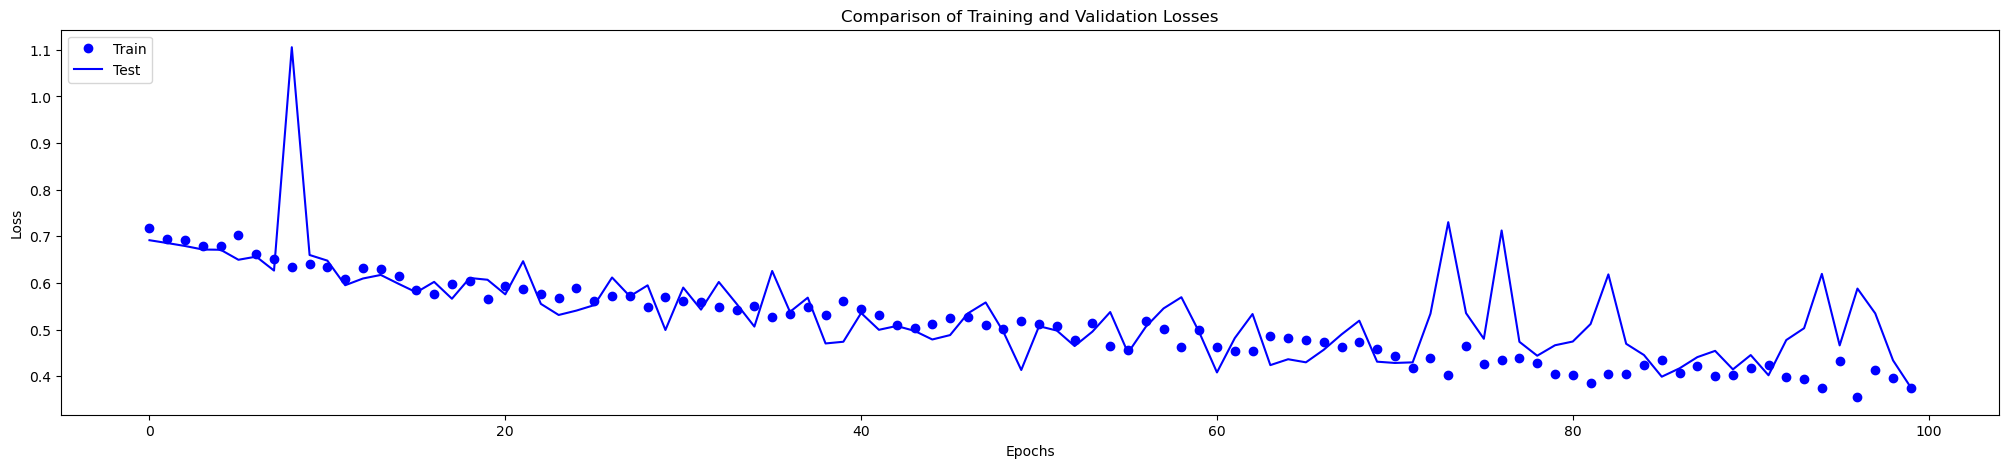

In [21]:
acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

models_acc.append(acc6)
models_val_acc.append(val_acc6)
models_loss.append(loss6)
models_val_loss.append(val_loss6)

PlotAccuracyComparison(acc6, val_acc6, lab = 'Model 6')
PlotLossComparison(loss6, val_loss6, lab = 'Model 6')

accs len: 30
epochs: range(0, 150)


<Figure size 640x480 with 0 Axes>

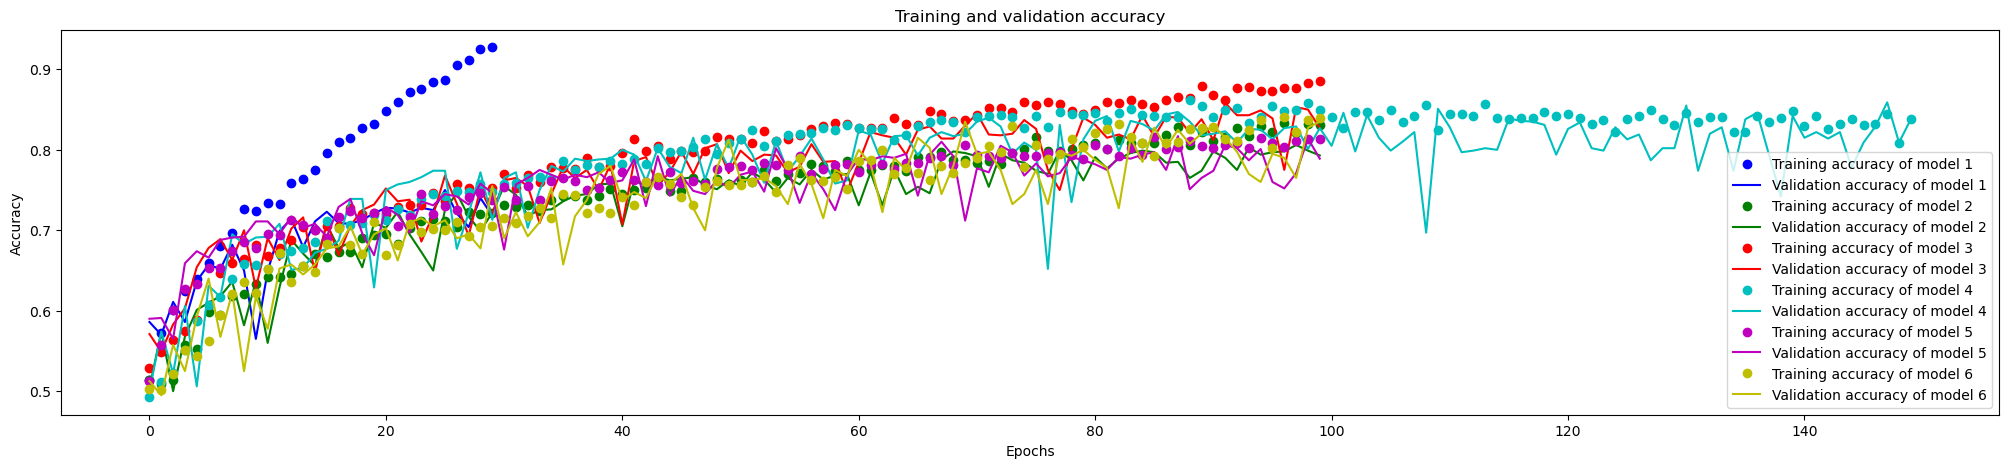

In [22]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, 150)

<Figure size 640x480 with 0 Axes>

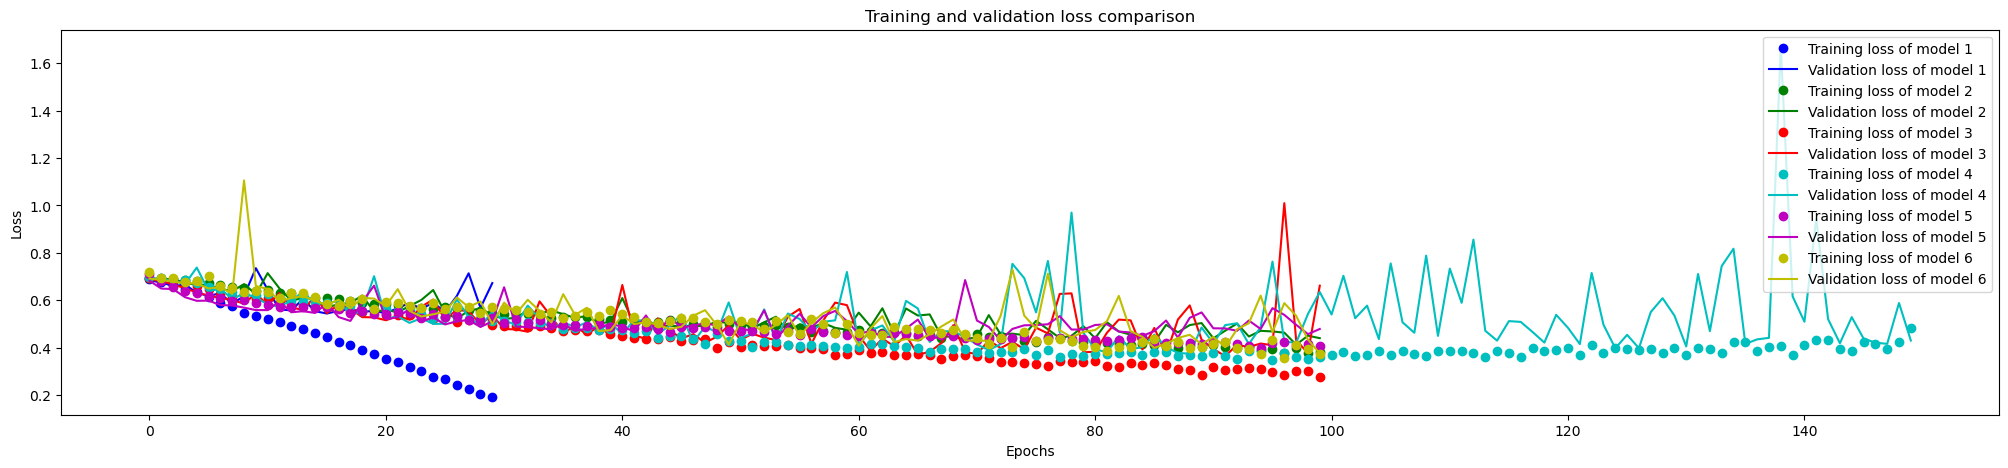

In [23]:
PlotMultipleLossComparison(models_loss, models_val_loss, 150)

Czytelność wykresu wraz z wzrostem trenowanych modeli zanika - trzeba porównywać konkretne modele. Dobrym punktem odniesienia jest model 3, który na ten moment wygląda na najlepiej działający.

Porównanie modelu 3 z modelem 6:

accs len: 100
epochs: range(0, 100)


<Figure size 640x480 with 0 Axes>

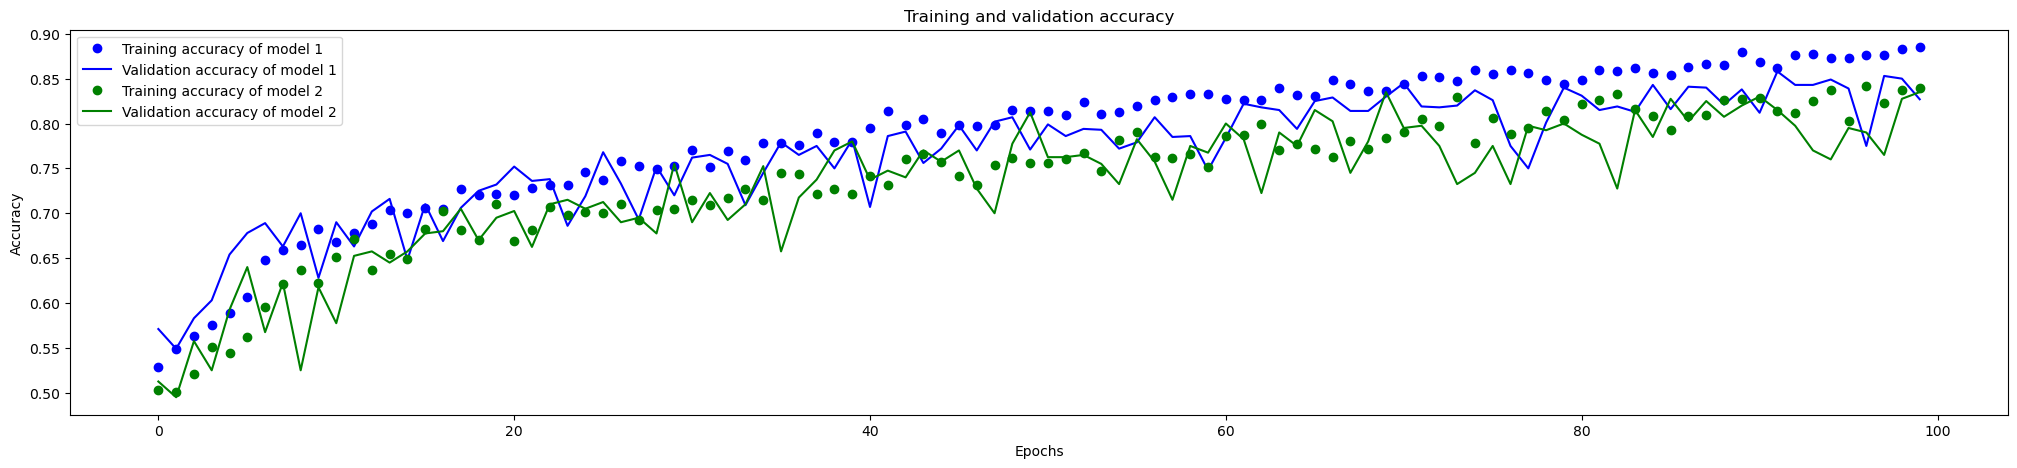

<Figure size 640x480 with 0 Axes>

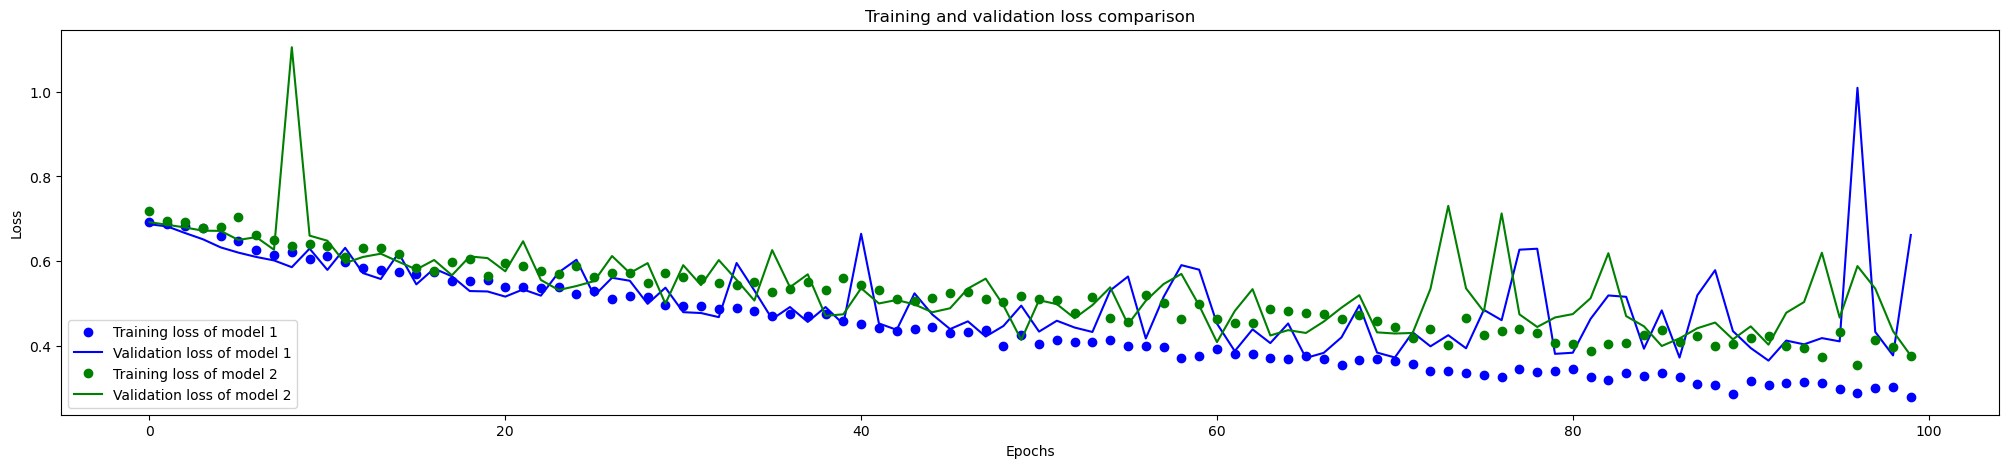

In [24]:
# Model na wykresie -> Faktyczny numer modelu
# Model 1 -> Model 3
# Model 2 -> Model 6
PlotMultipleAccuracyComparison([models_acc[x] for x in [2,5]], [models_val_acc[x] for x in [2,5]], 100)
PlotMultipleLossComparison([models_loss[x] for x in [2,5]], [models_val_loss[x] for x in [2,5]], 100)

Zwiększenie ilości neuronów przy jednoczesnym zmniejszeniu ilości warstw ukrytych nie poprawiło skuteczności sieci.

## Model 7
#### Model3 na ten moment jest najlepszą możliwą opcją, warto się bardziej mu przyglądnąć i pozmieniać pojedyncze parametry obserwując przy tym czy polepszy się jego dokładność/zmniejszy się strata. 

W tym modelu struktura jest taka sama jak w modelu 3, zmieniono jedynie funkcję aktywacji z `relu` na `tanh`, która też wykorzystywana jest w CNN.

In [25]:
model7 = models.Sequential()
model7.add(layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(img_rows, img_cols, 3)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(256, (3, 3), activation='tanh'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(512, (3, 3), activation='tanh'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(256, (3, 3), activation='tanh'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(256, activation='tanh'))
model7.add(layers.Dense(1, activation='sigmoid'))

model7.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [26]:
history7 = model7.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 18s 158ms/step - loss: 0.7031 - acc: 0.5125 - val_loss: 0.6683 - val_acc: 0.5940
Epoch 2/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6772 - acc: 0.5755 - val_loss: 0.7458 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6741 - acc: 0.5805 - val_loss: 0.6584 - val_acc: 0.5820
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6616 - acc: 0.5930 - val_loss: 0.6349 - val_acc: 0.6370
Epoch 5/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6588 - acc: 0.6105 - val_loss: 0.6239 - val_acc: 0.6280
Epoch 6/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6533 - acc: 0.6175 - val_loss: 0.6227 - val_acc: 0.6380
Epoch 7/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6457 - acc: 0.6110 - val_loss: 0.6127 - val_acc: 0.6500
Epoch 8/100
100/100 [===========================

In [27]:
model7.save(models_dir + 'cats_and_dogs_small_7.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

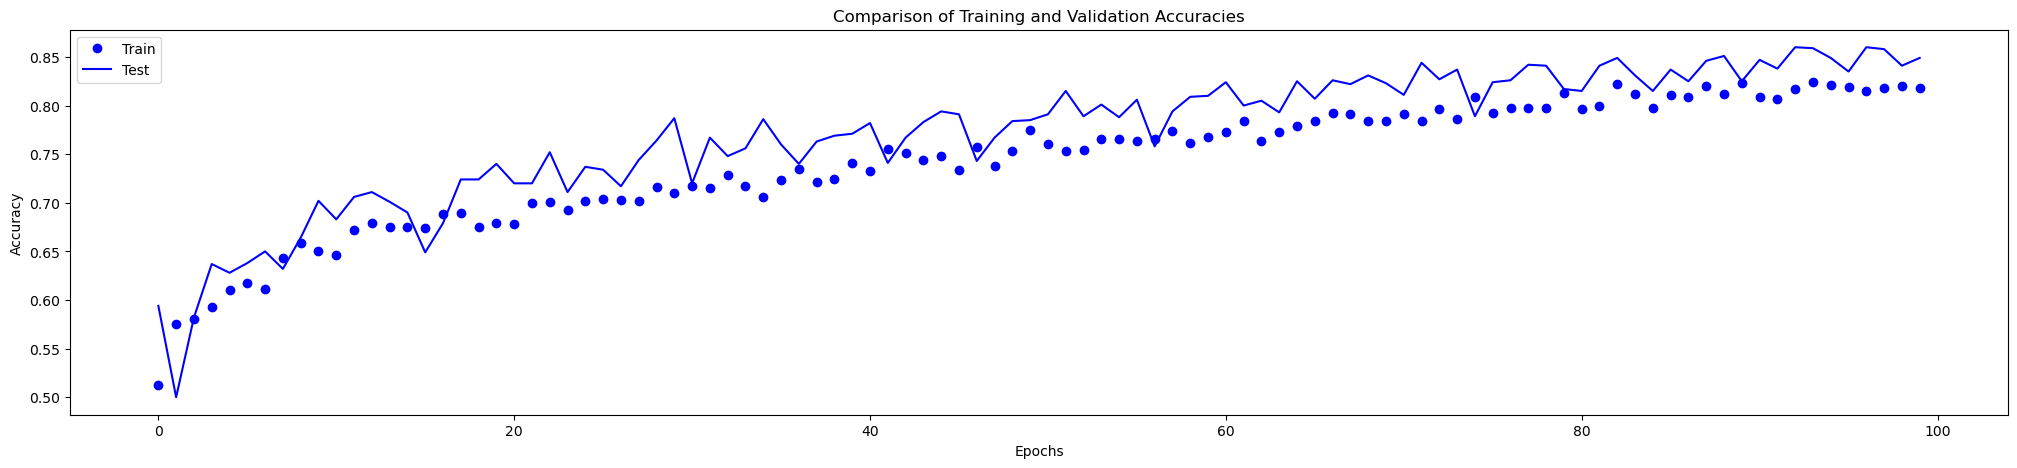

<Figure size 640x480 with 0 Axes>

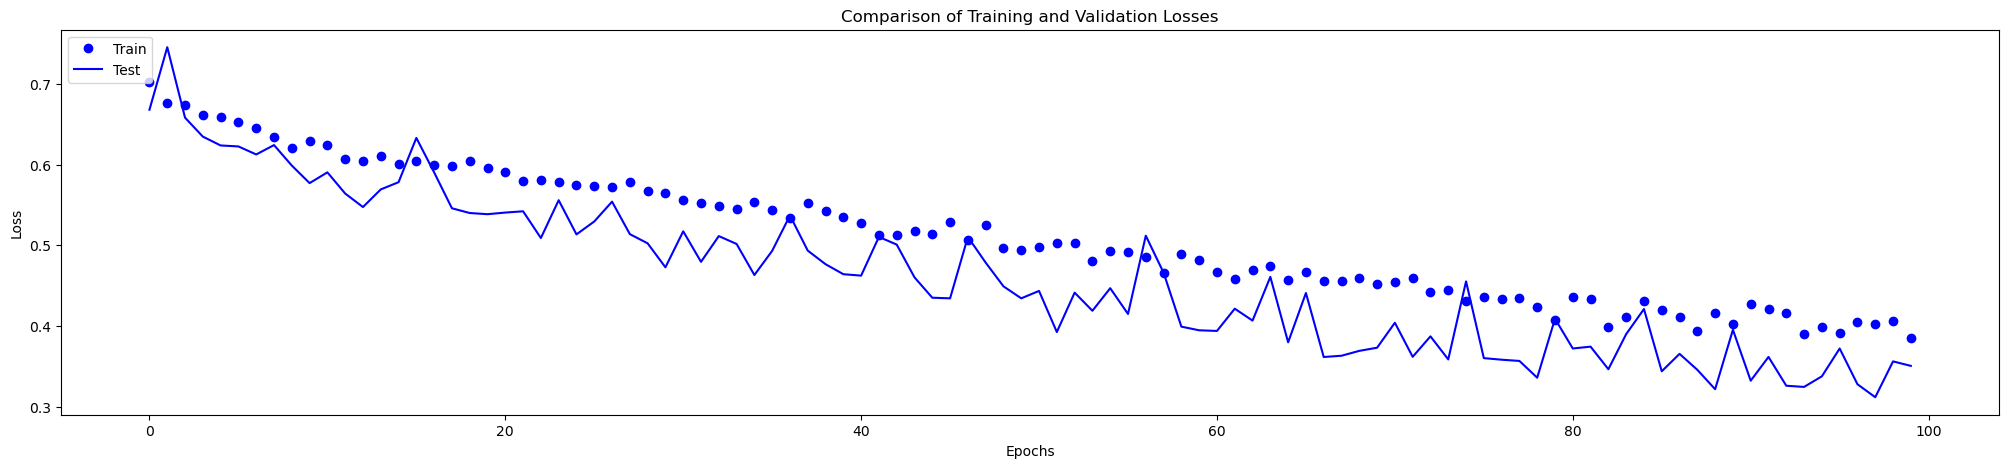

In [28]:
acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

models_acc.append(acc7)
models_val_acc.append(val_acc7)
models_loss.append(loss7)
models_val_loss.append(val_loss7)

PlotAccuracyComparison(acc7, val_acc7, lab = 'Model 7')
PlotLossComparison(loss7, val_loss7, lab = 'Model 7')

Porównanie modelu 3 z modelem 7:

accs len: 100
epochs: range(0, 100)


<Figure size 640x480 with 0 Axes>

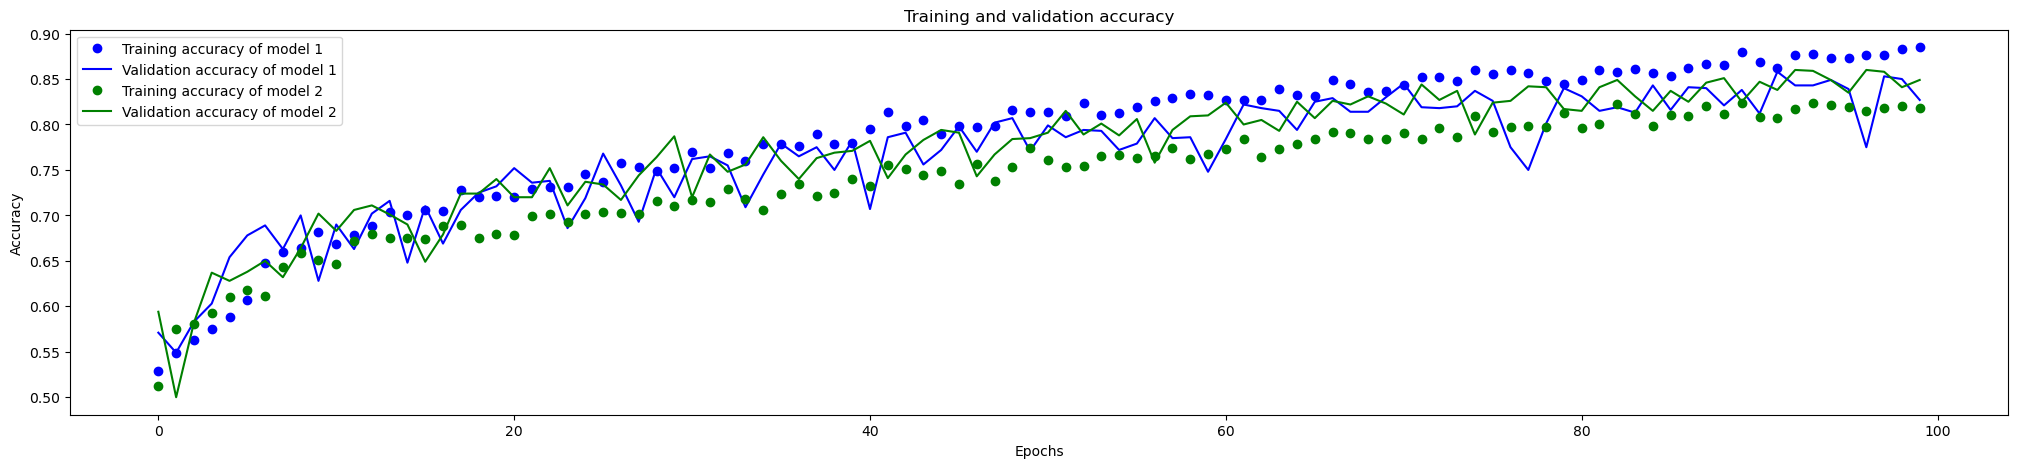

<Figure size 640x480 with 0 Axes>

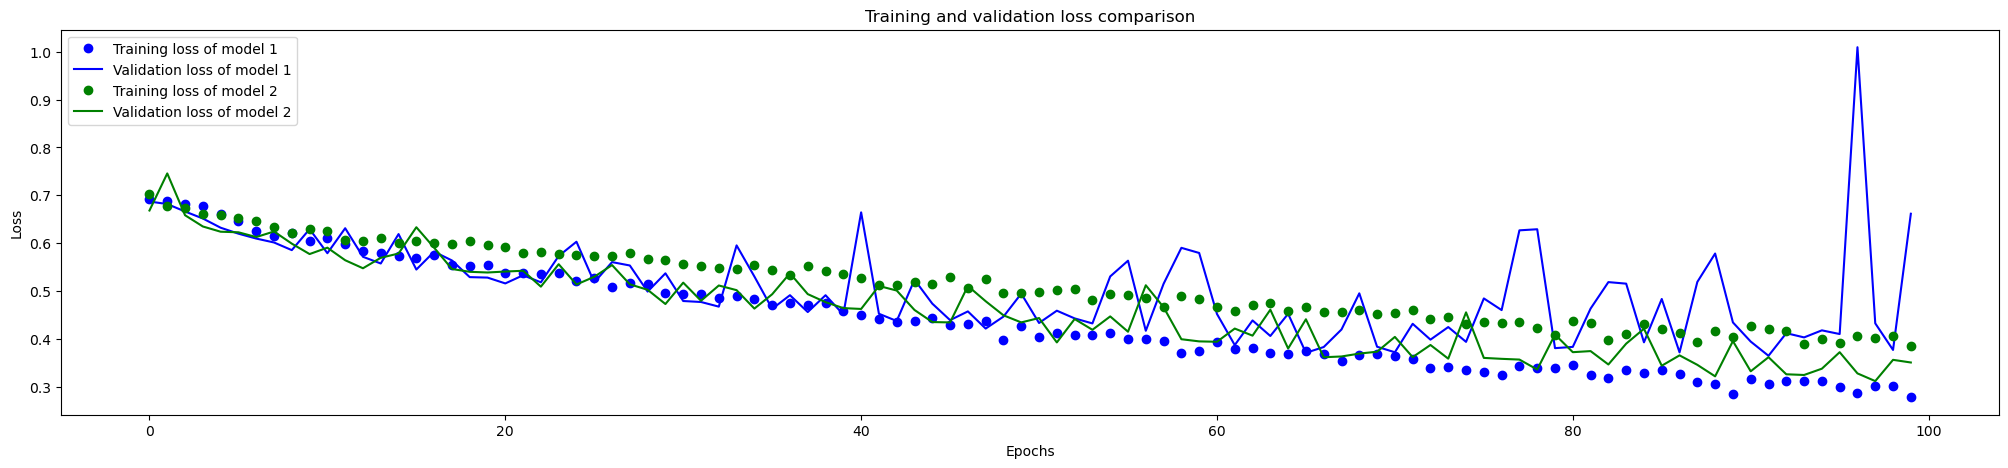

In [29]:
# Model na wykresie -> Faktyczny numer modelu
# Model 1 -> Model 3
# Model 2 -> Model 7
PlotMultipleAccuracyComparison([models_acc[x] for x in [2,6]], [models_val_acc[x] for x in [2,6]], 100)
PlotMultipleLossComparison([models_loss[x] for x in [2,6]], [models_val_loss[x] for x in [2,6]], 100)

W porównaniu do modelu 3, model 7 nie posiada aż tylu fluktuacji - wahania (szczególnie dla `loss`) są znacznie mniejsze. Spadła delikatnie dokładność na zbiorze testowym oraz wzrósł loss, chociaż dla zbioru walidacyjnego wyniki są bardzo podobne - jedyną różnicą w tych modelach jest funkcja aktywacji, więc to ona spowodowała rozbieżność wyników. Model 3 wyposażony jest w `ReLU`, a model 7 w `tanh`. 

## Model 8
#### Podobnie jak w poprzednim modelu architektura sieci jest podobna do modelu 3, lecz w tym przypadku co druga warstwa `MaxPooling2D` została usunięta, a te które pozostały zostały podwojone.

In [47]:
model8 = models.Sequential()
model8.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.Conv2D(256, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Conv2D(512, (3, 3), activation='relu'))
model8.add(layers.Conv2D(256, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Flatten())
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(256, activation='relu'))
model8.add(layers.Dense(1, activation='sigmoid'))

model8.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [54]:
model8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 35, 35, 128)       73856     
                                                                 
 conv2d_48 (Conv2D)          (None, 33, 33, 256)       295168    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 17, 17, 256)    

In [48]:
history8 = model8.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 152ms/step - loss: 0.6945 - acc: 0.5035 - val_loss: 0.6888 - val_acc: 0.5050
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6918 - acc: 0.5350 - val_loss: 0.6872 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6827 - acc: 0.5610 - val_loss: 0.6730 - val_acc: 0.5440
Epoch 4/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6765 - acc: 0.5805 - val_loss: 0.6518 - val_acc: 0.5990
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6611 - acc: 0.5970 - val_loss: 0.6493 - val_acc: 0.5940
Epoch 6/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6499 - acc: 0.6105 - val_loss: 0.6185 - val_acc: 0.6570
Epoch 7/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6394 - acc: 0.6320 - val_loss: 0.6033 - val_acc: 0.6660
Epoch 8/100
100/100 [===========================

In [49]:
model8.save(models_dir + 'cats_and_dogs_small_8.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

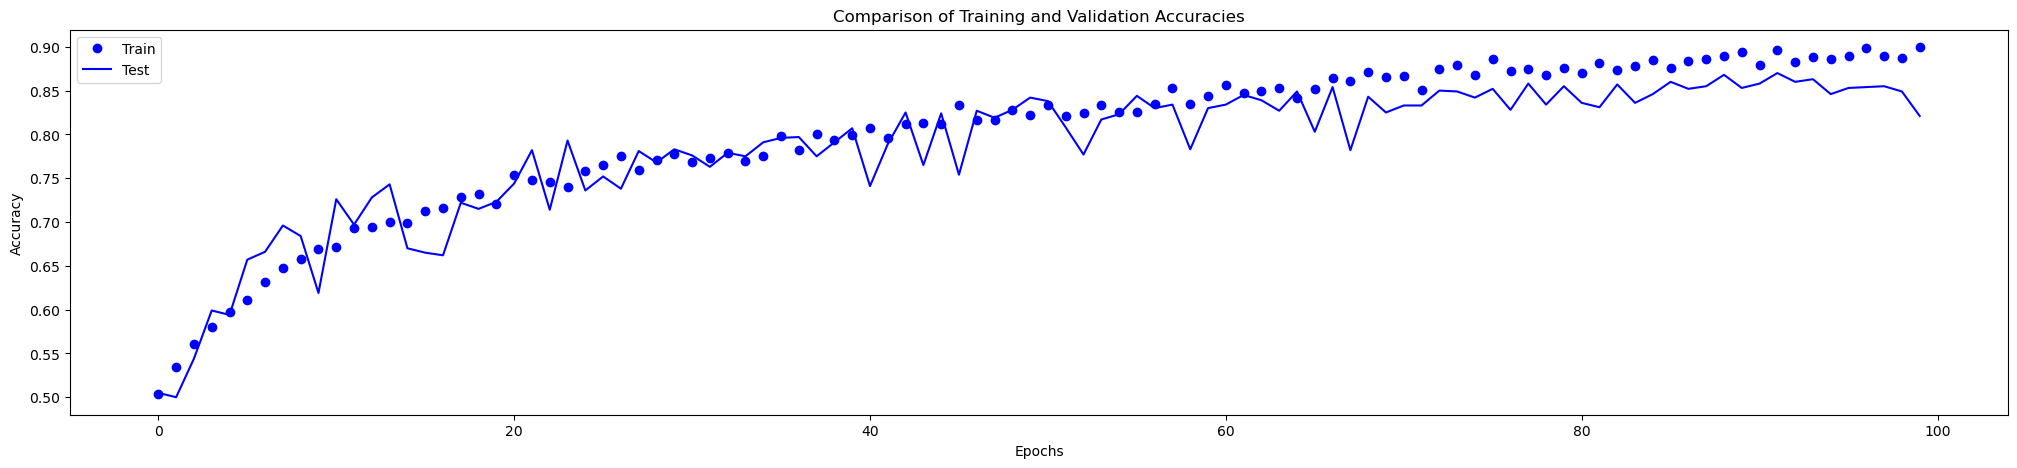

<Figure size 640x480 with 0 Axes>

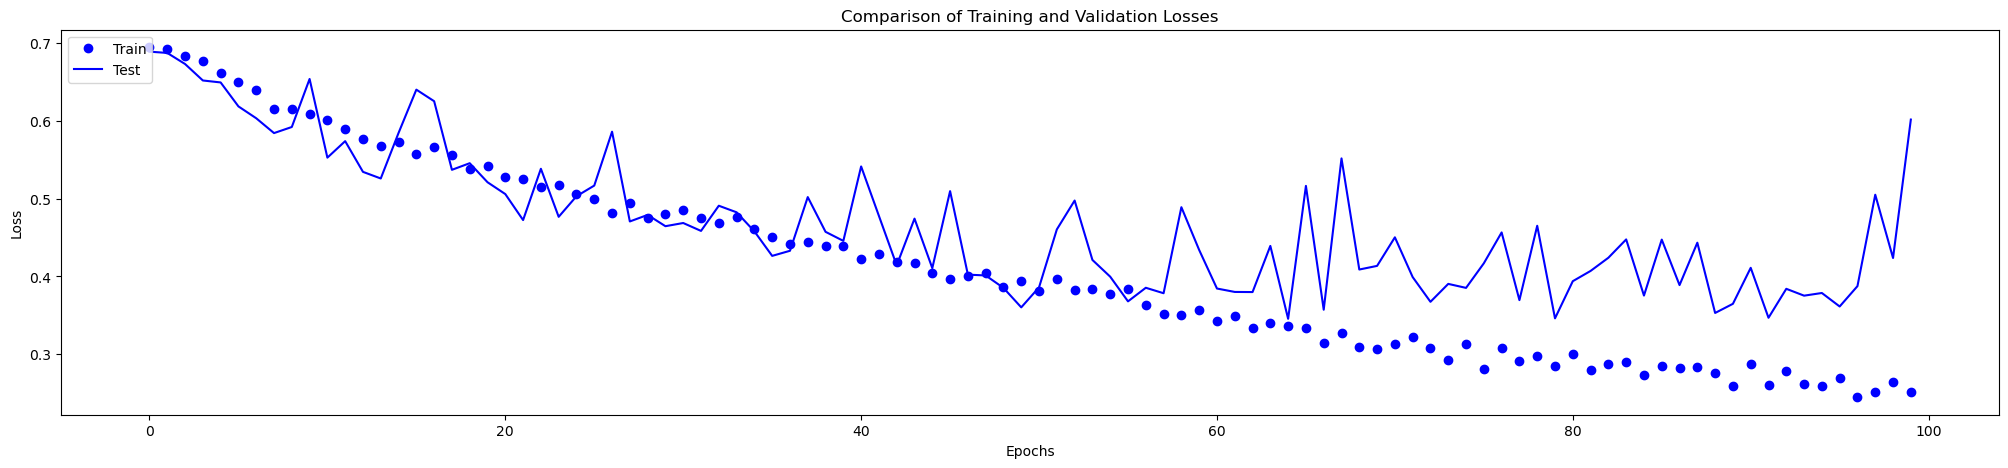

In [50]:
acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

models_acc.append(acc8)
models_val_acc.append(val_acc8)
models_loss.append(loss8)
models_val_loss.append(val_loss8)

PlotAccuracyComparison(acc8, val_acc8, lab = 'Model 8')
PlotLossComparison(loss8, val_loss8, lab = 'Model 8')

`Accuracy` wygląda całkiem dobrze - niestety w przypadku `loss` wartość na zbiorze walidacyjnym oraz testowym rozbiegają się od około 60. epoki.

Porównanie modelu 3 z modelem 8:

accs len: 100
epochs: range(0, 100)


<Figure size 640x480 with 0 Axes>

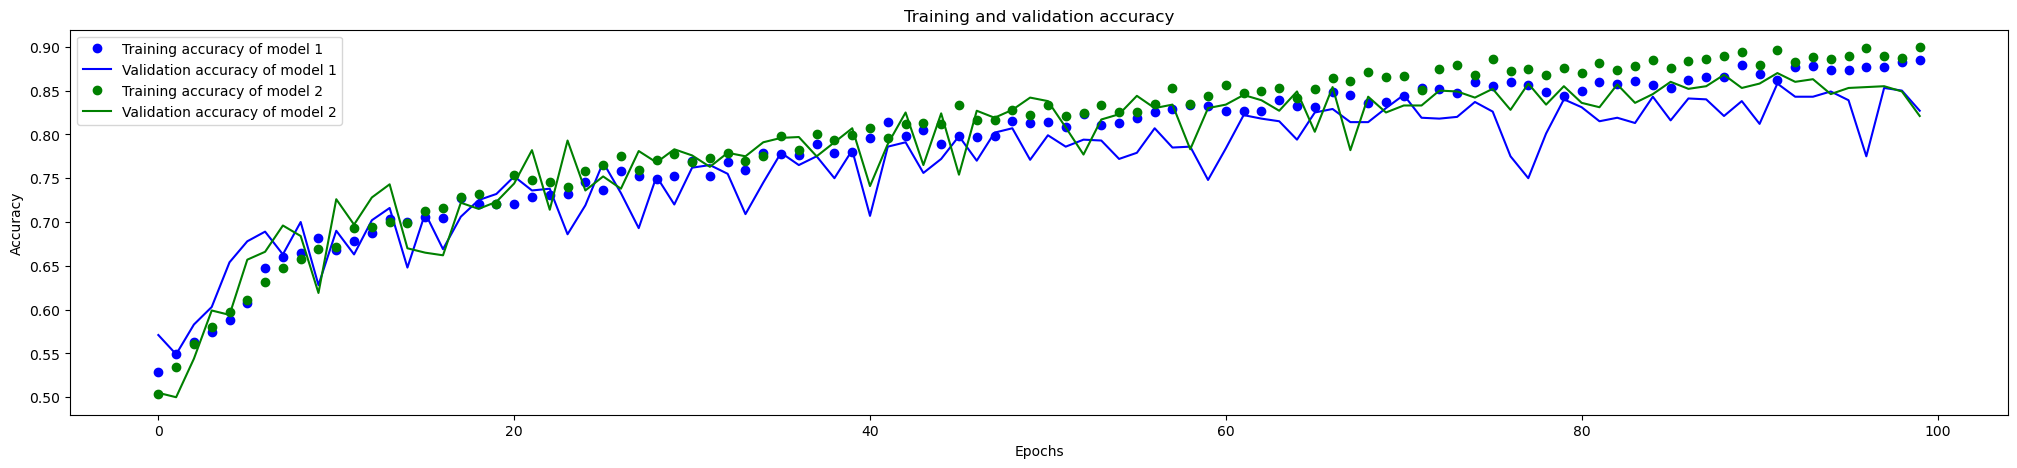

<Figure size 640x480 with 0 Axes>

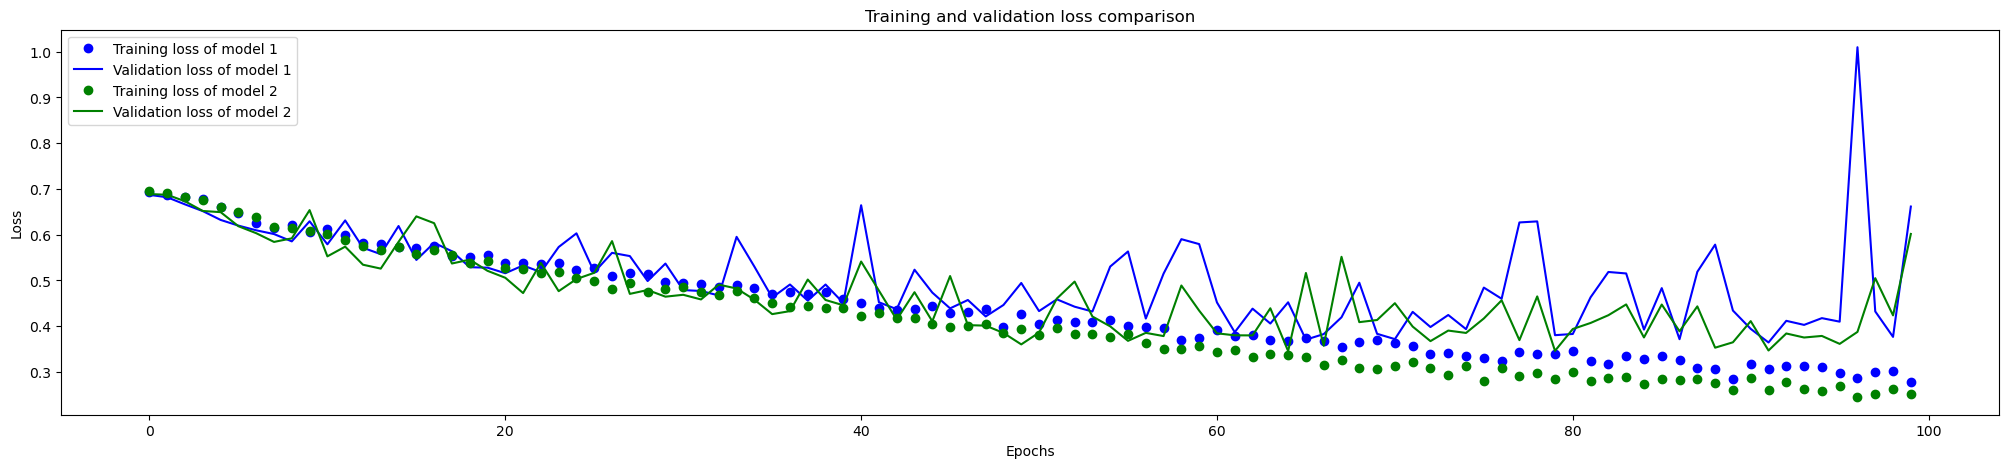

In [52]:
# Model na wykresie -> Faktyczny numer modelu
# Model 1 -> Model 3
# Model 2 -> Model 8
PlotMultipleAccuracyComparison([models_acc[x] for x in [2,8]], [models_val_acc[x] for x in [2,8]], 100)
PlotMultipleLossComparison([models_loss[x] for x in [2,8]], [models_val_loss[x] for x in [2,8]], 100)

Model 8 delikatnie się poprawił względem modelu 3 jeśli spojrzymy zarówno na `accuracy` jak i `loss`. Dokładność na zbiorze walidacyjnym fluktuuje mniej niż na modelu 3, podobna sytuacja występuje przy stracie. Później sprawdzone zostanie, który model lepiej radzi sobie przy większej ilości danych.

## Model 9
#### Podobnie jak w poprzednim modelu architektura sieci jest podobna do modelu 3, lecz w tym przypadku zamieniono warstwy `MaxPooling2D` na `AvgPooling2D`.

In [34]:
model9 = models.Sequential()
model9.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model9.add(layers.AveragePooling2D((2, 2)))
model9.add(layers.Conv2D(128, (3, 3), activation='relu'))
model9.add(layers.AveragePooling2D((2, 2)))
model9.add(layers.Conv2D(256, (3, 3), activation='relu'))
model9.add(layers.AveragePooling2D((2, 2)))
model9.add(layers.Conv2D(512, (3, 3), activation='relu'))
model9.add(layers.AveragePooling2D((2, 2)))
model9.add(layers.Conv2D(256, (3, 3), activation='relu'))
model9.add(layers.AveragePooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dropout(0.5))
model9.add(layers.Dense(256, activation='relu'))
model9.add(layers.Dense(1, activation='sigmoid'))

model9.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [55]:
model9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 74, 74, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 36, 36, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 17, 17, 256)     

In [35]:
history9 = model9.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 151ms/step - loss: 0.6945 - acc: 0.5030 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6924 - acc: 0.5255 - val_loss: 0.6943 - val_acc: 0.5130
Epoch 3/100
100/100 [==============================] - 14s 144ms/step - loss: 0.6879 - acc: 0.5560 - val_loss: 0.6816 - val_acc: 0.5430
Epoch 4/100
100/100 [==============================] - 14s 144ms/step - loss: 0.6789 - acc: 0.5635 - val_loss: 0.7232 - val_acc: 0.5160
Epoch 5/100
100/100 [==============================] - 15s 145ms/step - loss: 0.6733 - acc: 0.5730 - val_loss: 0.6582 - val_acc: 0.6470
Epoch 6/100
100/100 [==============================] - 15s 146ms/step - loss: 0.6583 - acc: 0.6135 - val_loss: 0.6411 - val_acc: 0.6290
Epoch 7/100
100/100 [==============================] - 15s 145ms/step - loss: 0.6475 - acc: 0.6220 - val_loss: 0.6306 - val_acc: 0.6510
Epoch 8/100
100/100 [===========================

In [36]:
model9.save(models_dir + 'cats_and_dogs_small_9.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

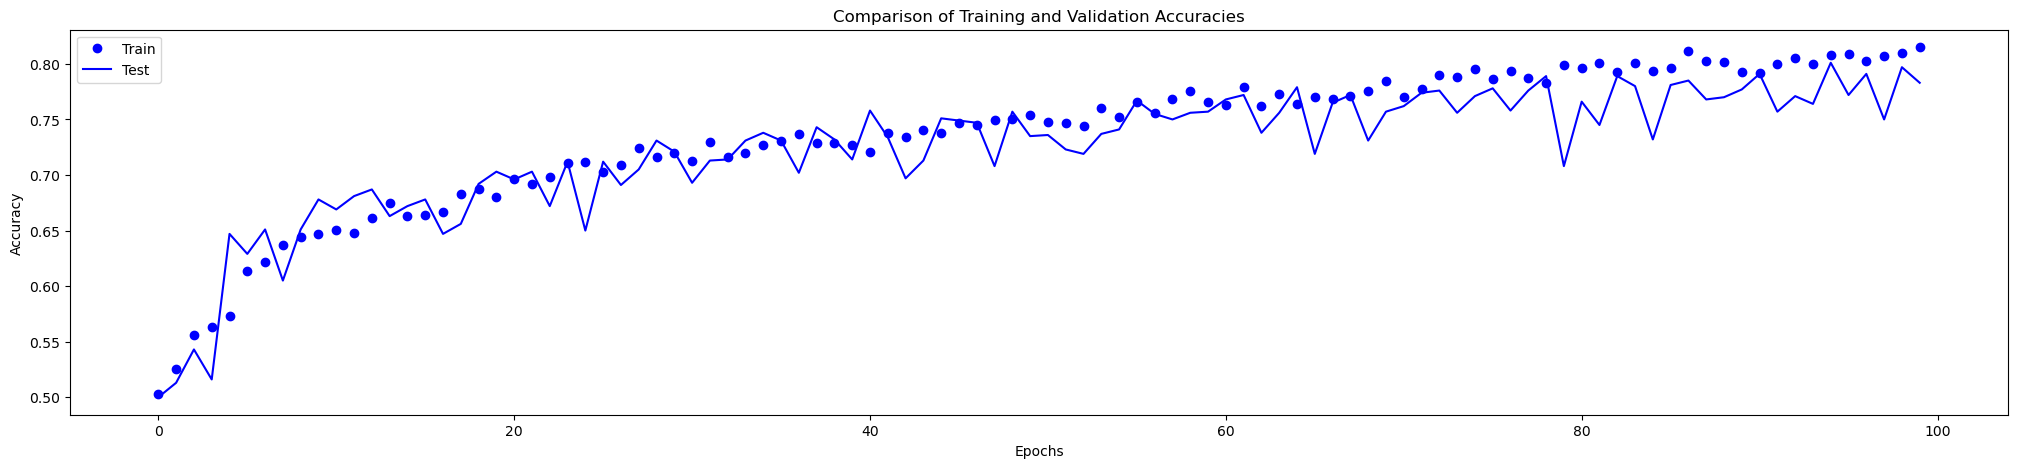

<Figure size 640x480 with 0 Axes>

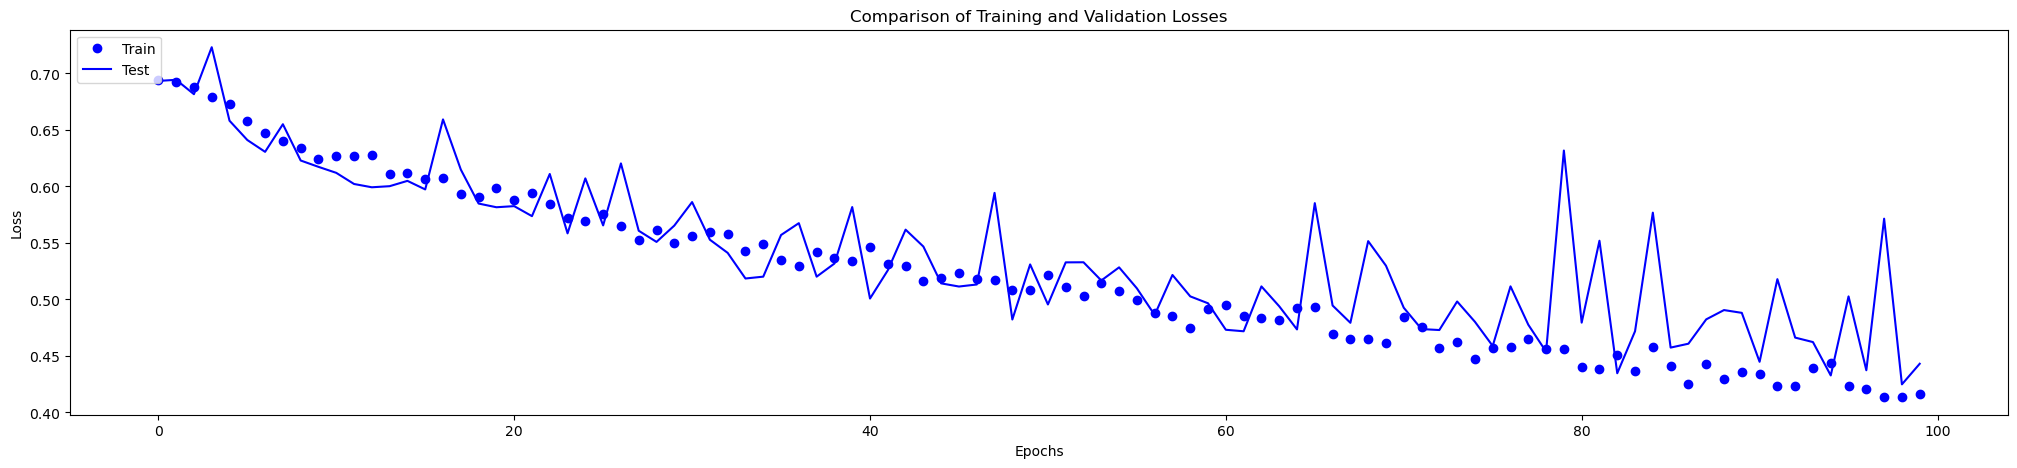

In [37]:
acc9 = history9.history['acc']
val_acc9 = history9.history['val_acc']
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']

models_acc.append(acc9)
models_val_acc.append(val_acc9)
models_loss.append(loss9)
models_val_loss.append(val_loss9)

PlotAccuracyComparison(acc9, val_acc9, lab = 'Model 9')
PlotLossComparison(loss9, val_loss9, lab = 'Model 9')

Porównanie modelu 3 z modelem 9:

accs len: 100
epochs: range(0, 100)


<Figure size 640x480 with 0 Axes>

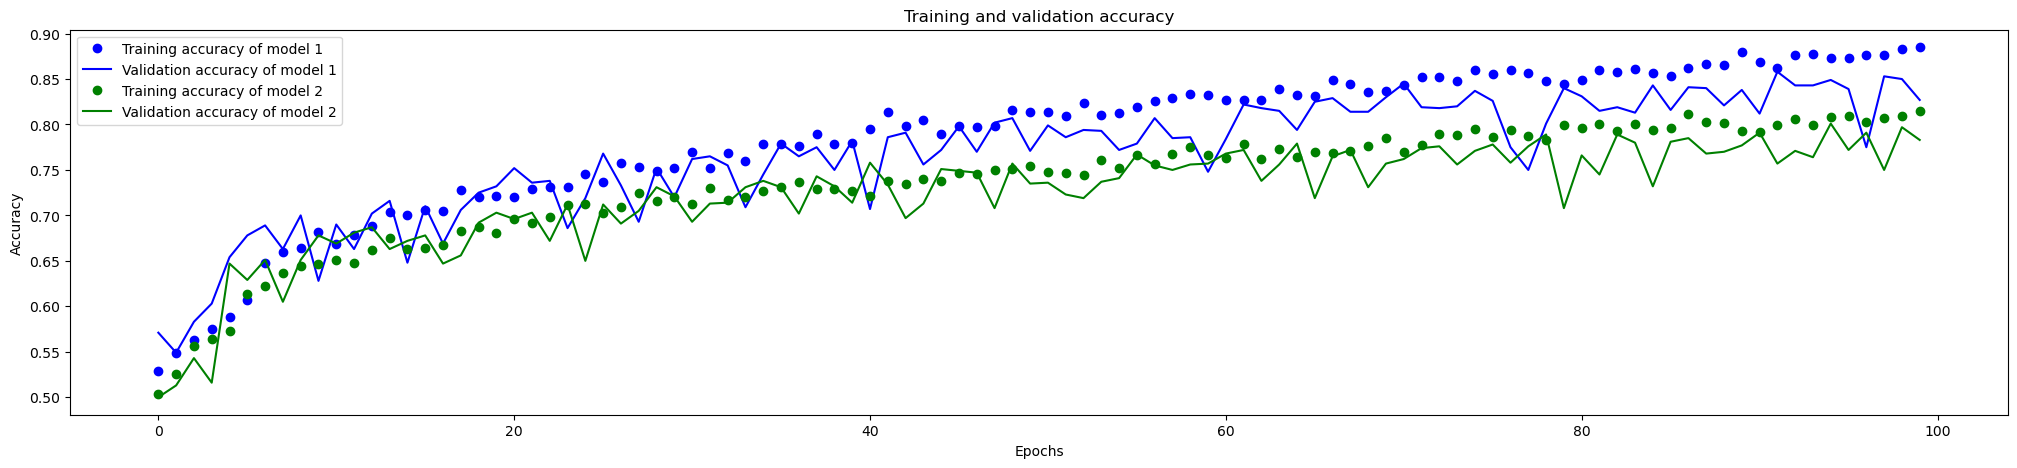

<Figure size 640x480 with 0 Axes>

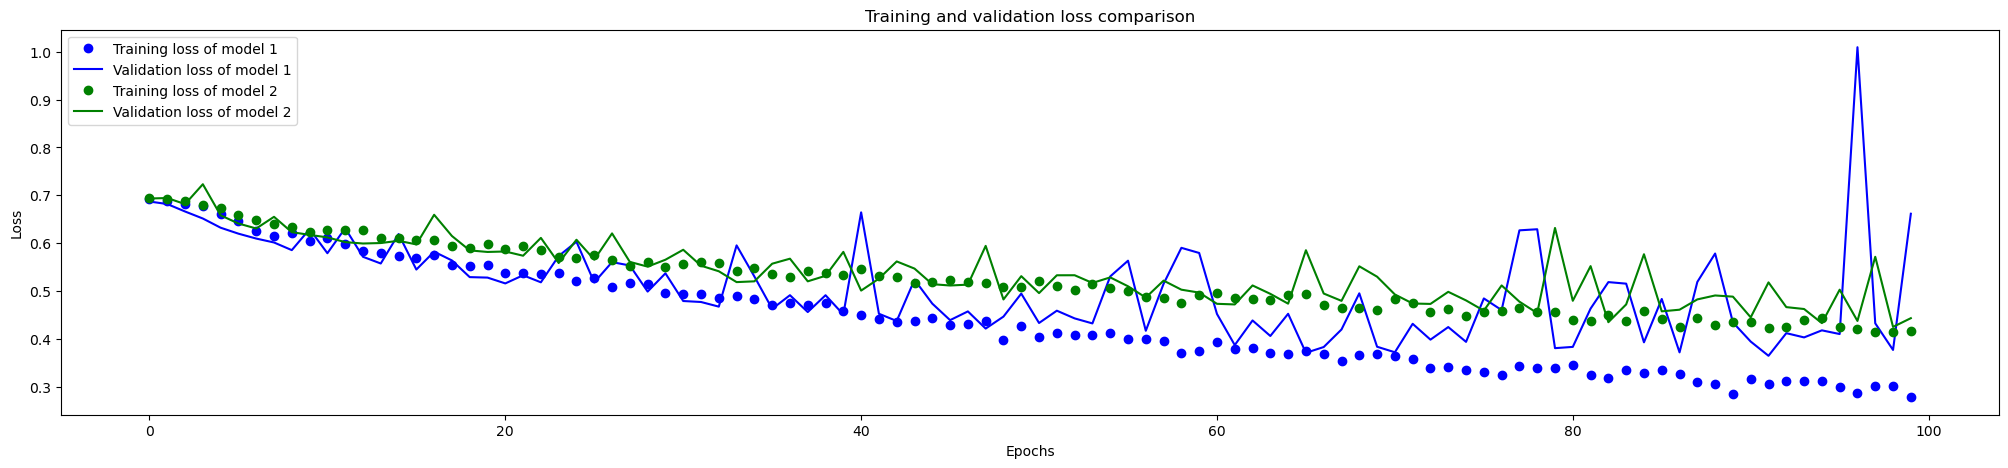

In [39]:
# Model na wykresie -> Faktyczny numer modelu
# Model 1 -> Model 3
# Model 2 -> Model 9
PlotMultipleAccuracyComparison([models_acc[x] for x in [2,7]], [models_val_acc[x] for x in [2,7]], 100)
PlotMultipleLossComparison([models_loss[x] for x in [2,7]], [models_val_loss[x] for x in [2,7]], 100)

#### Zmiana z `MaxPooling2D` na `AvgPooling2D` pogarsza nieco dokładność zarówno walidacyjną jak i treningową. Loss wzrósł, lecz ograniczyło to występujące wahania w przypadku pierwotnego modelu. Nadal model 3 daje lepsze rezultaty.

# Nauczanie modelów na większej ilości danych

### 8000 obrazów zbiór uczący, 4000 zbiór walidacyjny, 4000 zbiór testowy <br> W każdym secie 50% psy, 50% koty. Uczenie przez 200 epok.


#### Model 3

In [9]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(512, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [10]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 256)     

#### Prepare data for big training

In [16]:
# The path to store trained models
models_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\models' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\dataset\train\train'

# The directory where we will store our smaller dataset
base_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\cats_and_dogs_medium'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 4000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 2000 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(4000, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 4000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(4000, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
img_rows = 150
img_cols = 150

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_rows, img_cols),
        batch_size=20, #32
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [21]:
history3 = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/200
100/100 [==============================] - 27s 271ms/step - loss: 0.6655 - acc: 0.6195 - val_loss: 0.6721 - val_acc: 0.5930
Epoch 2/200
100/100 [==============================] - 30s 299ms/step - loss: 0.6676 - acc: 0.5970 - val_loss: 0.6519 - val_acc: 0.6070
Epoch 3/200
100/100 [==============================] - 29s 291ms/step - loss: 0.6585 - acc: 0.6090 - val_loss: 0.6818 - val_acc: 0.5700
Epoch 4/200
100/100 [==============================] - 24s 237ms/step - loss: 0.6402 - acc: 0.6305 - val_loss: 0.6377 - val_acc: 0.6470
Epoch 5/200
100/100 [==============================] - 22s 224ms/step - loss: 0.6417 - acc: 0.6335 - val_loss: 0.6471 - val_acc: 0.5930
Epoch 6/200
100/100 [==============================] - 22s 218ms/step - loss: 0.6424 - acc: 0.6335 - val_loss: 0.5999 - val_acc: 0.6730
Epoch 7/200
100/100 [==============================] - 23s 230ms/step - loss: 0.6290 - acc: 0.6420 - val_loss: 0.5884 - val_acc: 0.7150
Epoch 8/200
100/100 [===========================

Zapiszmy nasz model 2, ponieważ będziemy go później używać.

In [22]:
model3.save(models_dir + 'cats_and_dogs_medium_3.h5')

In [82]:
from sklearn.metrics import confusion_matrix

predicted = model3.predict(test_data)
predicted = list(map(lambda x: x >= 0.5, predicted))
confusion_matrix(test_targets, predicted)

2/2 [==============================] - 0s 5ms/step


array([[41,  0],
       [ 0, 16]])

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

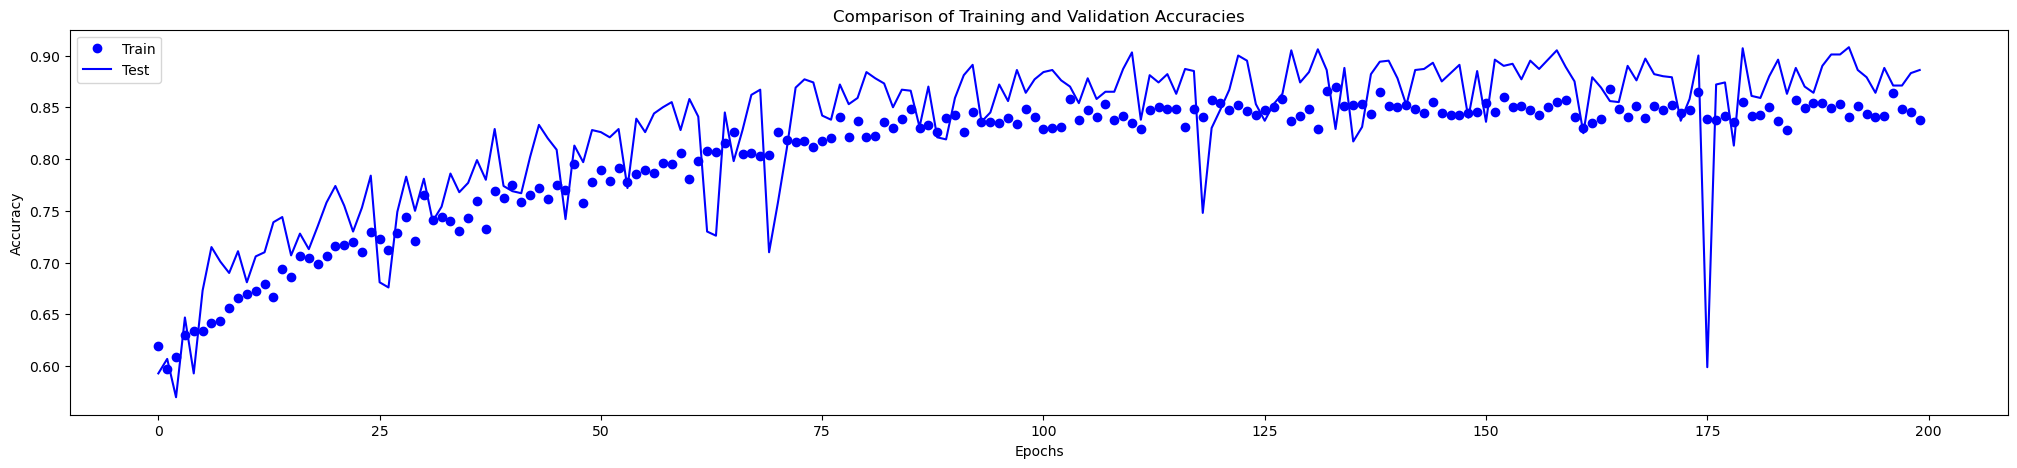

<Figure size 640x480 with 0 Axes>

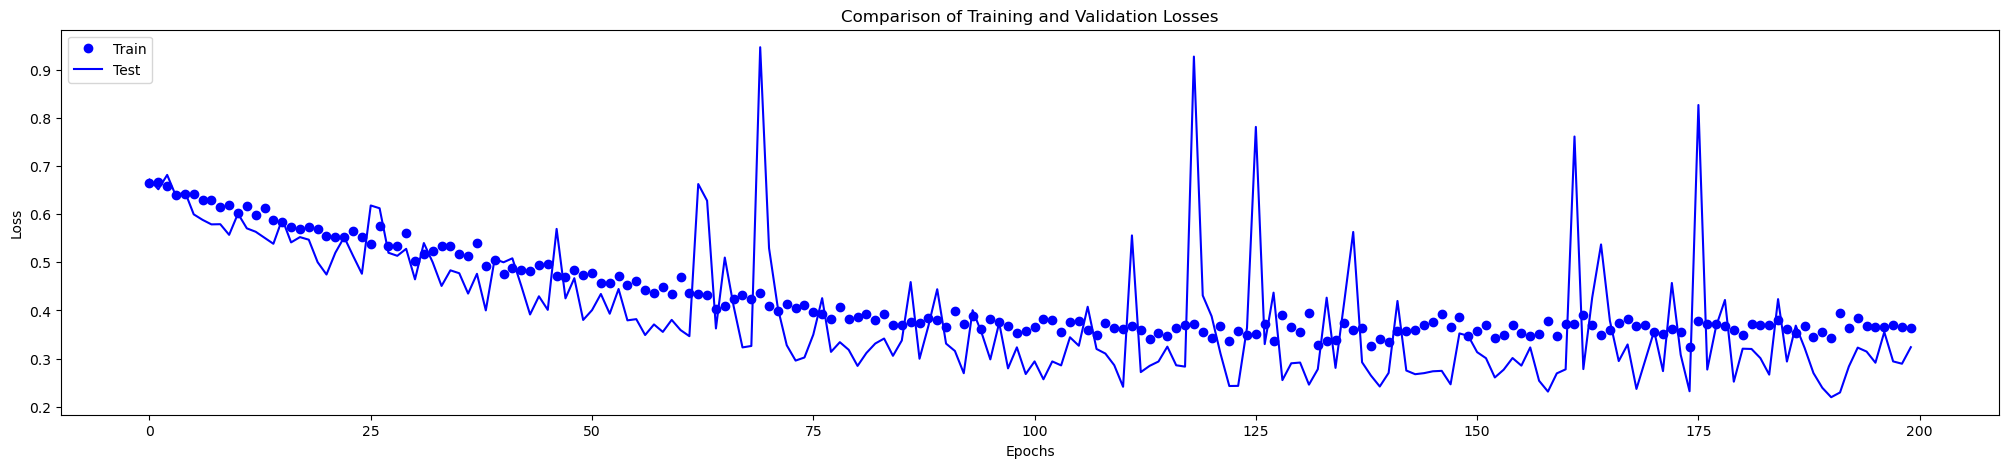

In [25]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

models_acc.append(acc3)
models_val_acc.append(val_acc3)
models_loss.append(loss3)
models_val_loss.append(val_loss3)

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

### 17000 obrazów zbiór uczący, 2000 zbiór walidacyjny, 2000 zbiór testowy

#### Model 3

In [42]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(512, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Przyjrzyjmy się, jak map cech obiektów zmieniają się z każdą kolejną warstwą:

In [43]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 256)     

#### Prepare data for big training

In [13]:
# The path to store trained models
models_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\models' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\dataset\train\train'

# The directory where we will store our smaller dataset
base_dir = r'C:\Users\kuba2\Desktop\notebooks\neural_networks\lab02\cats_and_dogs_big'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 8500 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 2000 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8500, 10500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10500, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 8500 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8500, 10500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 2000 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10500, 12499)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
img_rows = 150
img_cols = 150

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_rows, img_cols),
        batch_size=100, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_rows, img_cols),
        batch_size=100, #32
        class_mode='binary')

Found 17000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [47]:
history3 = model3.fit(
      train_generator,
      steps_per_epoch=170,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=45)

Epoch 1/200
170/170 [==============================] - 211s 1s/step - loss: 0.6873 - acc: 0.5374 - val_loss: 0.7364 - val_acc: 0.4604
Epoch 2/200
170/170 [==============================] - 134s 788ms/step - loss: 0.6637 - acc: 0.6009 - val_loss: 0.6236 - val_acc: 0.6642
Epoch 3/200
170/170 [==============================] - 137s 807ms/step - loss: 0.6375 - acc: 0.6351 - val_loss: 0.5816 - val_acc: 0.7171
Epoch 4/200
170/170 [==============================] - 120s 706ms/step - loss: 0.6174 - acc: 0.6627 - val_loss: 0.5721 - val_acc: 0.7073
Epoch 5/200
170/170 [==============================] - 110s 646ms/step - loss: 0.5957 - acc: 0.6823 - val_loss: 0.5176 - val_acc: 0.7540
Epoch 6/200
170/170 [==============================] - 111s 650ms/step - loss: 0.5752 - acc: 0.6996 - val_loss: 0.5068 - val_acc: 0.7684
Epoch 7/200
170/170 [==============================] - 110s 645ms/step - loss: 0.5659 - acc: 0.7035 - val_loss: 0.5376 - val_acc: 0.7284
Epoch 8/200
170/170 [=======================

In [48]:
model3.save(models_dir + 'cats_and_dogs_big_3.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

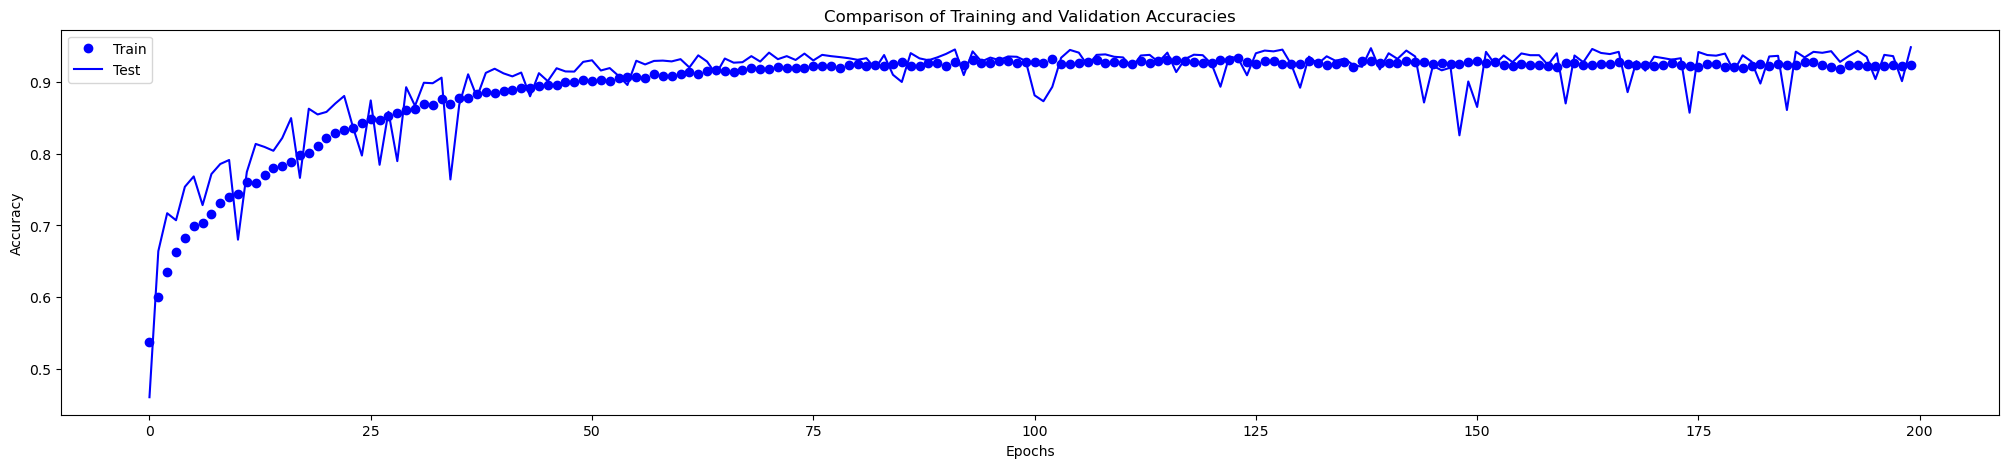

<Figure size 640x480 with 0 Axes>

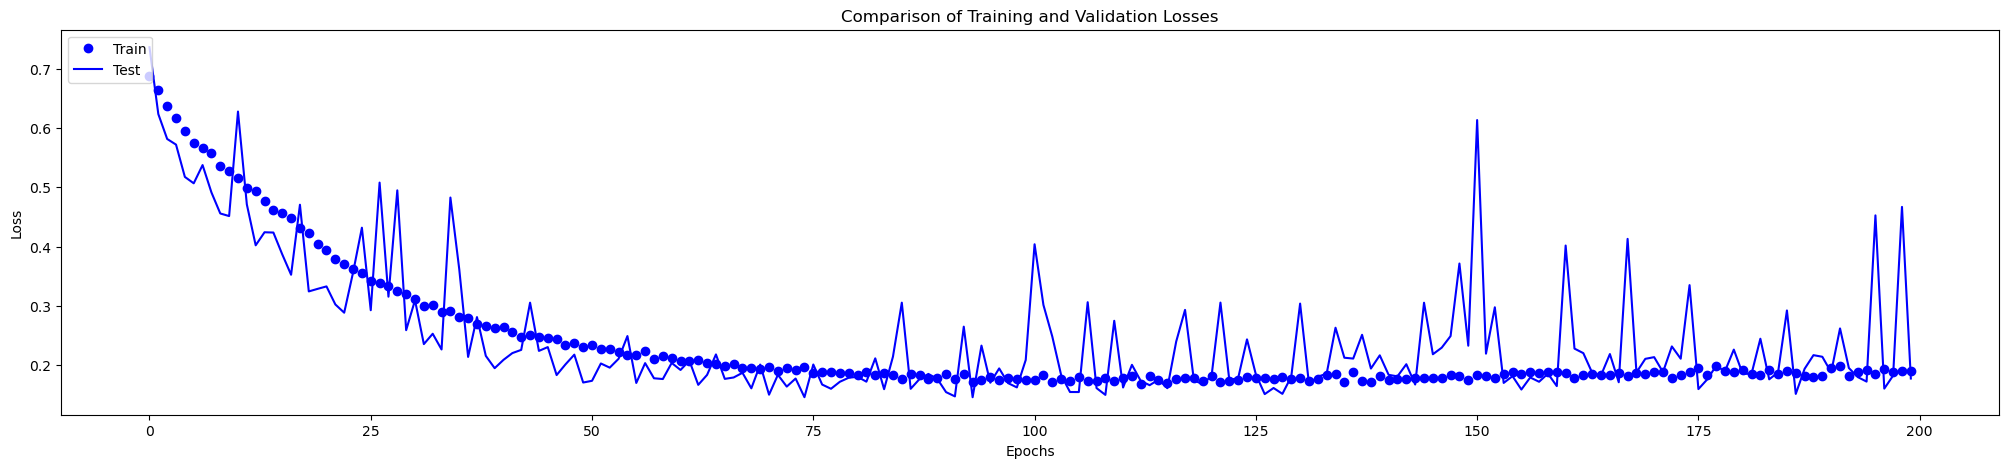

In [ ]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

models_acc.append(acc3)
models_val_acc.append(val_acc3)
models_loss.append(loss3)
models_val_loss.append(val_loss3)

# save results to pickle
save_object_as_pickle(acc3, 'model_acc__3_big.pkl')
save_object_as_pickle(val_acc3, 'model_val_acc__3_big.pkl')
save_object_as_pickle(loss3, 'model_loss__3_big.pkl')
save_object_as_pickle(val_loss3, 'model_val_acc__3_big.pkl')

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3 - big dataset')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3 - big dataset')

### Rezultaty otrzymane przy uczeniu na większej ilości danych znacznie poprawiają wyniki otrzymane przez sieć. <br> Model 3 uczony na 4000 zdjęć (2 tyś. zbiór treningowy, po 1 tyś. walidacyjny i testowy) przyniósł `accuracy` na poziomie 84% oraz `loss` w okolicach `0.4`, natomiast przy uczeniu na całym datasecie `accuracy` wyniosło ~93/94% oraz `loss` wahał się w okolicach `0.2`.
### Od 100. epoki wartości `accuracy/val_accuracy` praktycznie się nie zmieniają (oscylują wokół tego samego przedziału), natomiast dla `validation loss` widać że co kilka epok napotykane są nagłe wzrosty. W zasadzie uczenie sieci można zakończyć już na 100. epoce.  

# Model 8 
Model 8 jest to w praktyce model o architekturze modelu 3 z róznicą w rozłożeniu warstw `MaxPooling2D`.

In [12]:
model8 = models.Sequential()
model8.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))
model8.add(layers.Conv2D(256, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Conv2D(512, (3, 3), activation='relu'))
model8.add(layers.Conv2D(256, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.MaxPooling2D((2, 2), padding='same'))
model8.add(layers.Flatten())
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(256, activation='relu'))
model8.add(layers.Dense(1, activation='sigmoid'))

model8.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

W poprzednim modelu uczenie prowadzone było przez 200 epok, co okazało się zbyt dużą ilością w związku z bardzo małymi zmianami po setnej epoce. Tym razem ograniczę uczenie do 125 epok (100 nadal może okazać się zbyt małą ilością, choć nie powinno ponieważ architektura jest bardzo podobna).

In [16]:
history8 = model8.fit(
      train_generator,
      steps_per_epoch=170,
      epochs=125,
      validation_data=validation_generator,
      validation_steps=45)

Epoch 1/125
170/170 [==============================] - 214s 1s/step - loss: 0.6821 - acc: 0.5526 - val_loss: 0.6461 - val_acc: 0.6233
Epoch 2/125
170/170 [==============================] - 132s 775ms/step - loss: 0.6494 - acc: 0.6154 - val_loss: 0.5840 - val_acc: 0.6989
Epoch 3/125
170/170 [==============================] - 140s 820ms/step - loss: 0.6187 - acc: 0.6517 - val_loss: 0.5705 - val_acc: 0.7096
Epoch 4/125
170/170 [==============================] - 128s 752ms/step - loss: 0.5978 - acc: 0.6726 - val_loss: 0.5402 - val_acc: 0.7384
Epoch 5/125
170/170 [==============================] - 124s 730ms/step - loss: 0.5801 - acc: 0.6888 - val_loss: 0.5346 - val_acc: 0.7398
Epoch 6/125
170/170 [==============================] - 126s 743ms/step - loss: 0.5607 - acc: 0.7086 - val_loss: 0.4835 - val_acc: 0.7722
Epoch 7/125
170/170 [==============================] - 116s 682ms/step - loss: 0.5427 - acc: 0.7207 - val_loss: 0.4785 - val_acc: 0.7764
Epoch 8/125
170/170 [=======================

In [17]:
model8.save(models_dir + 'cats_and_dogs_big_8.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

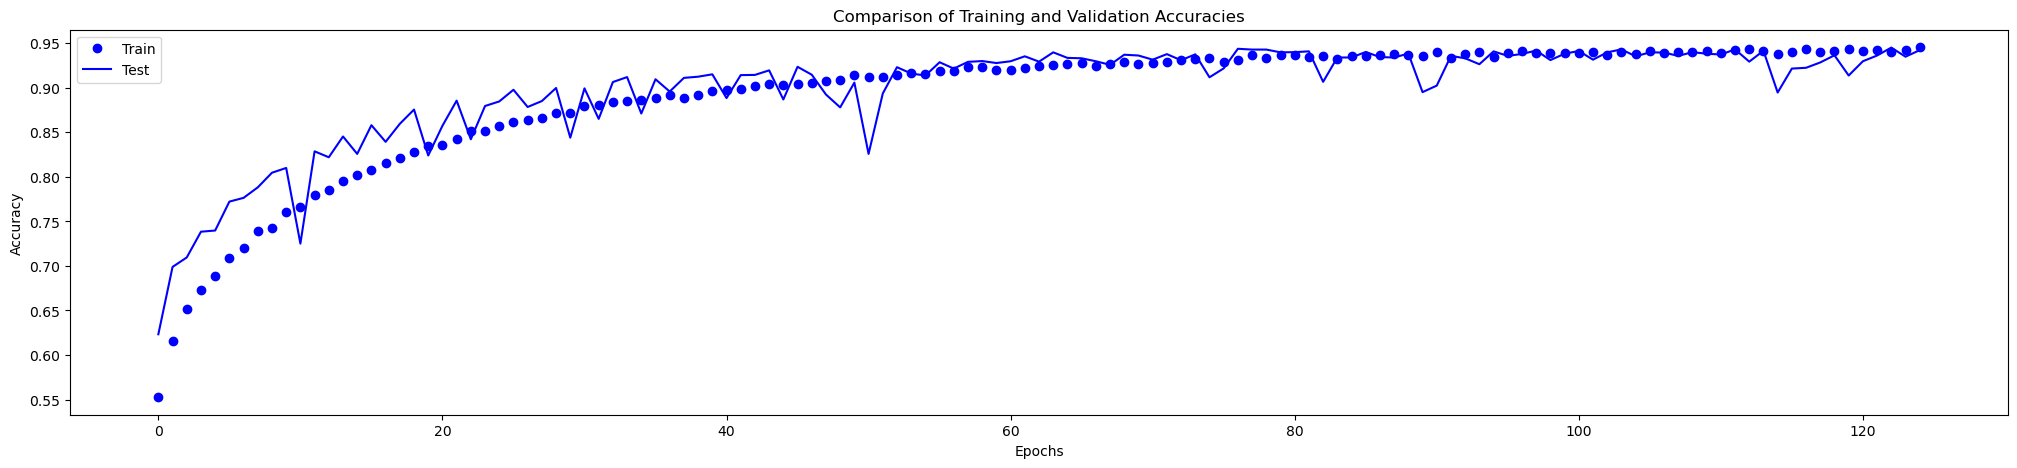

<Figure size 640x480 with 0 Axes>

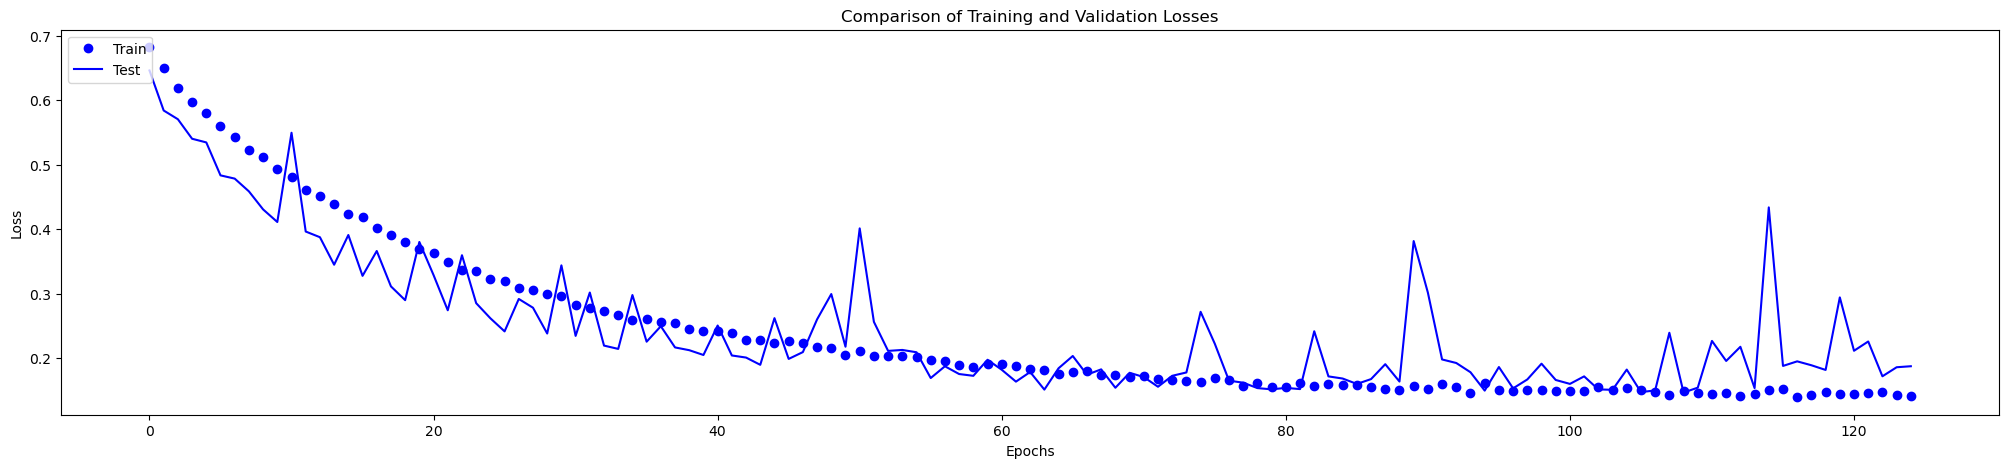

In [20]:
acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

models_acc.append(acc8)
models_val_acc.append(val_acc8)
models_loss.append(loss8)
models_val_loss.append(val_loss8)

# save results to pickle
save_object_as_pickle(acc8, 'model_acc__8_big.pkl')
save_object_as_pickle(val_acc8, 'model_val_acc__8_big.pkl')
save_object_as_pickle(loss8, 'model_loss__8_big.pkl')
save_object_as_pickle(val_loss8, 'model_val_loss__8_big.pkl') # fixed file name

PlotAccuracyComparison(acc8, val_acc8, lab = 'Model 8 - big dataset')
PlotLossComparison(loss8, val_loss8, lab = 'Model 8 - big dataset')

### Model 3

<Figure size 640x480 with 0 Axes>

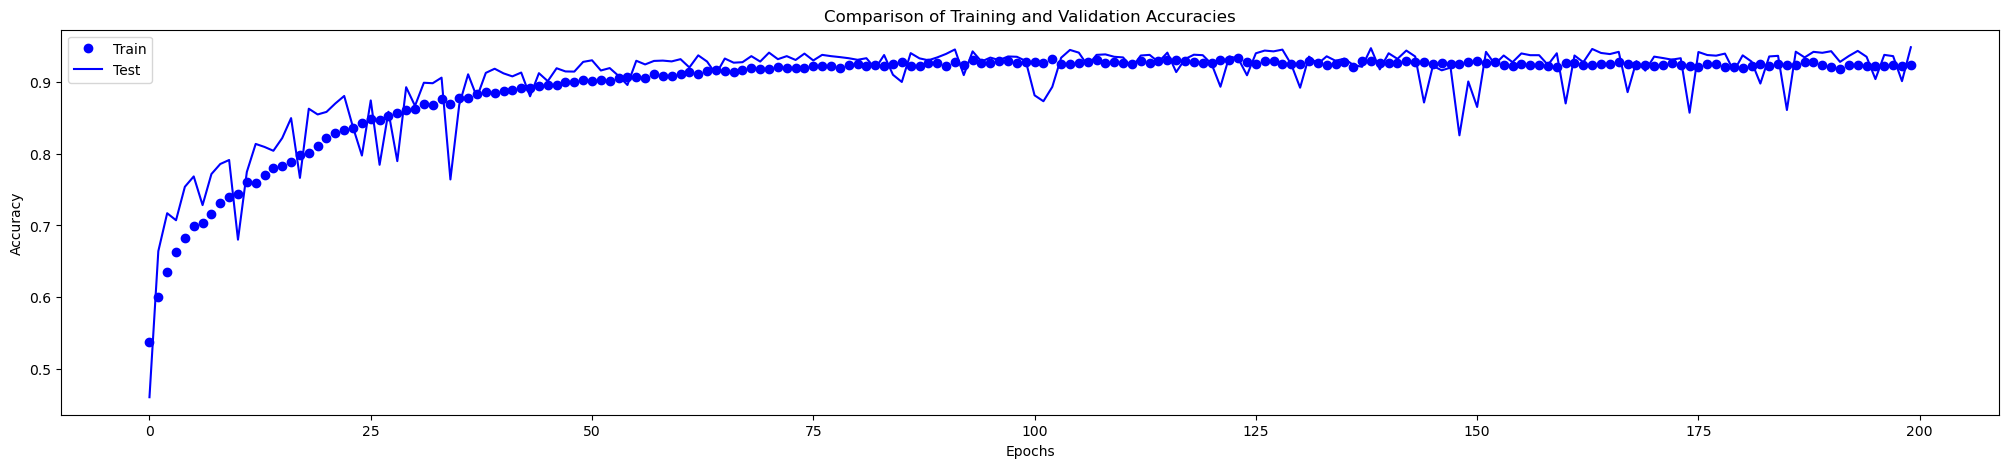

<Figure size 640x480 with 0 Axes>

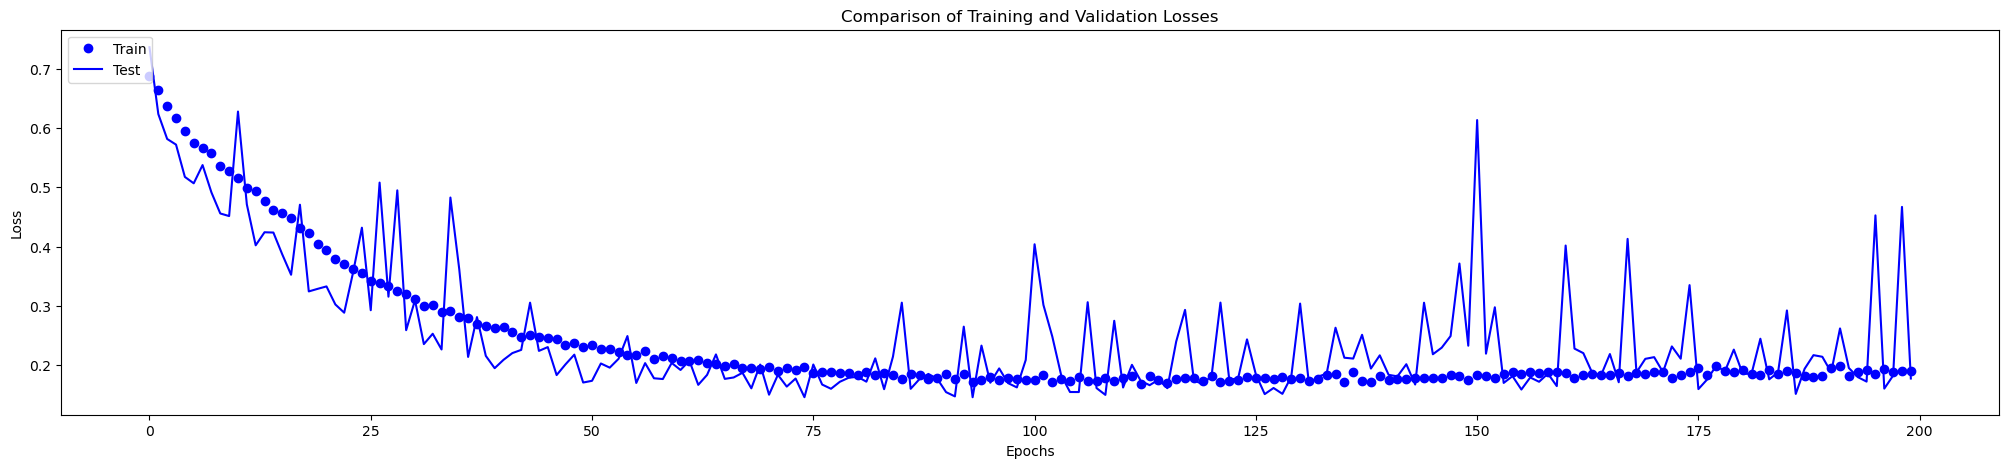

In [ ]:
PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3 - big dataset')
PlotLossComparison(loss3, val_loss3, lab = 'Model 3 - big dataset')

Porównanie modelu 3 i modelu 8 uczonego na większej ilości danych: 

In [54]:
max(val_acc8)

0.945111095905304

In [25]:
import pandas as pd

# load model 3 results
acc3 = pd.read_pickle('model_acc__3_big.pkl')
val_acc3 = pd.read_pickle('model_val_acc__3_big.pkl')
loss3 = pd.read_pickle('model_loss__3_big.pkl')
val_loss3 = pd.read_pickle('model_val_acc__3_big.pkl')

##### Niestety przez błąd do pliku nie została zapisana dokładność walidacyjna modelu 3, więc pozostaje porównanie na podstawie logów historii uzyskanej podczas procesu uczenia. 

### Model 3
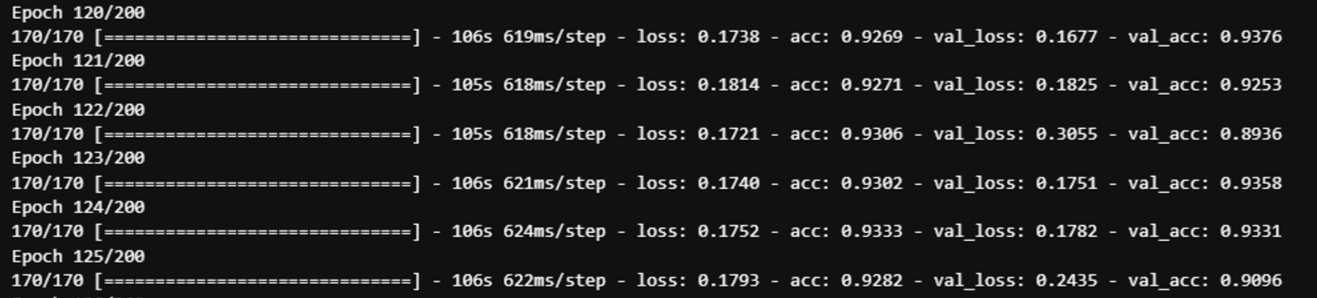

### Model 8
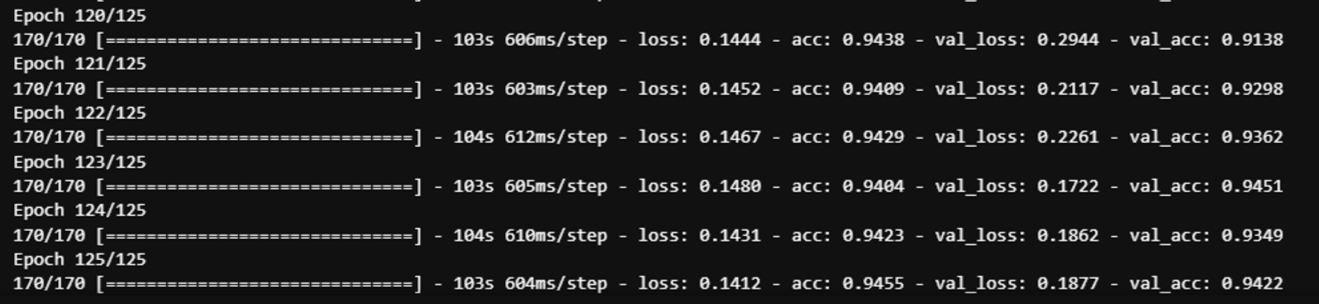

Dokładność na zbiorze walidacyjnym jest stabilniejsza i daje lepsze rezultaty w przypadku modelu 8 - chociaż ocena tylko na podstawie ostatnich 5 epok nie jest najlepszym wyjściem to w tym przypadku uczenie modelu od nowa zajęłoby zbyt dużo czasu więc przystałem na takim rozwiązaniu. Pozostałe metryki mozna porównać na wykresach (błąd w zapisie wystąpił jedynie dla `val_acc` dla `model3` - reszta danych została zapisana poprawnie):

accs len: 125
epochs: range(0, 125)


<Figure size 640x480 with 0 Axes>

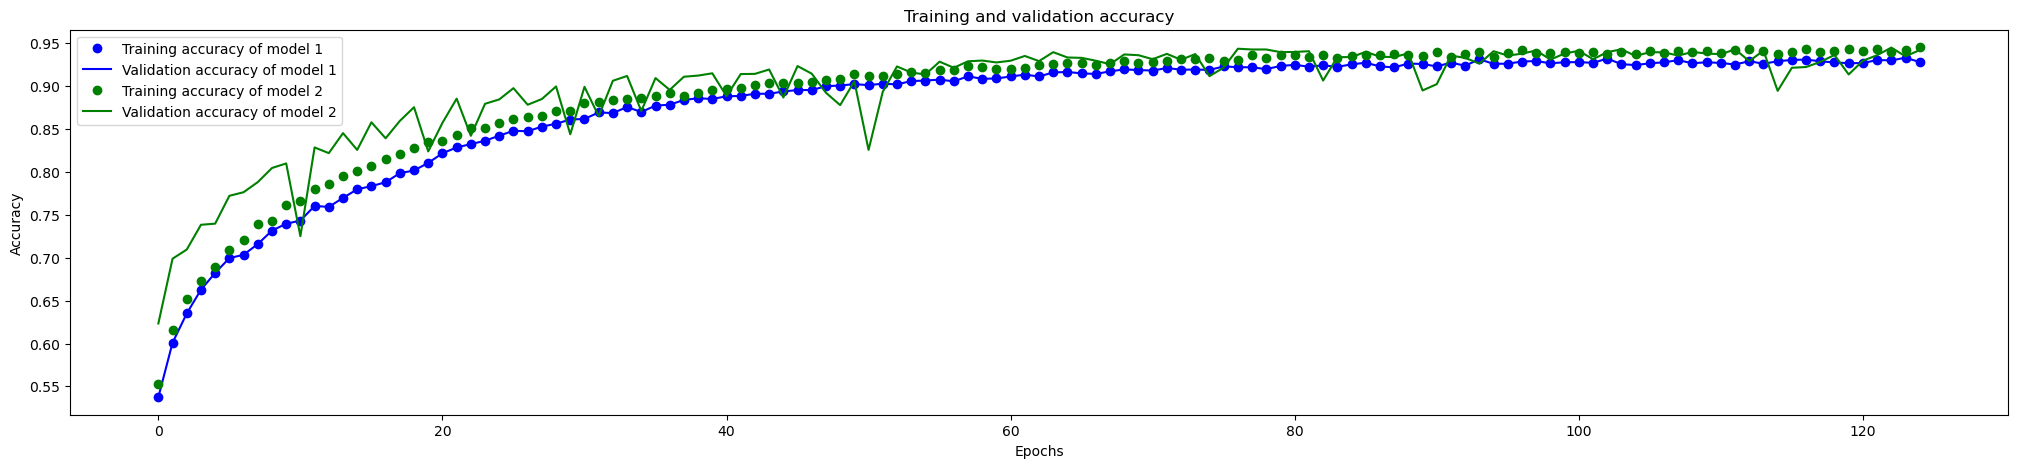

In [58]:
# Model 1 -> Model 3
# Model 2 -> Model 8
# Validation accuracy for model 3 hasn't been saved so, only for plotting, the training accuracy is set also as validation acc for model3
PlotMultipleAccuracyComparison([x for x in [acc3[:125], acc8]], [x for x in [acc3[:125], val_acc8]], epoch_limit=125)

<Figure size 640x480 with 0 Axes>

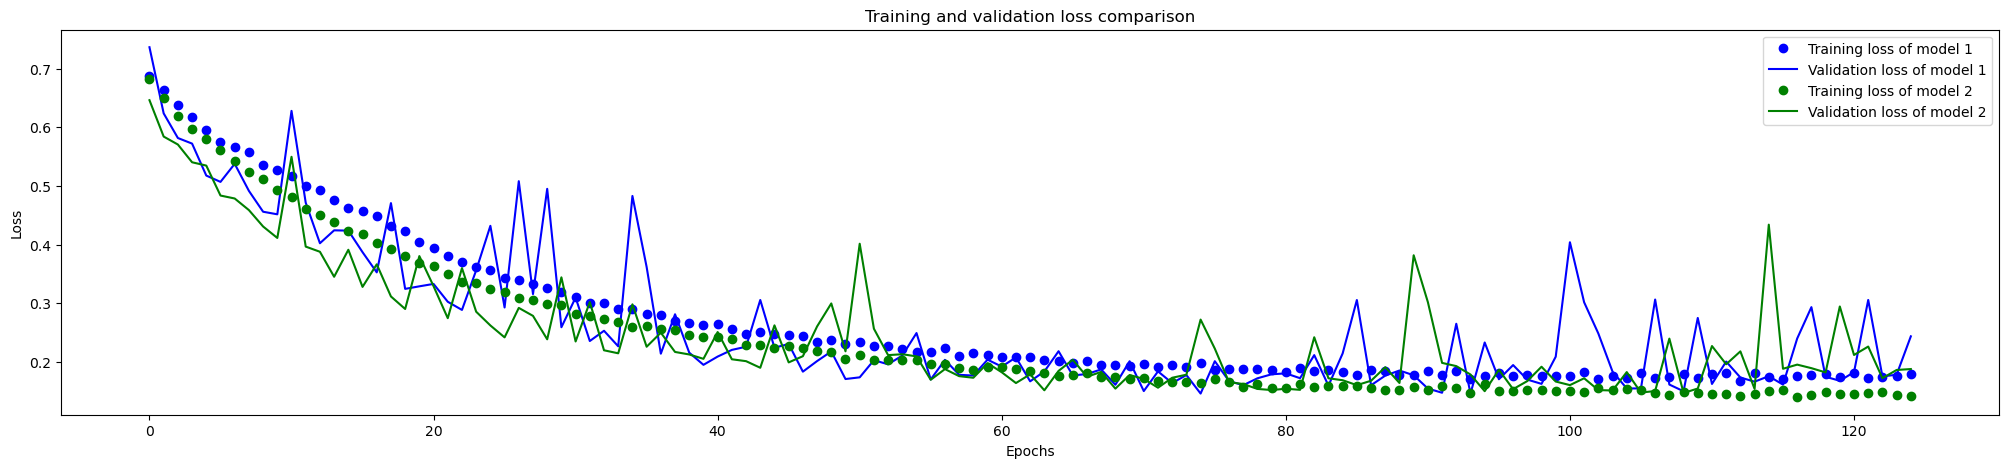

In [57]:
PlotMultipleLossComparison([x for x in [loss3[:125], loss8]], [x for x in [val_loss3[:125], val_loss8]], epoch_limit=125)

Wyniki są podobne, chociaż model 8 posiada odrobinę niższy loss na zbiorze walidacyjnym i treningowym - w obu przypadkach występują fluktuacje. Patrząc na wyniki dokładności na zbiorze walidacyjnym i treningowym dla obu modelów, model 8 daje odrobinę lepsze oraz stabilniejsze rezultaty. Podsumowując, wprowadzone modyfikacje (zmiana położenia warstw `MaxPooling2D`) wywołały (nieduże) poprawienie się straty i dokładności modelu.   

# [Hot dog or not hot dog](https://www.kaggle.com/datasets/thedatasith/hotdog-nothotdog)
Klasyfikacja binarna - weryfikacja na zdjęciu znajduje się hotdog

In [2]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [3]:
# lists to store models results 
models_acc = []
models_val_acc = []
models_loss = []
models_val_loss = [] 

In [59]:
# The path to store trained models
models_dir = r'C:/Users/kuba2/Desktop/notebooks/neural_networks/lab02/hot-dog/models/' 
if not os.path.exists(models_dir):
    os.mkdir(models_dir)

# The directory where we will store our dataset
base_dir = r'C:/Users/kuba2/Desktop/notebooks/neural_networks/lab02/hot-dog/hotdog-nothotdog'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training hotdog pictures
train_cats_dir = os.path.join(train_dir, 'hotdog')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training nothotdog pictures
train_dogs_dir = os.path.join(train_dir, 'nothotdog')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with our validation hotdog pictures
validation_cats_dir = os.path.join(validation_dir, 'hotdog')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation nothotdog pictures
validation_dogs_dir = os.path.join(validation_dir, 'nothotdog')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with our validation hotdog pictures
test_cats_dir = os.path.join(test_dir, 'hotdog')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our validation nothotdog pictures
test_dogs_dir = os.path.join(test_dir, 'nothotdog')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

## <a href="https://keras.io/api/preprocessing/image/">Wstępne przetwarzanie danych</a>


In [5]:
img_rows = 299
img_cols = 299

In [60]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    # This is the target directory
    test_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    # This is the target directory
    validation_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2500 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Budowanie modelu CNN


In [13]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 128)     

In [18]:
import tensorflow
from tensorflow.keras.optimizers import RMSprop

In [19]:
model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [20]:
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=35)

Epoch 1/20
100/100 [==============================] - 22s 202ms/step - loss: 0.6608 - acc: 0.6050 - val_loss: 0.7123 - val_acc: 0.5314
Epoch 2/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6057 - acc: 0.6834 - val_loss: 0.8571 - val_acc: 0.4643
Epoch 3/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5838 - acc: 0.7020 - val_loss: 0.8081 - val_acc: 0.5029
Epoch 4/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5713 - acc: 0.7030 - val_loss: 0.7058 - val_acc: 0.5886
Epoch 5/20
100/100 [==============================] - 20s 201ms/step - loss: 0.5509 - acc: 0.7246 - val_loss: 0.7997 - val_acc: 0.5400
Epoch 6/20
100/100 [==============================] - 20s 204ms/step - loss: 0.5322 - acc: 0.7442 - val_loss: 0.6526 - val_acc: 0.6214
Epoch 7/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5177 - acc: 0.7482 - val_loss: 0.6525 - val_acc: 0.5929
Epoch 8/20
100/100 [==============================] - 2

#### Metody do wizualizacji

In [21]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

<Figure size 640x480 with 0 Axes>

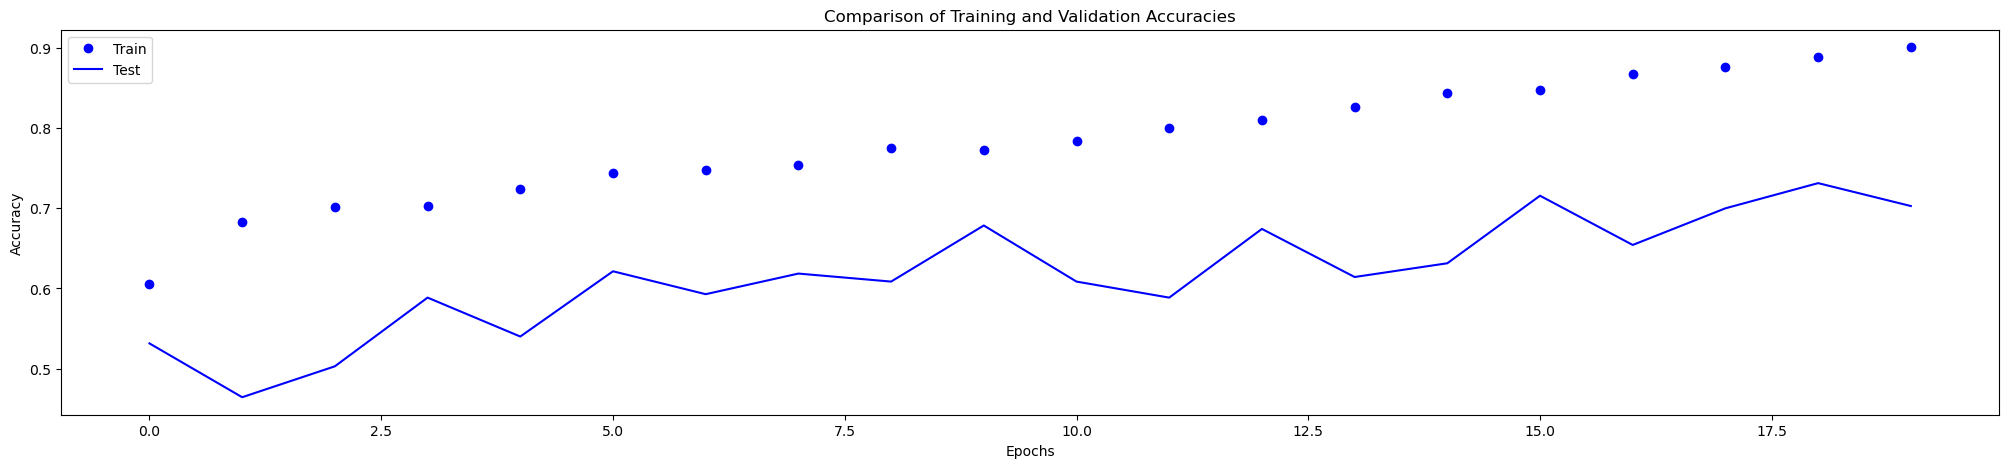

<Figure size 640x480 with 0 Axes>

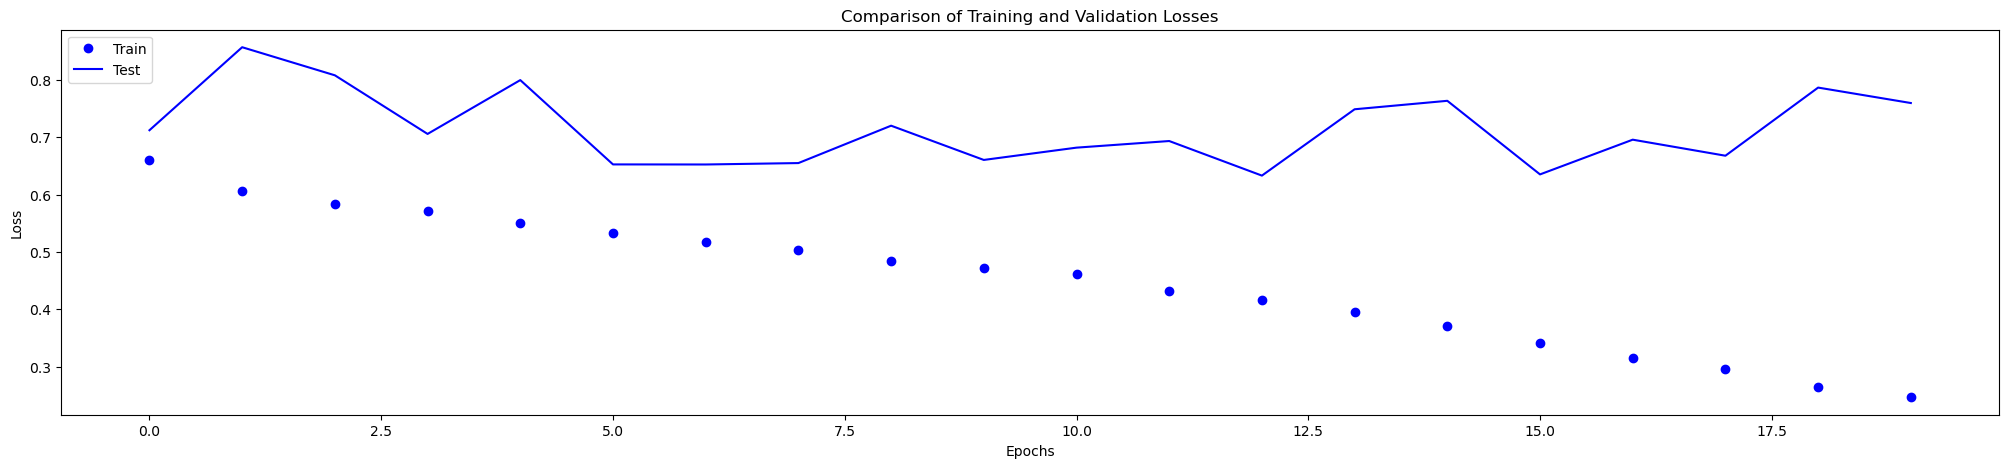

In [22]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

models_acc.append(acc1)
models_val_acc.append(val_acc1)
models_loss.append(loss1)
models_val_loss.append(val_loss1)

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')
PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

#### Ewaluacja modelu na zbiorze testowym

In [28]:
result1 = model1.evaluate(test_generator)
dict(zip(model1.metrics_names, result1))

33/33 [==============================] - 3s 76ms/step - loss: 0.8000 - acc: 0.7050


{'loss': 0.8000297546386719, 'acc': 0.7049689292907715}

In [32]:
model1.save(models_dir + 'hotdog_nothotdog_1.h5')

### Augmentacja danych

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(img_rows, img_cols),
    # The size of baches of images
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

Found 2500 images belonging to 2 classes.


### Nauka po augmentacji danych treningowych

In [39]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 128)     

In [41]:
model1.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [42]:
# Learning on the augmented data
history1 = model1.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=35)

Epoch 1/20
100/100 [==============================] - 48s 466ms/step - loss: 0.6757 - acc: 0.5869 - val_loss: 0.6423 - val_acc: 0.6229
Epoch 2/20
100/100 [==============================] - 46s 455ms/step - loss: 0.6291 - acc: 0.6558 - val_loss: 0.6946 - val_acc: 0.5543
Epoch 3/20
100/100 [==============================] - 45s 444ms/step - loss: 0.6132 - acc: 0.6839 - val_loss: 0.6924 - val_acc: 0.6157
Epoch 4/20
100/100 [==============================] - 45s 445ms/step - loss: 0.6062 - acc: 0.6839 - val_loss: 0.6956 - val_acc: 0.5886
Epoch 5/20
100/100 [==============================] - 53s 530ms/step - loss: 0.5912 - acc: 0.6879 - val_loss: 0.7780 - val_acc: 0.5429
Epoch 6/20
100/100 [==============================] - 46s 461ms/step - loss: 0.5861 - acc: 0.7020 - val_loss: 0.7064 - val_acc: 0.6129
Epoch 7/20
100/100 [==============================] - 48s 484ms/step - loss: 0.5774 - acc: 0.7085 - val_loss: 0.7501 - val_acc: 0.5314
Epoch 8/20
100/100 [==============================] - 5

<Figure size 640x480 with 0 Axes>

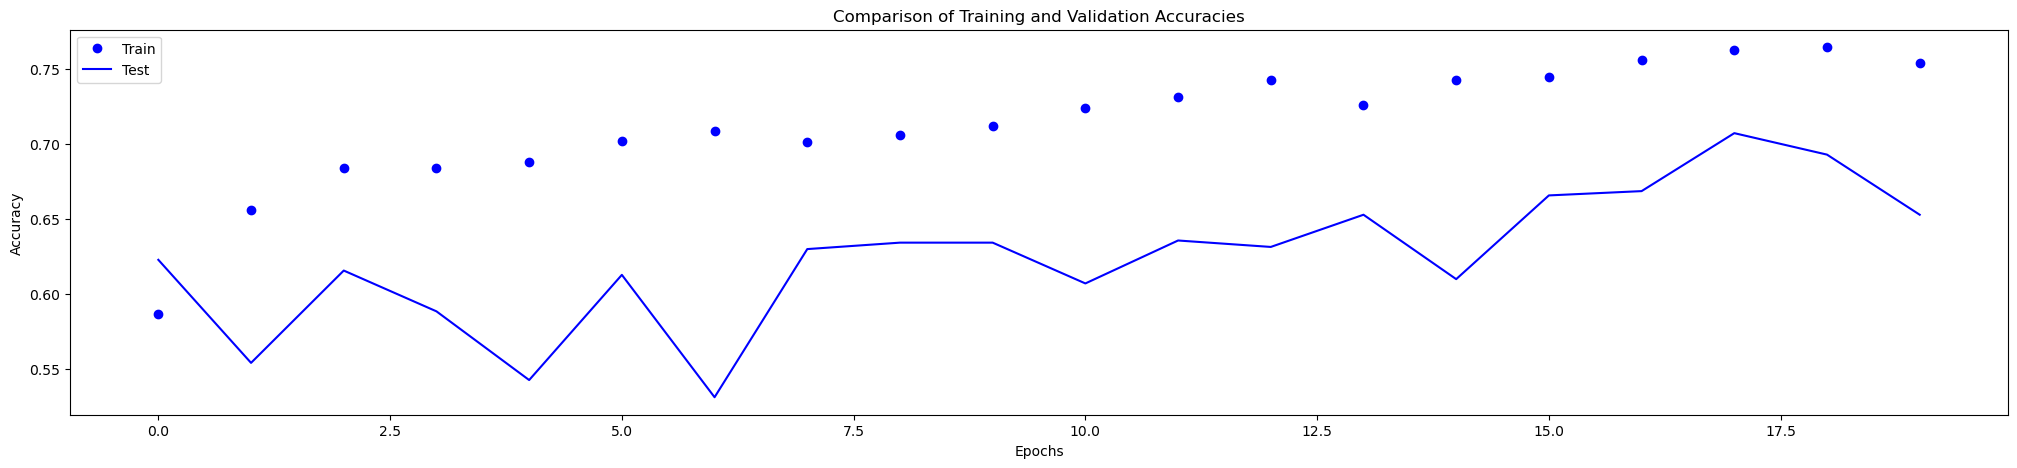

<Figure size 640x480 with 0 Axes>

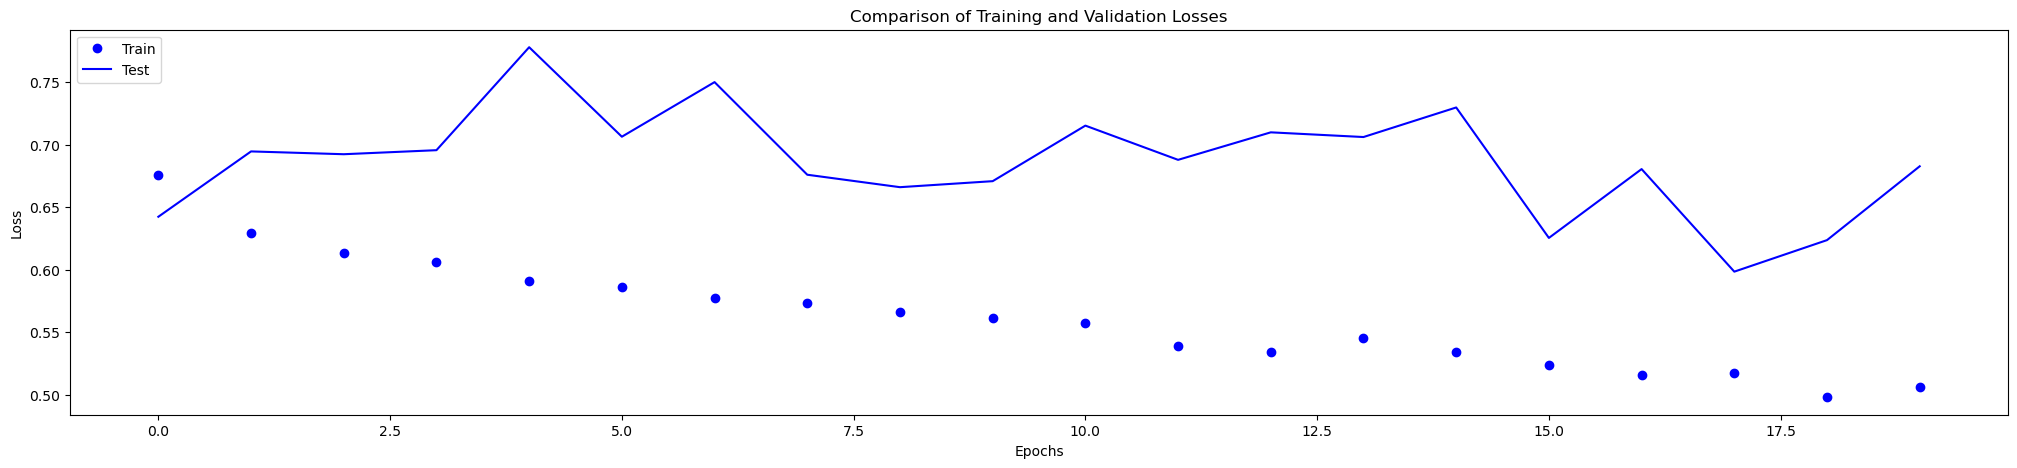

In [43]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

models_acc.append(acc1)
models_val_acc.append(val_acc1)
models_loss.append(loss1)
models_val_loss.append(val_loss1)

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')
PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

#### Metody do wizualizacji `accuracy` oraz `loss` dla wielu modelów

In [51]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
def PlotMultipleAccuracyComparison(accs ,val_accs, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    #acc = history1_dict['accuracy']
    #val_acc = history1_dict['val_accuracy']
    epochs = range(epoch_limit)
    print('accs len:', len(accs[0]))
    print('epochs:', epochs)
    for i,  (acc, val_acc, color) in enumerate(zip(accs, val_accs, colors)):
            limit = min(len(epochs), len(acc))
            plt.plot(epochs[:limit], acc[:limit], f'{color}o', label=f'Training accuracy of model {i+1}')
            plt.plot(epochs[:limit], val_acc[:limit], f'{color}', label=f'Validation accuracy of model {i+1}')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def PlotMultipleLossComparison(losses, val_losses, epoch_limit=30):
    plt.clf()   # clear figure
    plt.figure(figsize=(25,5))
    epochs = range(epoch_limit)
    for i,  (loss, val_loss, color) in enumerate(zip(losses, val_losses, colors)):
        limit = min(len(epochs), len(loss))
        plt.plot(epochs[:limit], loss[:limit], f'{color}o', label=f'Training loss of model {i+1}')
        plt.plot(epochs[:limit], val_loss[:limit], f'{color}', label=f'Validation loss of model {i+1}')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

accs len: 20
epochs: range(0, 20)


<Figure size 640x480 with 0 Axes>

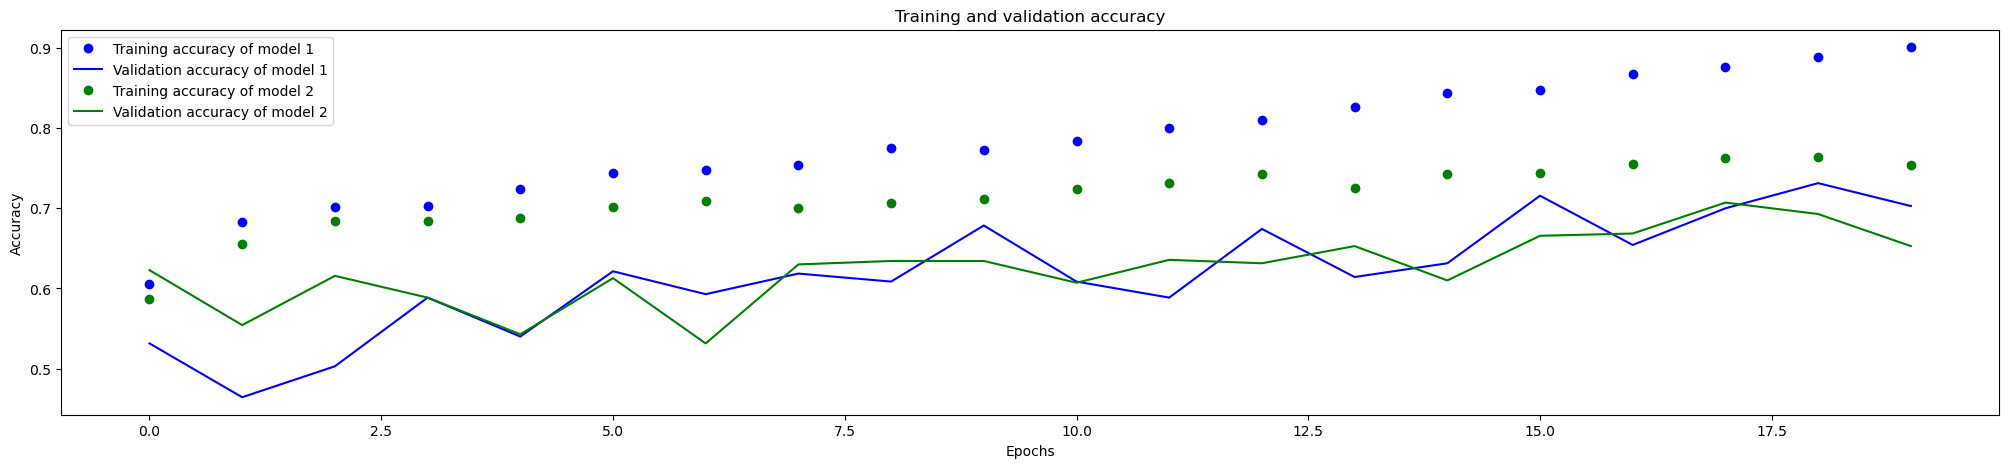

In [53]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=20)

<Figure size 640x480 with 0 Axes>

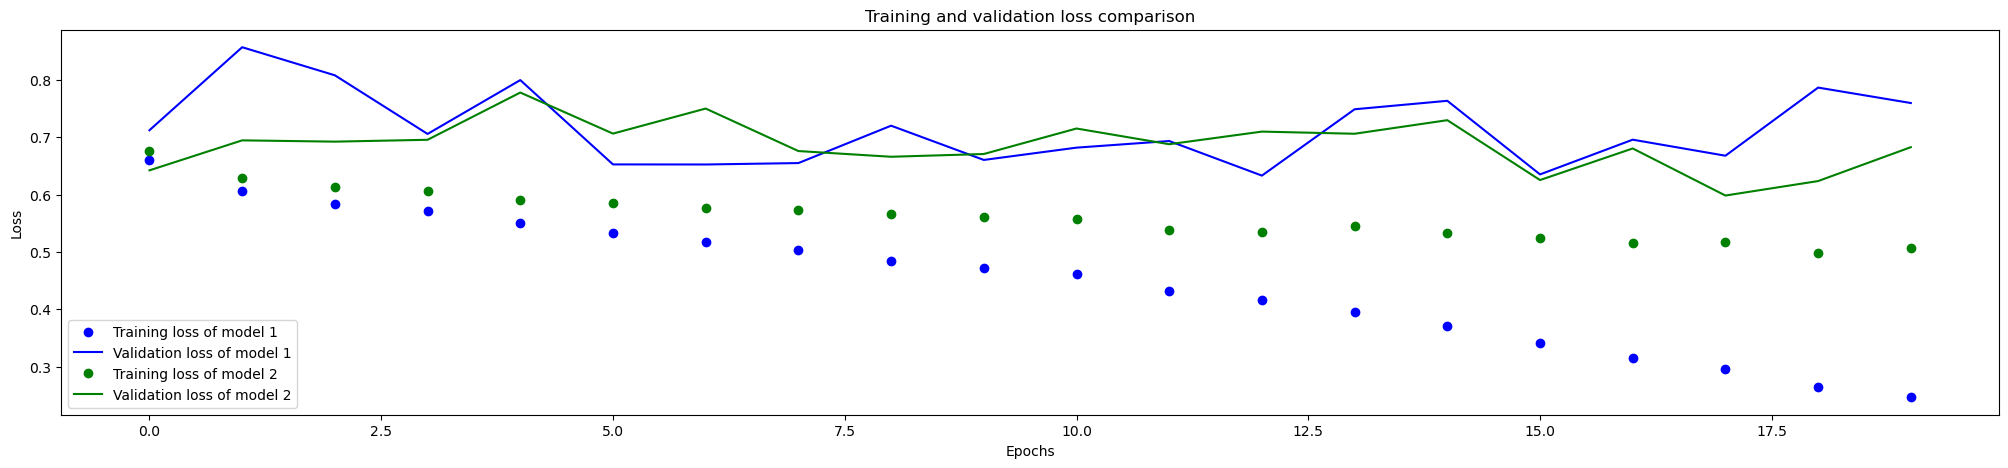

In [54]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=20)

### Po augmentacji danych rozbieżność między `accuracy` na zbiorze treningowym oraz walidacyjnym się zmniejszyła. Augmentacja została wykonana jedynie dla zbioru testowego, dlatego wartości dla zbioru walidacyjnego są podobne. 

#### Ewaluacja modelu na zbiorze testowym

In [55]:
result1 = model1.evaluate(test_generator)
dict(zip(model1.metrics_names, result1))

33/33 [==============================] - 3s 78ms/step - loss: 0.5481 - acc: 0.7376


{'loss': 0.54807448387146, 'acc': 0.7375776171684265}

In [32]:
model1.save(models_dir + 'hotdog_nothotdog_1_augmented.h5')

## Model 2

In [62]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [63]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 35, 35, 256)     

In [64]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history2 = model2.fit(
      train_generator,
      steps_per_epoch=125,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/20
125/125 [==============================] - 58s 454ms/step - loss: 0.6747 - acc: 0.5632 - val_loss: 0.6638 - val_acc: 0.6460
Epoch 2/20
125/125 [==============================] - 56s 443ms/step - loss: 0.6368 - acc: 0.6352 - val_loss: 0.6665 - val_acc: 0.6480
Epoch 3/20
125/125 [==============================] - 55s 438ms/step - loss: 0.6168 - acc: 0.6628 - val_loss: 0.6421 - val_acc: 0.6660
Epoch 4/20
125/125 [==============================] - 56s 444ms/step - loss: 0.6060 - acc: 0.6772 - val_loss: 0.6575 - val_acc: 0.6640
Epoch 5/20
125/125 [==============================] - 56s 442ms/step - loss: 0.5963 - acc: 0.6876 - val_loss: 0.8826 - val_acc: 0.6120
Epoch 6/20
125/125 [==============================] - 56s 443ms/step - loss: 0.5803 - acc: 0.7016 - val_loss: 0.7153 - val_acc: 0.6840
Epoch 7/20
125/125 [==============================] - 55s 441ms/step - loss: 0.5681 - acc: 0.7140 - val_loss: 0.6420 - val_acc: 0.6900
Epoch 8/20
125/125 [==============================] - 5

#### Ewaluacja modelu na zbiorze testowym

In [68]:
result2 = model2.evaluate(test_generator)
dict(zip(model2.metrics_names, result2))

33/33 [==============================] - 4s 124ms/step - loss: 0.6828 - acc: 0.7050


{'loss': 0.6827728152275085, 'acc': 0.7049689292907715}

Zapisujemy model 2

In [65]:
model2.save(models_dir + 'hotdog_nothotdog_2.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

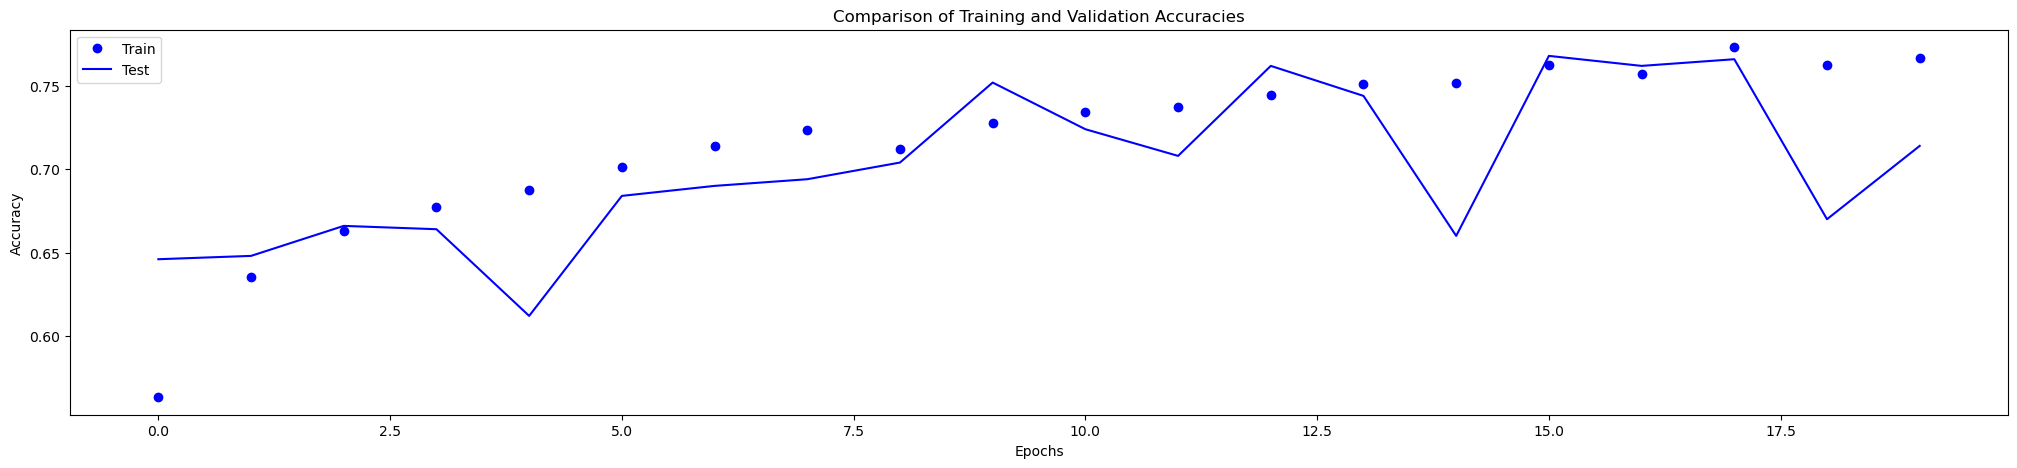

<Figure size 640x480 with 0 Axes>

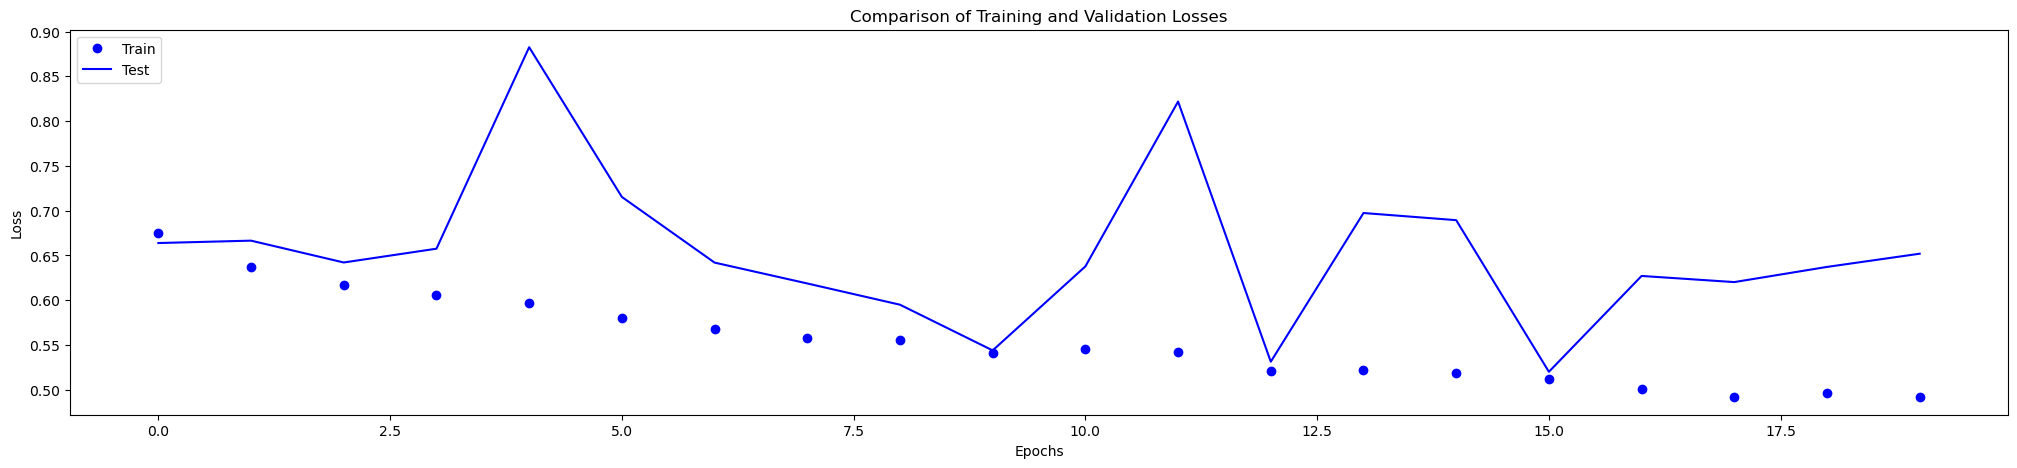

In [69]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

models_acc.append(acc2)
models_val_acc.append(val_acc2)
models_loss.append(loss2)
models_val_loss.append(val_loss2)

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

Przy tym modelu zauważyć można duże fluktuacje, zwłaszcza dla straty, które występują co kilka epok.

accs len: 20
epochs: range(0, 20)


<Figure size 640x480 with 0 Axes>

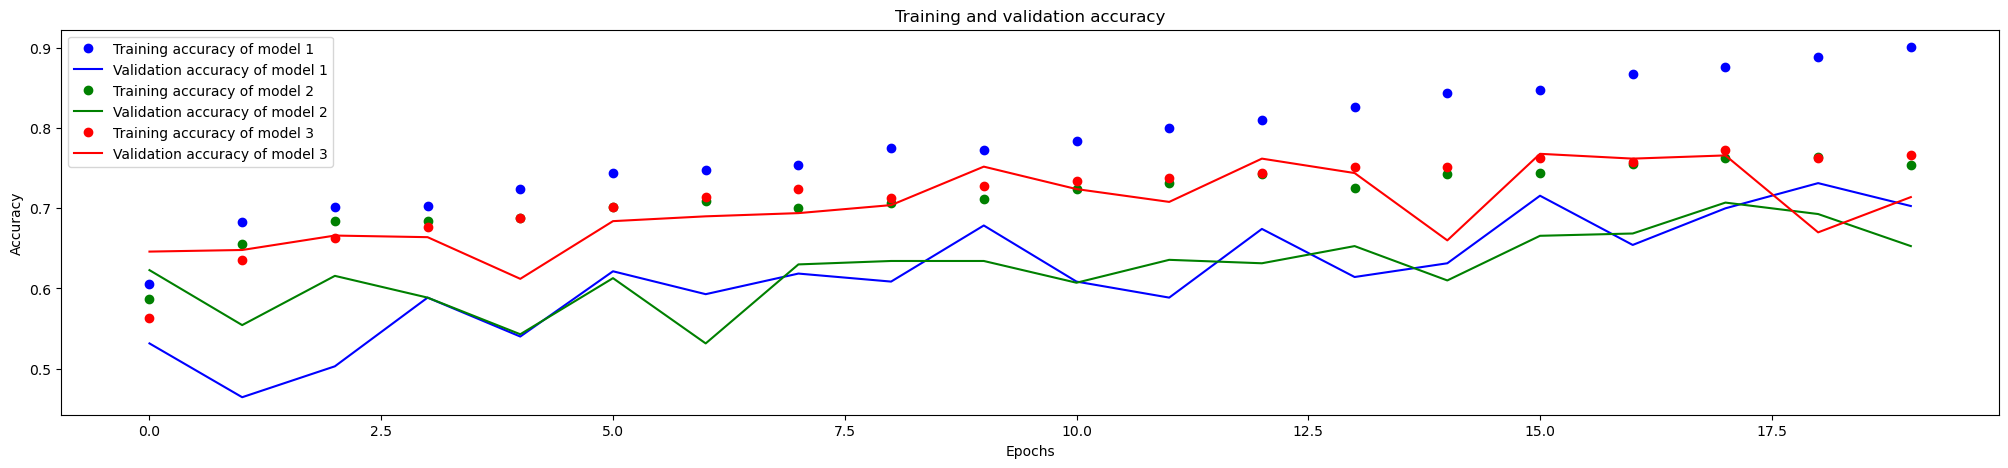

In [71]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=20)

<Figure size 640x480 with 0 Axes>

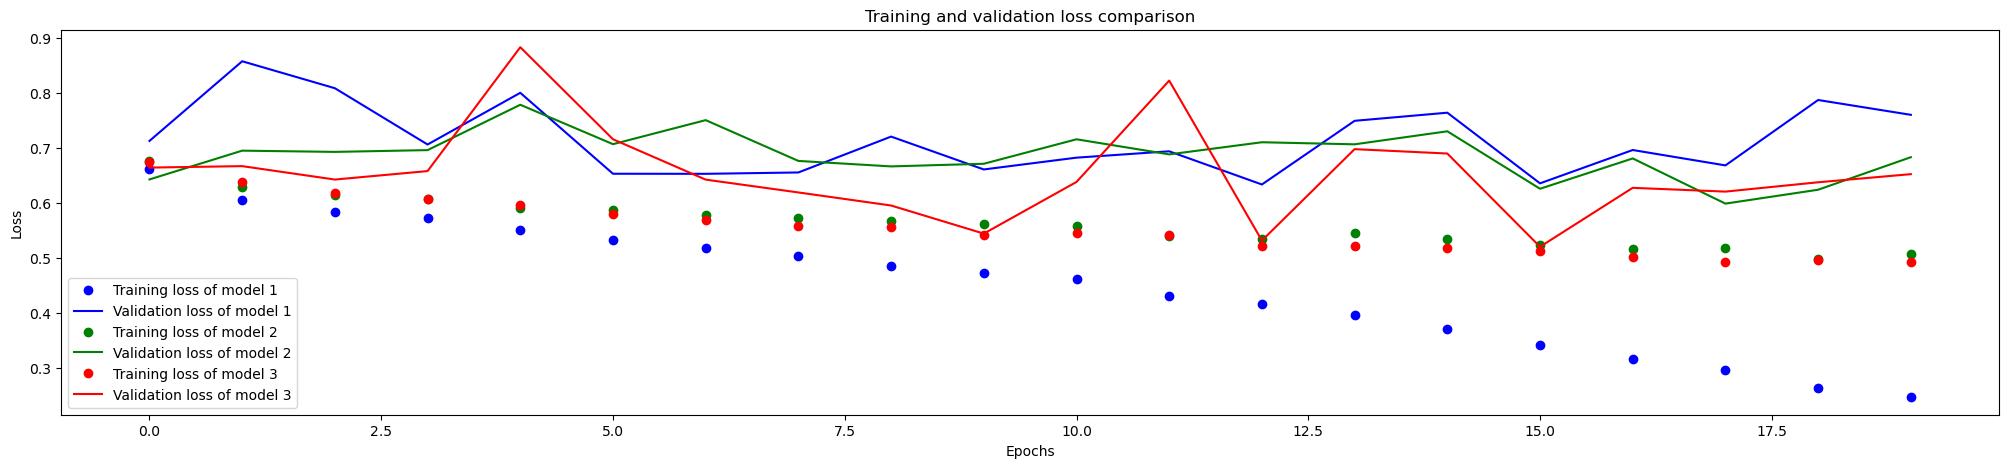

In [72]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=20)

#### Model 1 odznacza się lepszą dokładnością w ostatnich epokach - dla zbioru testowego też wykazał się lepszymi wynikami.Jednak przy zestawieniu modeli (`model 1 - model 1 bez augmentacji`, `model 2 - model 1 z augmentacją`, `model 3 - model 2 z augmentacją`) model 2 wypada lepiej od poprzedników w pierwszych epokach, w okolicach 20 epoki natomiast model 1 z augmentacją wypada podobnie.

## Model 2
Ten sam model, który został użyty poprzednio - tym razem w procesie uczenia zmniejszę rozmiar `batchy` przy zwiększeniu ilości `epok`.

In [74]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(512, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [75]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 35, 35, 256)     

In [76]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history2 = model2.fit(
      train_generator,
      steps_per_epoch=60,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=12)

Epoch 1/40
60/60 [==============================] - 28s 443ms/step - loss: 0.6923 - acc: 0.5333 - val_loss: 0.6658 - val_acc: 0.6417
Epoch 2/40
60/60 [==============================] - 27s 440ms/step - loss: 0.6610 - acc: 0.6058 - val_loss: 0.6844 - val_acc: 0.6042
Epoch 3/40
60/60 [==============================] - 27s 442ms/step - loss: 0.6418 - acc: 0.6467 - val_loss: 0.7537 - val_acc: 0.6083
Epoch 4/40
60/60 [==============================] - 27s 442ms/step - loss: 0.6304 - acc: 0.6550 - val_loss: 0.6660 - val_acc: 0.6542
Epoch 5/40
60/60 [==============================] - 27s 445ms/step - loss: 0.6344 - acc: 0.6350 - val_loss: 0.6630 - val_acc: 0.6292
Epoch 6/40
60/60 [==============================] - 28s 456ms/step - loss: 0.6217 - acc: 0.6483 - val_loss: 0.6602 - val_acc: 0.6625
Epoch 7/40
60/60 [==============================] - 27s 447ms/step - loss: 0.6143 - acc: 0.6642 - val_loss: 0.6873 - val_acc: 0.6333
Epoch 8/40
60/60 [==============================] - 27s 444ms/step - 

#### Ewaluacja modelu na zbiorze testowym

In [77]:
result2 = model2.evaluate(test_generator)
dict(zip(model2.metrics_names, result2))

33/33 [==============================] - 4s 124ms/step - loss: 0.7513 - acc: 0.6708


{'loss': 0.7513105869293213, 'acc': 0.6708074808120728}

Zapisujemy model 2

In [78]:
model2.save(models_dir + 'hotdog_nothotdog_2_v2.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

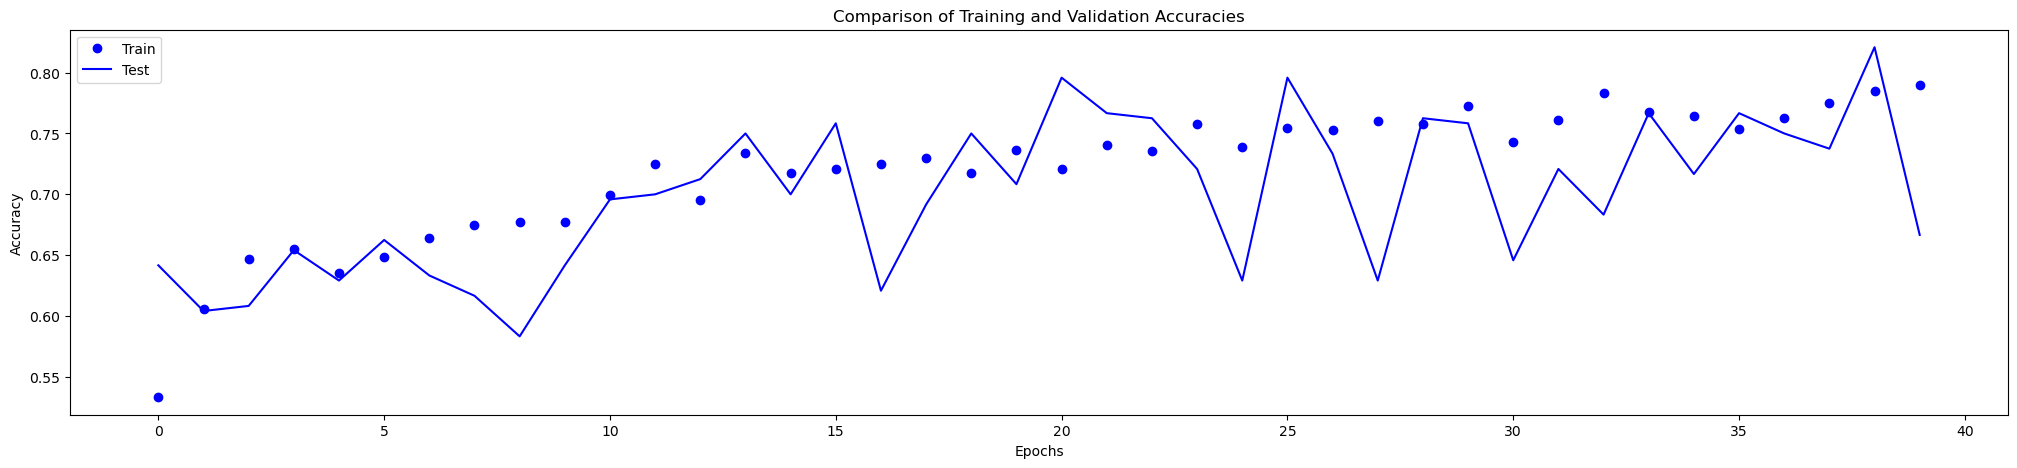

<Figure size 640x480 with 0 Axes>

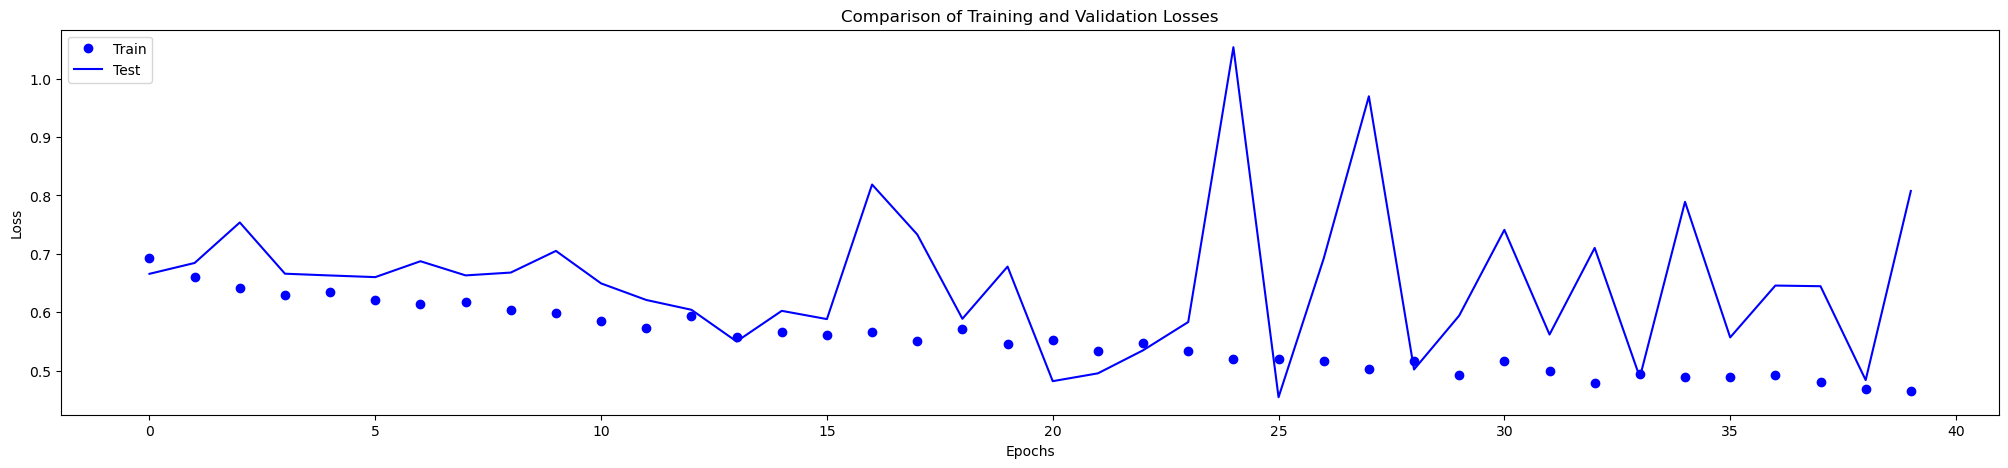

In [79]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

models_acc.append(acc2)
models_val_acc.append(val_acc2)
models_loss.append(loss2)
models_val_loss.append(val_loss2)

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')
PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

Model 1 odznacza się lepszą dokładnością i mniejszą stratą na zbiorze testowym. Dodatkowo dla modelu 2 zauważyć można duże fluktuacje, które występują co kilka epok.

accs len: 20
epochs: range(0, 40)


<Figure size 640x480 with 0 Axes>

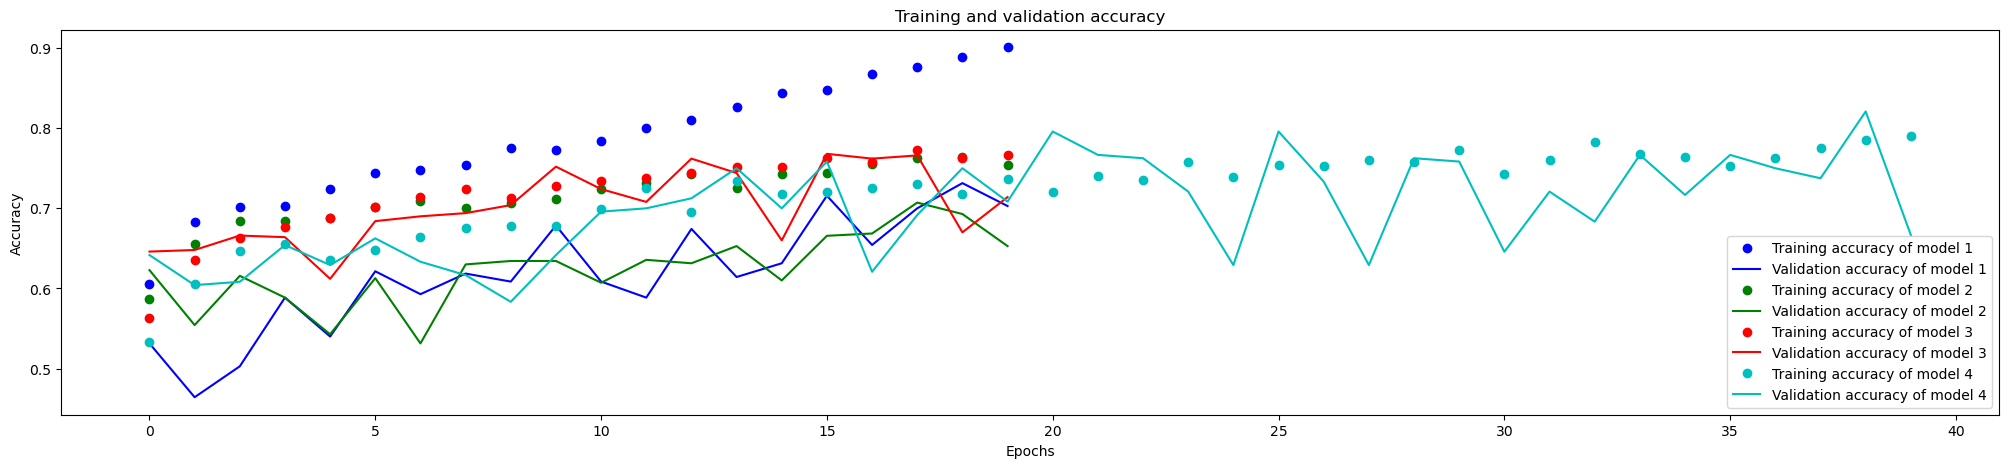

In [80]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=40)

<Figure size 640x480 with 0 Axes>

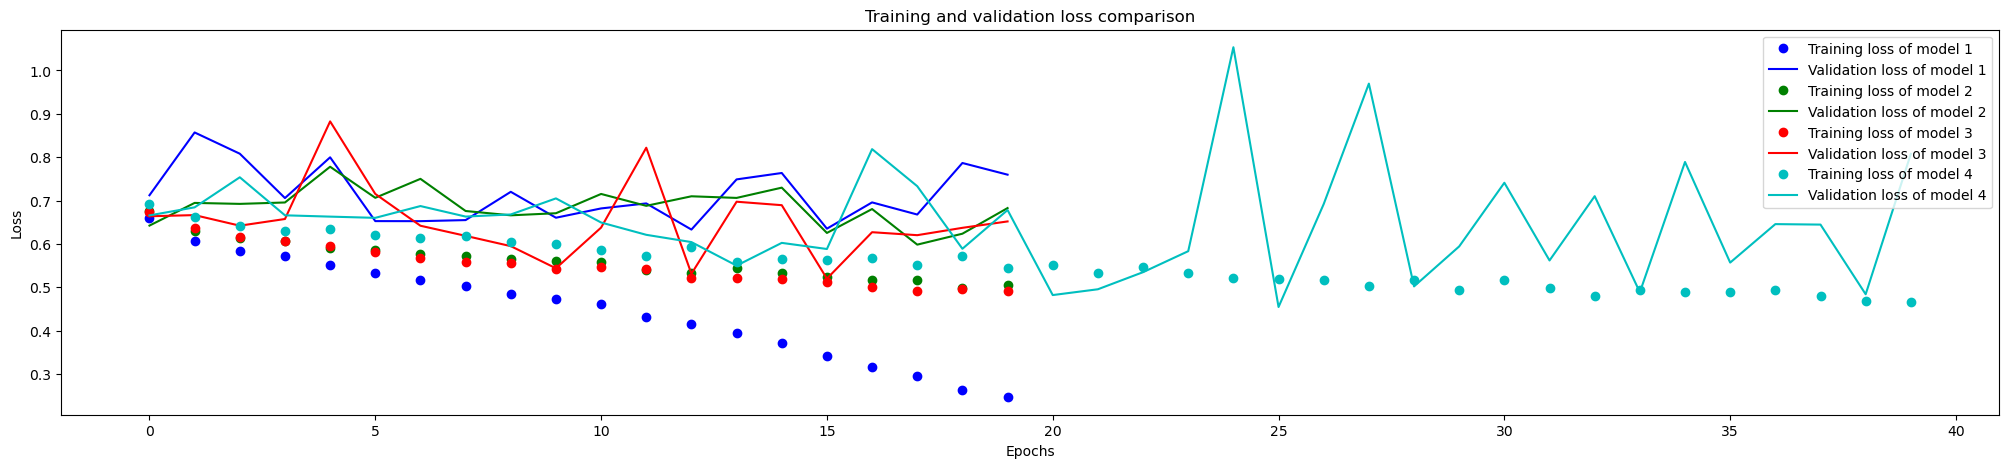

In [81]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=40)

## Model 4 (`optimizer=Adam`)
Nierzadko wybieranym typem optimizera w CNN jest Adam, więc w kolejnych modelach sprawdzone zostanie czy jego zmiana przyniesie zauważalne rezultaty.

In [82]:
model4 = models.Sequential()
model4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(512, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [83]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 297, 297, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 146, 146, 128)     73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 35, 35, 256)     

In [84]:
# Learning on the augmented data, slightly increase number of images processed per epoch
history4 = model4.fit(
      train_generator,
      steps_per_epoch=60,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=12)

Epoch 1/40
60/60 [==============================] - 28s 440ms/step - loss: 0.6937 - acc: 0.5258 - val_loss: 0.6926 - val_acc: 0.4708
Epoch 2/40
60/60 [==============================] - 26s 432ms/step - loss: 0.6878 - acc: 0.5400 - val_loss: 0.6679 - val_acc: 0.6042
Epoch 3/40
60/60 [==============================] - 27s 439ms/step - loss: 0.6319 - acc: 0.6383 - val_loss: 0.7245 - val_acc: 0.5917
Epoch 4/40
60/60 [==============================] - 26s 435ms/step - loss: 0.6361 - acc: 0.6400 - val_loss: 0.6624 - val_acc: 0.6542
Epoch 5/40
60/60 [==============================] - 27s 436ms/step - loss: 0.6335 - acc: 0.6475 - val_loss: 0.6456 - val_acc: 0.6458
Epoch 6/40
60/60 [==============================] - 27s 439ms/step - loss: 0.6326 - acc: 0.6383 - val_loss: 0.7465 - val_acc: 0.5958
Epoch 7/40
60/60 [==============================] - 27s 440ms/step - loss: 0.6378 - acc: 0.6425 - val_loss: 0.6734 - val_acc: 0.6083
Epoch 8/40
60/60 [==============================] - 26s 431ms/step - 

#### Ewaluacja modelu na zbiorze testowym

In [85]:
result4 = model4.evaluate(test_generator)
dict(zip(model4.metrics_names, result4))

33/33 [==============================] - 4s 124ms/step - loss: 0.6532 - acc: 0.6925


{'loss': 0.6531851291656494, 'acc': 0.6925466060638428}

In [86]:
model4.save(models_dir + 'hotdog_nothotdog_4.h5')

Pokażmy wyniki na wykresach:

<Figure size 640x480 with 0 Axes>

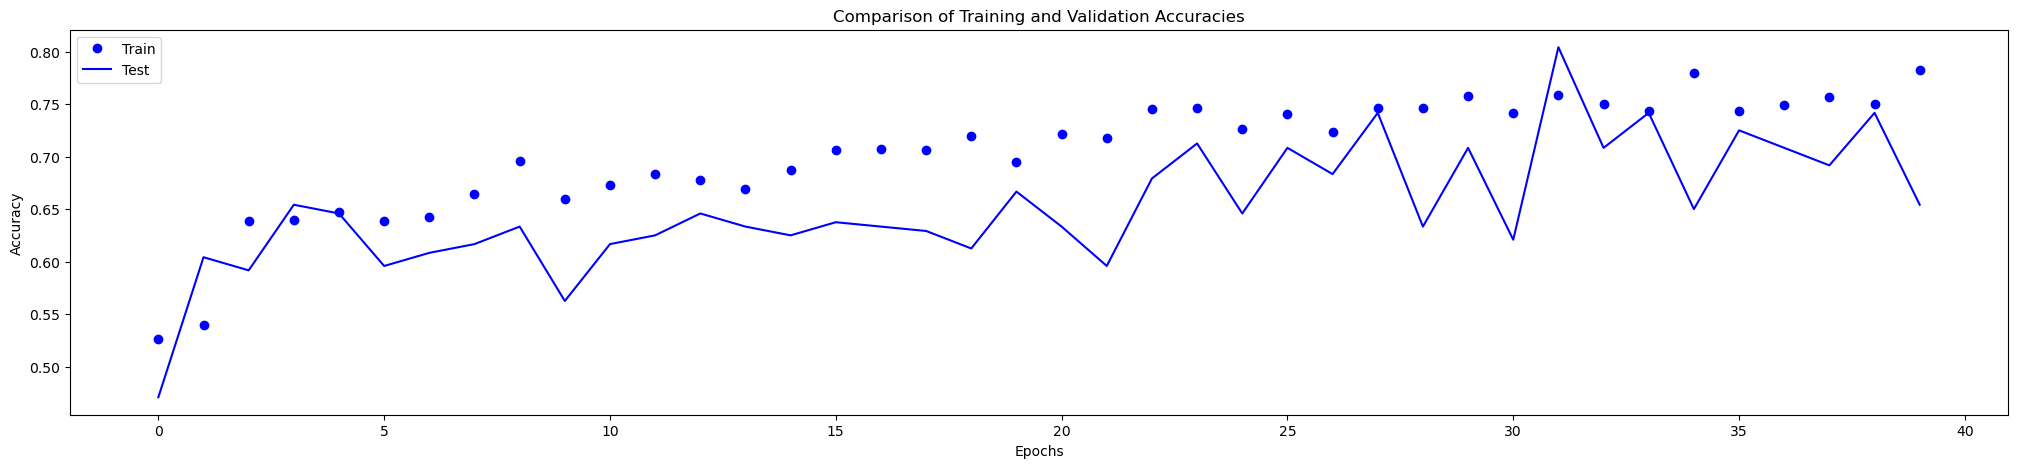

<Figure size 640x480 with 0 Axes>

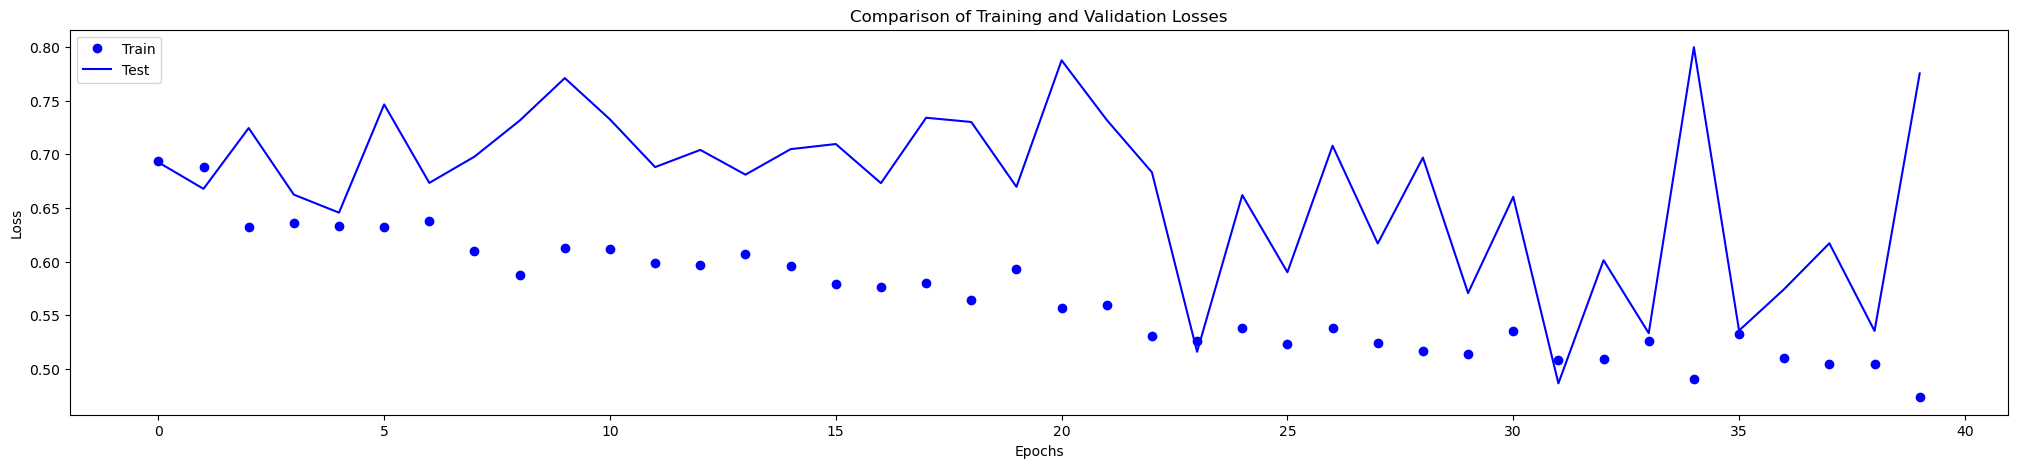

In [87]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

models_acc.append(acc4)
models_val_acc.append(val_acc4)
models_loss.append(loss4)
models_val_loss.append(val_loss4)

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')
PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

accs len: 20
epochs: range(0, 40)


<Figure size 640x480 with 0 Axes>

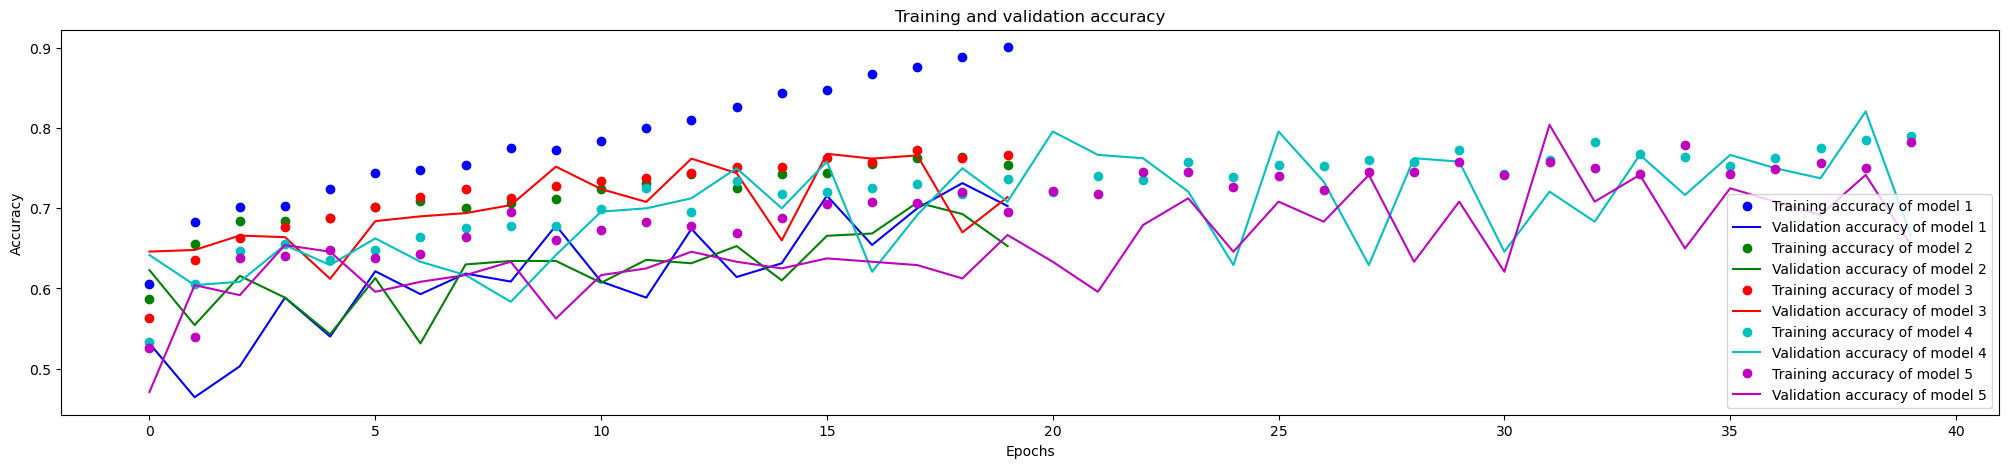

In [88]:
PlotMultipleAccuracyComparison(models_acc, models_val_acc, epoch_limit=40)

<Figure size 640x480 with 0 Axes>

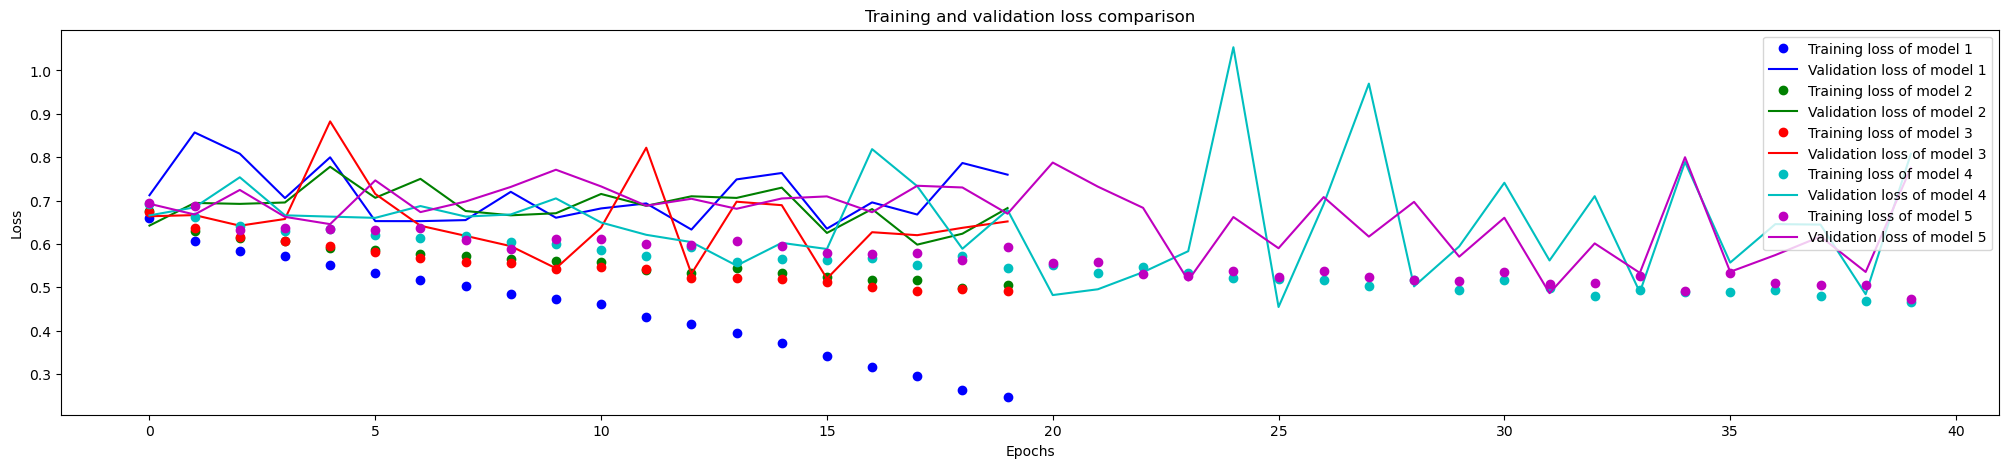

In [89]:
PlotMultipleLossComparison(models_loss, models_val_loss, epoch_limit=40)

Wszystkie modele nie odbiegają znacznie od siebie, nie widać też znacznej poprawy w działaniu przy modyfikacji parametrów `optimizer` lub zmiany ilości epok oraz rozmiarów `batch` przy uczeniu. Najlepszym do tej pory jest model 3, który daje na zbiorze testowym wynik 70% dokładności - nie jest to rewelacyjny wynik, lecz może mieć na to wpływ też nieprosty dataset, na którym nie jest łatwo uczyć sieć.

Wyszukując informacje o uczeniu sieci do klasyfikacji w oparciu o wykorzystany tutaj dataset napotkałem się na posty/artykuły, w których na prostych modelach otrzymywano wyniki podobne do tych które otrzymane zostały powyżej, natomiast duża poprawa (accuracy na poziomie nawet ponad 93%) wystąpiło przy użyciu uczenia transferowego przy użyciu sieci takich jak `ResNet34`, `VGG19` lub `Inception ResNet V2`.

### Nauka w oparciu o wstępnie przyuczony model

In [130]:
base_model_vgg19 = tf.keras.applications.vgg19.VGG19(weights = 'imagenet', include_top = False, input_shape = (299,299,3))
base_model_vgg19.trainable = False

In [131]:
base_model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [132]:
model5 = models.Sequential()
for layer in base_model_vgg19.layers:
    model5.add(layer)
model5.add(layers.GlobalAveragePooling2D())
model5.add(layers.Flatten())
model5.add(layers.Dense(1024, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [133]:
model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 74, 74, 256)     

In [134]:
model5.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [135]:
# Learning on the augmented data
history5 = model5.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/20
100/100 [==============================] - 92s 910ms/step - loss: 0.6539 - acc: 0.6355 - val_loss: 0.6564 - val_acc: 0.6080
Epoch 2/20
100/100 [==============================] - 93s 924ms/step - loss: 0.5967 - acc: 0.7220 - val_loss: 0.6329 - val_acc: 0.6220
Epoch 3/20
100/100 [==============================] - 93s 926ms/step - loss: 0.5586 - acc: 0.7440 - val_loss: 0.6181 - val_acc: 0.6260
Epoch 4/20
100/100 [==============================] - 92s 914ms/step - loss: 0.5291 - acc: 0.7600 - val_loss: 0.6279 - val_acc: 0.6540
Epoch 5/20
100/100 [==============================] - 91s 907ms/step - loss: 0.5212 - acc: 0.7620 - val_loss: 0.6036 - val_acc: 0.6540
Epoch 6/20
100/100 [==============================] - 91s 903ms/step - loss: 0.5043 - acc: 0.7750 - val_loss: 0.6150 - val_acc: 0.6640
Epoch 7/20
100/100 [==============================] - 91s 903ms/step - loss: 0.4935 - acc: 0.7670 - val_loss: 0.5914 - val_acc: 0.6880
Epoch 8/20
100/100 [==============================] - 9

#### Ewaluacja modelu na zbiorze testowym

In [136]:
result5 = model5.evaluate(test_generator)
dict(zip(model5.metrics_names, result5))

33/33 [==============================] - 26s 765ms/step - loss: 0.4398 - acc: 0.7950


{'loss': 0.4398070275783539, 'acc': 0.7950310707092285}

Model oparty o wstępnie przyuczoną sieć `VGG19` radzi sobie o wiele lepiej niż dotychczas zbudowane modele. Dokładność na zbiorze testowym wynosi prawie `80%` (poprawa o 10% względem poprzednich modeli), `loss` wynosi `ok. 0.44` (poprawa o ok. 0.20). Świadczy to o tym, że przy bardziej skomplikowanych rozwiązaniach, gdy uczenie trwa długi czas, posiadana moc obliczeniowa nie jest wystarczająca do uczenia bardziej rozbudowanych sieci lub gdy posiadamy małą ilość danych, warto sprawdzić jak spawdzi się uczenie transferowe.

In [139]:
model5.save(models_dir + 'hotdog_nothotdog_5_pretrained.h5')

<Figure size 640x480 with 0 Axes>

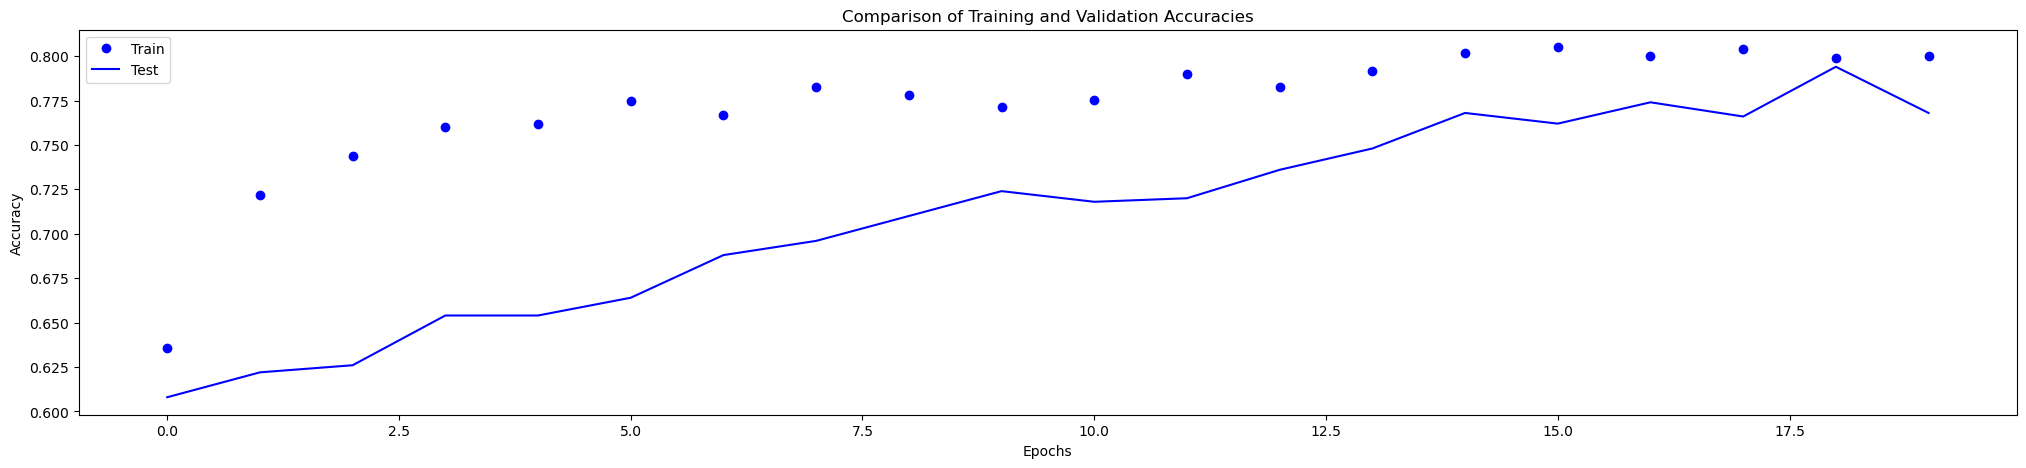

<Figure size 640x480 with 0 Axes>

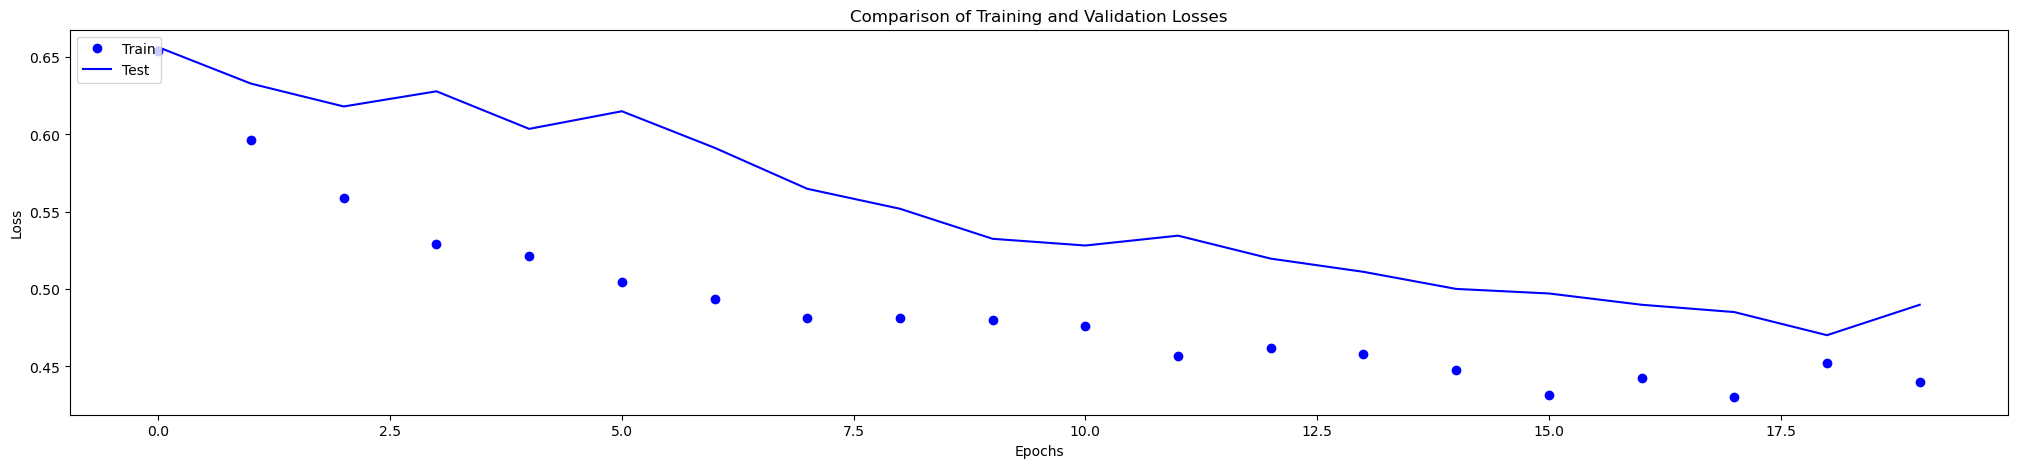

In [137]:
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

models_acc.append(acc5)
models_val_acc.append(val_acc5)
models_loss.append(loss5)
models_val_loss.append(val_loss5)

PlotAccuracyComparison(acc5, val_acc5, lab = 'Model 5')
PlotLossComparison(loss5, val_loss5, lab = 'Model 5')